# Problem Statement

## Overview
- A consumer finance company which specialises in lending various types of loans to urban customers.
- When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
    - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
    - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
  

## Objective
*To improve **Risk Assessment***
- Refine loan approval criteria to reduce risk.

*To minimize the **Credit Loss***
- Optimize portfolio quality to minimize financial losses.

*Employ targeted **Strategies** such as*:
- **Loan denial**: Refusing applications from high-risk borrowers.
- **Loan reduction**: Decreasing loan amounts for applicants with limited capacity.
- **Interest rate adjustment**: Charging higher rates to compensate for increased risk.
- **Term modification**: Altering loan durations to balance risk and borrower needs.

# Application Data

### Data sourcing

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Adjusts the display settings to better visualize large datasets.
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
# Reading the application data csv file
app_df = pd.read_csv('application_data.csv')

### Data Inspection

In [4]:
# Checking first five rows
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
# Checking last five rows
app_df.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   
307508                    0.005002      -14966          -7921   
307509                    0.005313      -11961          -4786   
307510                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff              1.0                     1   
307507           0             NaN              1.0                     2   
307508           1        Managers              1.0                     3   
307509           0        Laborers              2.0                     2   
307510           0        Laborers              2.0                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [6]:
# Checking shape of the dataframe
app_df.shape

(307511, 122)

In [7]:
# Checking data types of dataframe 
app_df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
# Calculates and displays summary statistics for the DataFrame.
app_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

### Data Cleaning

- ##### Missing values
- ##### Handling missing values

In [9]:
# Checking for the missing values in a dataframe
app_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
# Checking percentage of missing values 
app_df.isnull().sum()/len(app_df)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [11]:
# Columns 'APARTMENTS_AVG' to 'DEF_30_CNT_SOCIAL_CIRCLE' contain information about the applicant's living situation.
# However, due to a significant amount of missing data (over 45%), these columns can be excluded from further analysis.

app_df.drop(columns=(app_df.iloc[:, 44:91].columns), inplace=True)

app_df.shape


(307511, 75)

In [12]:
# Checking for missing values again 
app_df.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [13]:
# Examining each column individually to identify and quantify missing data.

In [14]:
# Checking null values in column 'AMT_ANNUITY'
app_df[app_df['AMT_ANNUITY'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

In [15]:
# Imputing null values with mean value 

app_df['AMT_ANNUITY']=app_df.AMT_ANNUITY.mean()/app_df.AMT_CREDIT.mean()

In [16]:
# Checking null values in column 'AMT_GOODS_PRICE'
app_df[app_df['AMT_GOODS_PRICE'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724         100837       0    Revolving loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6703        107822       0    Revolving loans           F            N   
7647        108913       0    Revolving loans           M            N   
7880        109190       1    Revolving loans           F            N   
7995        109322       0    Revolving loans           M            N   
10819       112595       0    Revolving loans           F            N   
11287       113148       0    Revolving loans           F            N   
13008       115162       0    Revolving loans           F            N   
14699       117150       0    Revolving loans           M            N   
15953       118618       0    Revolving loans           F            N   
18935       122080       0    Revolving loans           M            N   
19178       122374       0    Revolving loans           F            N   
19921       123233       0    Revolving loans           F            N   
21193       124697       0    Revolving loans           F            N   
21338       124859       0    Revolving loans           M            N   
21546       125096       0    Revolving loans           F            N   
25391       129532       0    Revolving loans           M            N   
26398       130692       0    Revolving loans           M            N   
26736       131077       0    Revolving loans           F            N   
27003       131385       0    Revolving loans           M            N   
28201       132778       0    Revolving loans           F            N   
29059       133761       0    Revolving loans           F            N   
30164       135010       0    Revolving loans           F            N   
30294       135159       0    Revolving loans           M            N   
32143       137268       0    Revolving loans           M            N   
36250       141975       0    Revolving loans           F            N   
36721       142532       0    Revolving loans           M            N   
39230       145435       0    Revolving loans           F            N   
40571       146988       0    Revolving loans           F            N   
41099       147593       1    Revolving loans           F            N   
41161       147655       0    Revolving loans           M            N   
41982       148605       0    Revolving loans           M            N   
42024       148658       0    Revolving loans           F            N   
43630       150507       0    Revolving loans           M            N   
45657       152889       0    Revolving loans           M            N   
47627       155169       0    Revolving loans           F            N   
50540       158525       1    Revolving loans           F            N   
52711       161052       0    Revolving loans           M            N   
52955       161332       0    Revolving loans           F            N   
54045       162615       0    Revolving loans           F            N   
55600       164423       0    Revolving loans           F            N   
56002       164897       1    Revolving loans           F            N   
58595       167920       0    Revolving loans           F            N   
58653       167989       0    Revolving loans           M            N   
60622       170291       0    Revolving loans           M            N   
61022       170764       0    Revolving loans           F            N   
61072       170823       0    Revolving loans           F            N   
61618       171462       0    Revolving loans           M            N   
63319       173434       0    Revolving loans           F            N   
64118       174350       0    Revolving loans           F            N   
64184       174427       0    Revolving loans           F            N   
66168       

In [17]:
# For revolving loans, AMT_GOODS_PRICE is often missing and can be filled with 0.

app_df['AMT_GOODS_PRICE'].fillna(value=0, inplace=True)

In [18]:
# Checking null values for 'NAME_TYPE_SUITE' column
app_df[app_df['NAME_TYPE_SUITE'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
64          100076       0         Cash loans           M            Y   
724         100837       0    Revolving loans           F            N   
1199        101414       0         Cash loans           M            Y   
1669        101954       0         Cash loans           F            Y   
1862        102183       0         Cash loans           F            Y   
...            ...     ...                ...         ...          ...   
306273      454852       0    Revolving loans           M            N   
306544      455158       0         Cash loans           F            N   
306615      455245       0         Cash loans           M            N   
306636      455270       0         Cash loans           M            Y   
306725      455367       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
64                   N             0          180000.0    315000.0   
724                  Y             2           45000.0    135000.0   
1199                 N             0          135000.0    533668.5   
1669                 N             2          153000.0   1162170.0   
1862                 N             0          121500.0    268659.0   
...                ...           ...               ...         ...   
306273               Y             2           67500.0    202500.0   
306544               N             0          180000.0    894825.0   
306615               N             0          180000.0    225000.0   
306636               N             2          189000.0    677664.0   
306725               Y             0          202500.0    755190.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
64         0.045254         315000.0             NaN  Commercial associate   
724        0.045254              0.0             NaN  Commercial associate   
1199       0.045254         477000.0             NaN               Working   
1669       0.045254         832500.0             NaN         State servant   
1862       0.045254         243000.0             NaN  Commercial associate   
...             ...              ...             ...                   ...   
306273     0.045254              0.0             NaN               Working   
306544     0.045254         894825.0             NaN  Commercial associate   
306615     0.045254         225000.0             NaN  Commercial associate   
306636     0.045254         585000.0             NaN         State servant   
306725     0.045254         675000.0             NaN             Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
64      Secondary / secondary special               Married   
724     Secondary / secondary special               Married   
1199    Secondary / secondary special        Civil marriage   
1669                 Higher education             Separated   
1862    Secondary / secondary special               Married   
...                               ...                   ...   
306273               Higher education               Married   
306544  Secondary / secondary special  Single / not married   
306615               Higher education               Married   
306636               Higher education               Married   
306725  Secondary / secondary special                 Widow   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
64      House / apartment                    0.028663      -13866   
724     House / apartment                    0.024610      -10072   
1199    House / apartment                    0.046220      -21717   
1669    House / apartment                    0.024610      -12975   
1862    House / apartment                    0.010147      -12870   
...                   ...                         ...         ...   
306273  House / apartment                    0.020713      -14079   
306544  House / apartment       

In [19]:
# Checking values counts for 'NAME_TYPE_SUITE' column

app_df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [20]:
# Imputing null values of 'NAME_TYPE_SUITE' column with mode 

app_df['NAME_TYPE_SUITE'].fillna(value=(app_df['NAME_TYPE_SUITE'].mode()[0]), inplace=True)

# Again checking for value counts for 'NAME_TYPE_SUITE' column
app_df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [21]:
# Checking null value for 'OWN_CAR_AGE' column

app_df[app_df['OWN_CAR_AGE'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
5                    Y             0           99000.0    490495.5   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          0.045254         351000.0    Unaccompanied               Working   
1          0.045254        1129500.0           Family         State servant   
3          0.045254         297000.0    Unaccompanied               Working   
4          0.045254         513000.0    Unaccompanied               Working   
5          0.045254         454500.0  Spouse, partner         State servant   
...             ...              ...              ...                   ...   
307506     0.045254         225000.0    Unaccompanied               Working   
307507     0.045254         225000.0    Unaccompanied             Pensioner   
307508     0.045254         585000.0    Unaccompanied               Working   
307509     0.045254         319500.0    Unaccompanied  Commercial associate   
307510     0.045254         675000.0    Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
5       Secondary / secondary special               Married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
5       House / apartment                    0.035792      -16941   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apar

In [22]:
# We can clearly see that people who does not owns a car have null value in own car age column
app_df[app_df['FLAG_OWN_CAR']=='N'][['FLAG_OWN_CAR','OWN_CAR_AGE']]

FLAG_OWN_CAR  OWN_CAR_AGE
0                 N          NaN
1                 N          NaN
3                 N          NaN
4                 N          NaN
5                 N          NaN
...             ...          ...
307506            N          NaN
307507            N          NaN
307508            N          NaN
307509            N          NaN
307510            N          NaN

[202924 rows x 2 columns]

In [23]:
# Checking null values for 'OCCUPATION_TYPE' column 
app_df[app_df['OCCUPATION_TYPE'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8           100011       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
28          100033       0         Cash loans           M            Y   
30          100035       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307486      456230       0         Cash loans           F            Y   
307487      456231       0         Cash loans           M            N   
307500      456244       0         Cash loans           F            N   
307505      456249       0         Cash loans           F            N   
307507      456252       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
8                    Y             0        112500.000   1019610.0   
11                   Y             0         38419.155    148365.0   
23                   Y             0         83250.000    239850.0   
28                   Y             0        270000.000    790830.0   
30                   Y             0        292500.000    665892.0   
...                ...           ...               ...         ...   
307486               Y             1        292500.000    355536.0   
307487               Y             0        117000.000   1071909.0   
307500               Y             0        261000.000   1303812.0   
307505               Y             0        112500.000    225000.0   
307507               Y             0         72000.000    269550.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
8          0.045254         913500.0        Children             Pensioner   
11         0.045254         135000.0        Children             Pensioner   
23         0.045254         225000.0   Unaccompanied             Pensioner   
28         0.045254         675000.0   Unaccompanied         State servant   
30         0.045254         477000.0   Unaccompanied  Commercial associate   
...             ...              ...             ...                   ...   
307486     0.045254         270000.0   Unaccompanied  Commercial associate   
307487     0.045254         936000.0   Unaccompanied             Pensioner   
307500     0.045254        1138500.0   Unaccompanied               Working   
307505     0.045254         225000.0   Unaccompanied             Pensioner   
307507     0.045254         225000.0   Unaccompanied             Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
8       Secondary / secondary special               Married   
11      Secondary / secondary special               Married   
23      Secondary / secondary special               Married   
28                   Higher education  Single / not married   
30      Secondary / secondary special        Civil marriage   
...                               ...                   ...   
307486               Higher education        Civil marriage   
307487  Secondary / secondary special               Married   
307500               Higher education               Married   
307505  Secondary / secondary special  Single / not married   
307507  Secondary / secondary special                 Widow   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
8       House / apartment                    0.018634      -20099   
11      House / apartment                    0.015221      -20417   
23      House / apartment                    0.006296      -24827   
28      House / apartment                    0.046220       -9994   
30      House / apartment                    0.025164      -15280   
...                   ...                         ...         ...   
307486  House / apartment                    0.072508      -16010   
307487  House / apartment       

In [24]:
# Checking 'OCCUPATION_TYPE' value counts 

app_df['OCCUPATION_TYPE'].value_counts(dropna = False)

OCCUPATION_TYPE
NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [25]:
#checking 'NAME_INCOME_TYPE' value counts where 'OCCUPATION_TYPE' is null

app_df[app_df['OCCUPATION_TYPE'].isnull()]['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: count, dtype: int64

In [26]:
#checking 'OCCUPATION_TYPE' value_counts where 'NAME_INCOME_TYPE'  has value "Pensioner"

app_df[app_df['NAME_INCOME_TYPE']=='Pensioner']['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Cleaning staff    2
Laborers          1
Medicine staff    1
Sales staff       1
Name: count, dtype: int64

- The OCCUPATION_TYPE column contains null values, indicating that this information may not have been required for all applicants or was simply not provided. Therefore, we can keep these null values as they are.

In [27]:
# Checking null values for 'EXT_SOURCE_1' column

app_df[app_df['EXT_SOURCE_1'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
7           100010       0         Cash loans           M            Y   
...            ...     ...                ...         ...          ...   
307502      456246       0         Cash loans           F            N   
307504      456248       0         Cash loans           F            N   
307505      456249       0         Cash loans           F            N   
307507      456252       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
5                    Y             0           99000.0    490495.5   
7                    Y             0          360000.0   1530000.0   
...                ...           ...               ...         ...   
307502               Y             1           94500.0    225000.0   
307504               Y             0          153000.0    331920.0   
307505               Y             0          112500.0    225000.0   
307507               Y             0           72000.0    269550.0   
307509               Y             0          171000.0    370107.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
2          0.045254         135000.0    Unaccompanied               Working   
3          0.045254         297000.0    Unaccompanied               Working   
4          0.045254         513000.0    Unaccompanied               Working   
5          0.045254         454500.0  Spouse, partner         State servant   
7          0.045254        1530000.0    Unaccompanied         State servant   
...             ...              ...              ...                   ...   
307502     0.045254         225000.0    Unaccompanied               Working   
307504     0.045254         225000.0    Unaccompanied               Working   
307505     0.045254         225000.0    Unaccompanied             Pensioner   
307507     0.045254         225000.0    Unaccompanied             Pensioner   
307509     0.045254         319500.0    Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
5       Secondary / secondary special               Married   
7                    Higher education               Married   
...                               ...                   ...   
307502  Secondary / secondary special               Married   
307504  Secondary / secondary special             Separated   
307505  Secondary / secondary special  Single / not married   
307507  Secondary / secondary special                 Widow   
307509  Secondary / secondary special               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
5       House / apartment                    0.035792      -16941   
7       House / apartment                    0.003122      -18850   
...                   ...                         ...         ...   
307502  House / apartment                    0.010966      -16063   
307504  House / apar

In [28]:
# Checking descriptive statistics of 'EXT_SOURCE_1' column

np.round(app_df['EXT_SOURCE_1'].describe(),3)

count    134133.000
mean          0.502
std           0.211
min           0.015
25%           0.334
50%           0.506
75%           0.675
max           0.963
Name: EXT_SOURCE_1, dtype: float64

In [29]:
# Checking the percentage of null values in 'EXT_SOURCE_1' column

app_df['EXT_SOURCE_1'].isnull().sum()/len(app_df)*100

56.381072546998325

In [30]:
# Checking null values for 'EXT_SOURCE_2' column

app_df[app_df['EXT_SOURCE_2'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
329         100377       0         Cash loans           M            N   
349         100402       0         Cash loans           F            N   
617         100706       0         Cash loans           F            N   
1028        101189       0         Cash loans           F            Y   
1520        101787       0         Cash loans           M            Y   
...            ...     ...                ...         ...          ...   
305775      454274       0         Cash loans           F            N   
306208      454779       0         Cash loans           M            N   
306235      454811       0         Cash loans           F            N   
307029      455713       0         Cash loans           F            Y   
307387      456113       0         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
329                  N             2          157500.0    239850.0   
349                  Y             0           81000.0    276277.5   
617                  Y             0          180000.0    533668.5   
1028                 Y             0          121500.0    909000.0   
1520                 Y             0          225000.0    269550.0   
...                ...           ...               ...         ...   
305775               N             1          225000.0    566055.0   
306208               Y             0          112500.0    562491.0   
306235               Y             0          112500.0    343800.0   
307029               N             2          153000.0    808650.0   
307387               Y             3          180000.0   1096020.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
329        0.045254         225000.0   Unaccompanied               Working   
349        0.045254         238500.0   Unaccompanied             Pensioner   
617        0.045254         477000.0   Unaccompanied             Pensioner   
1028       0.045254         909000.0   Unaccompanied             Pensioner   
1520       0.045254         225000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
305775     0.045254         472500.0   Unaccompanied               Working   
306208     0.045254         454500.0   Unaccompanied  Commercial associate   
306235     0.045254         225000.0   Unaccompanied               Working   
307029     0.045254         675000.0   Unaccompanied             Pensioner   
307387     0.045254         900000.0         Other_B  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
329                  Higher education               Married   
349     Secondary / secondary special  Single / not married   
617     Secondary / secondary special  Single / not married   
1028    Secondary / secondary special               Married   
1520    Secondary / secondary special               Married   
...                               ...                   ...   
305775  Secondary / secondary special  Single / not married   
306208               Higher education  Single / not married   
306235  Secondary / secondary special        Civil marriage   
307029  Secondary / secondary special             Separated   
307387  Secondary / secondary special        Civil marriage   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
329       House / apartment                    0.009549      -14252   
349     Municipal apartment                    0.005144      -19780   
617     Municipal apartment                    0.010500      -22460   
1028      House / apartment                    0.028663      -21323   
1520      House / apartment                    0.072508      -18896   
...                     ...                         ...         ...   
305775    House / apartment                    0.020246      -15547   
306208  Municipa

In [31]:
# Checking descriptive statistics of 'EXT_SOURCE_2' column

np.round(app_df['EXT_SOURCE_2'].describe(),3)

count    306851.000
mean          0.514
std           0.191
min           0.000
25%           0.392
50%           0.566
75%           0.664
max           0.855
Name: EXT_SOURCE_2, dtype: float64

In [32]:
# Checking the percentage of null values in 'EXT_SOURCE_2' column

app_df['EXT_SOURCE_2'].isnull().sum()/len(app_df)*100

0.21462646864665005

In [33]:
# Checking null values for 'EXT_SOURCE_3' column

app_df[app_df['EXT_SOURCE_3'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1           100003       0         Cash loans           F            N   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
9           100012       0    Revolving loans           M            N   
14          100018       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307484      456228       0         Cash loans           F            Y   
307501      456245       0         Cash loans           F            N   
307504      456248       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1                    N             0          270000.0   1293502.5   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
9                    Y             0          135000.0    405000.0   
14                   Y             0          189000.0    773680.5   
...                ...           ...               ...         ...   
307484               N             0          540000.0    545040.0   
307501               Y             3           81000.0    269550.0   
307504               Y             0          153000.0    331920.0   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1          0.045254        1129500.0          Family         State servant   
3          0.045254         297000.0   Unaccompanied               Working   
4          0.045254         513000.0   Unaccompanied               Working   
9          0.045254         405000.0   Unaccompanied               Working   
14         0.045254         679500.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307484     0.045254         450000.0   Unaccompanied  Commercial associate   
307501     0.045254         225000.0   Unaccompanied  Commercial associate   
307504     0.045254         225000.0   Unaccompanied               Working   
307506     0.045254         225000.0   Unaccompanied               Working   
307507     0.045254         225000.0   Unaccompanied             Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
1                    Higher education               Married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
9       Secondary / secondary special  Single / not married   
14      Secondary / secondary special               Married   
...                               ...                   ...   
307484  Secondary / secondary special               Married   
307501  Secondary / secondary special               Married   
307504  Secondary / secondary special             Separated   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
1       House / apartment                    0.003541      -16765   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
9       House / apartment                    0.019689      -14469   
14      House / apartment                    0.010006      -14583   
...                   ...                         ...         ...   
307484   Rented apartment                    0.032561      -12847   
307501  House / apartment       

In [34]:
# Checking descriptive statistics of 'EXT_SOURCE_3' column

np.round(app_df['EXT_SOURCE_3'].describe(),3)

count    246546.000
mean          0.511
std           0.195
min           0.001
25%           0.371
50%           0.535
75%           0.669
max           0.896
Name: EXT_SOURCE_3, dtype: float64

In [35]:
# Checking the percentage of null values in 'EXT_SOURCE_3' column

app_df['EXT_SOURCE_3'].isnull().sum()/len(app_df)*100

19.825307062186393

- Given the significant number of missing values in EXT_SCORE_1 and EXT_SCORE_3, we will keep only EXT_SCORE_2 for subsequent analysis.

In [36]:
# Dropping 'EXT_SOURCE_3' and 'EXT_SOURCE_1' columns
app_df.drop(columns=['EXT_SOURCE_3','EXT_SOURCE_1'], inplace = True)
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5     0.045254   
1               N             0          270000.0   1293502.5     0.045254   
2               Y             0           67500.0    135000.0     0.045254   
3               Y             0          135000.0    312682.5     0.045254   
4               Y             0          121500.0    513000.0     0.045254   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [37]:
app_df.columns[66:72]

Index(['FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT'],
      dtype='object')

- The AMT_REQ_CREDIT_BUREAU feature reflects the frequency with which the applicant's credit history has been accessed by various financial institutions. This information can help assess the applicant's creditworthiness and potential risk. Missing values in this feature may suggest either technical difficulties in retrieving data or the absence of any recent credit inquiries.

In [38]:
# Checking value counts of each column starting with "AMT_REQ"
for col in app_df.columns:
    if col.startswith("AMT_REQ"):
        print(app_df[col].value_counts())
        print("\n\n")

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64



AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64



AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64



AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64



AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0   

In [39]:
app_df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [40]:
# We can replace missing values in AMT_REQ_CREDIT_BUREAU with the most frequent value.

for col in app_df.columns:
    if col.startswith("AMT_REQ"):
        app_df[col].fillna(value=(app_df[col].mode()[0]), inplace=True)
        app_df.iloc[:,67:72].isnull().sum()

In [41]:
# Checking null values again for all the columns
app_df.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

### Univariate Analysis
##### Categorical Variable

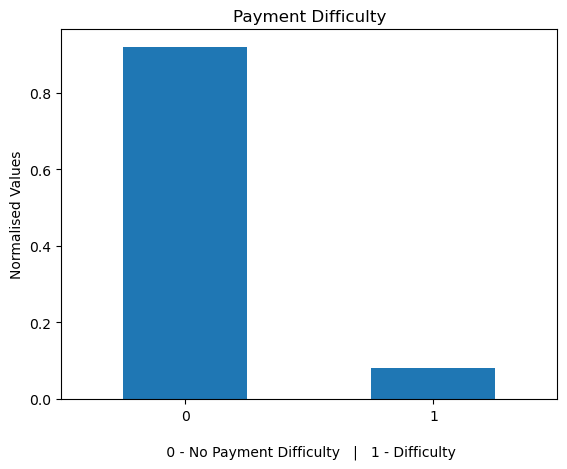

In [42]:
app_df.TARGET.value_counts(normalize=True).plot.bar()
plt.title("Payment Difficulty")
plt.xlabel("\n 0 - No Payment Difficulty   |   1 - Difficulty")
plt.xticks(rotation =0)
plt.ylabel("Normalised Values")
plt.show()

In [43]:
#checking exact Target 0 to Target 1 ratio
app_df[app_df.TARGET==0].shape[0]/app_df[app_df.TARGET==1].shape[0]

11.387150050352467

##### Inference
-Our data indicates that roughly one in eleven applicants, or about 9%, experiences payment difficulties.

In [44]:
# Analyzing columns with Categorical data

app_df.columns[app_df.dtypes=="object"]

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


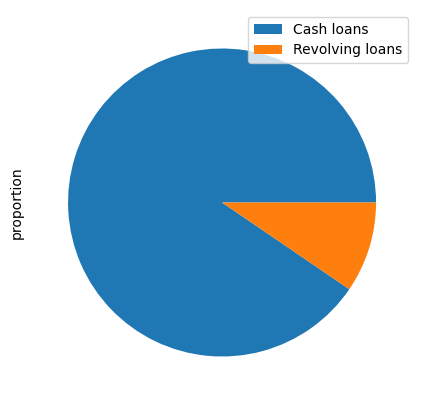

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


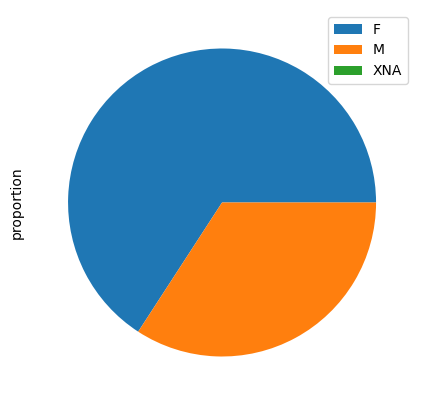

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


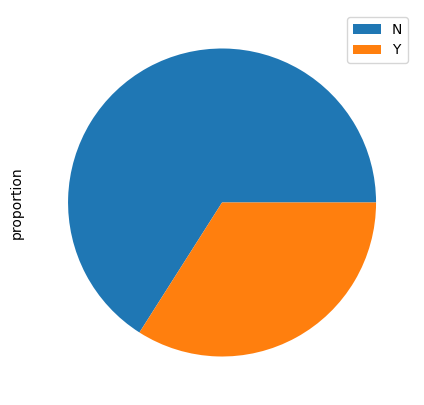

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


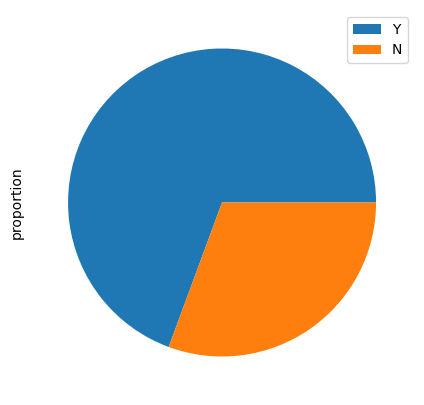

NAME_TYPE_SUITE
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64


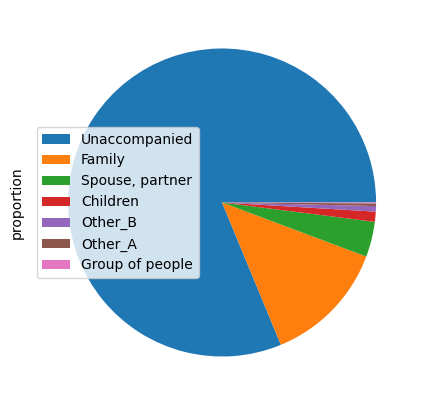

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


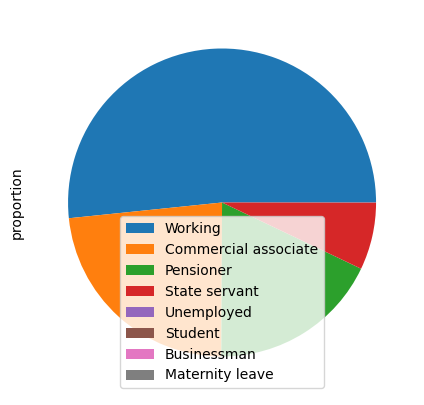

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


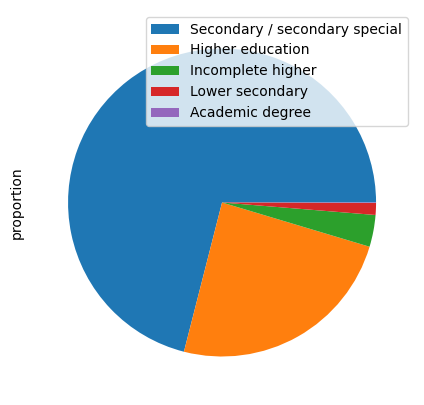

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


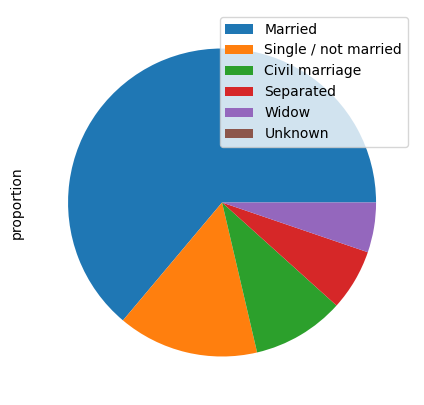

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


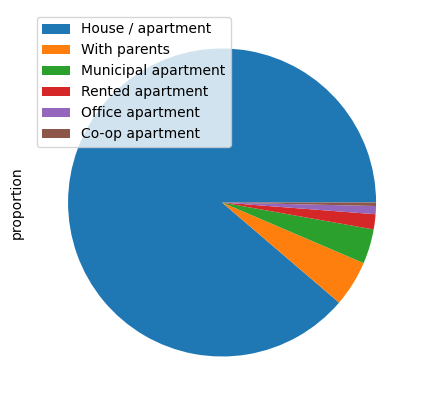

OCCUPATION_TYPE
NaN                      0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


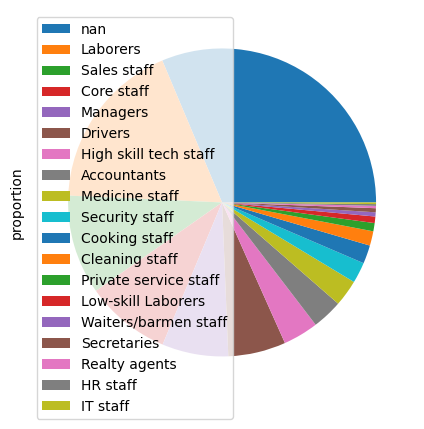

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


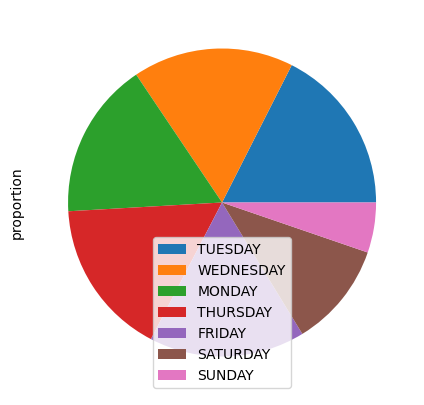

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

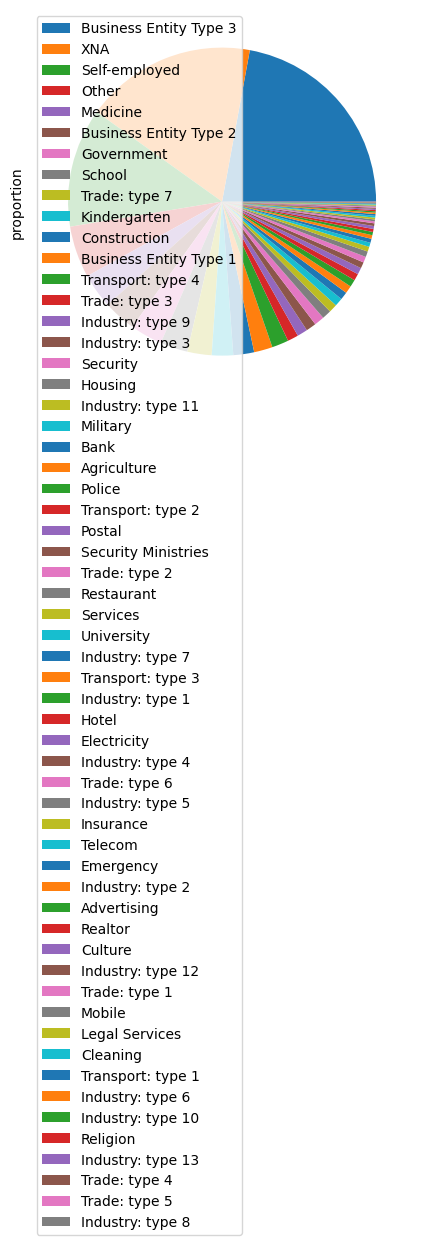

In [45]:
# Examining all columns containing object data types to identify unique values within each category.
for obj in app_df.columns:
    if app_df[obj].dtypes=="object":
        print(app_df[obj].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[5,5])
        app_df[obj].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()

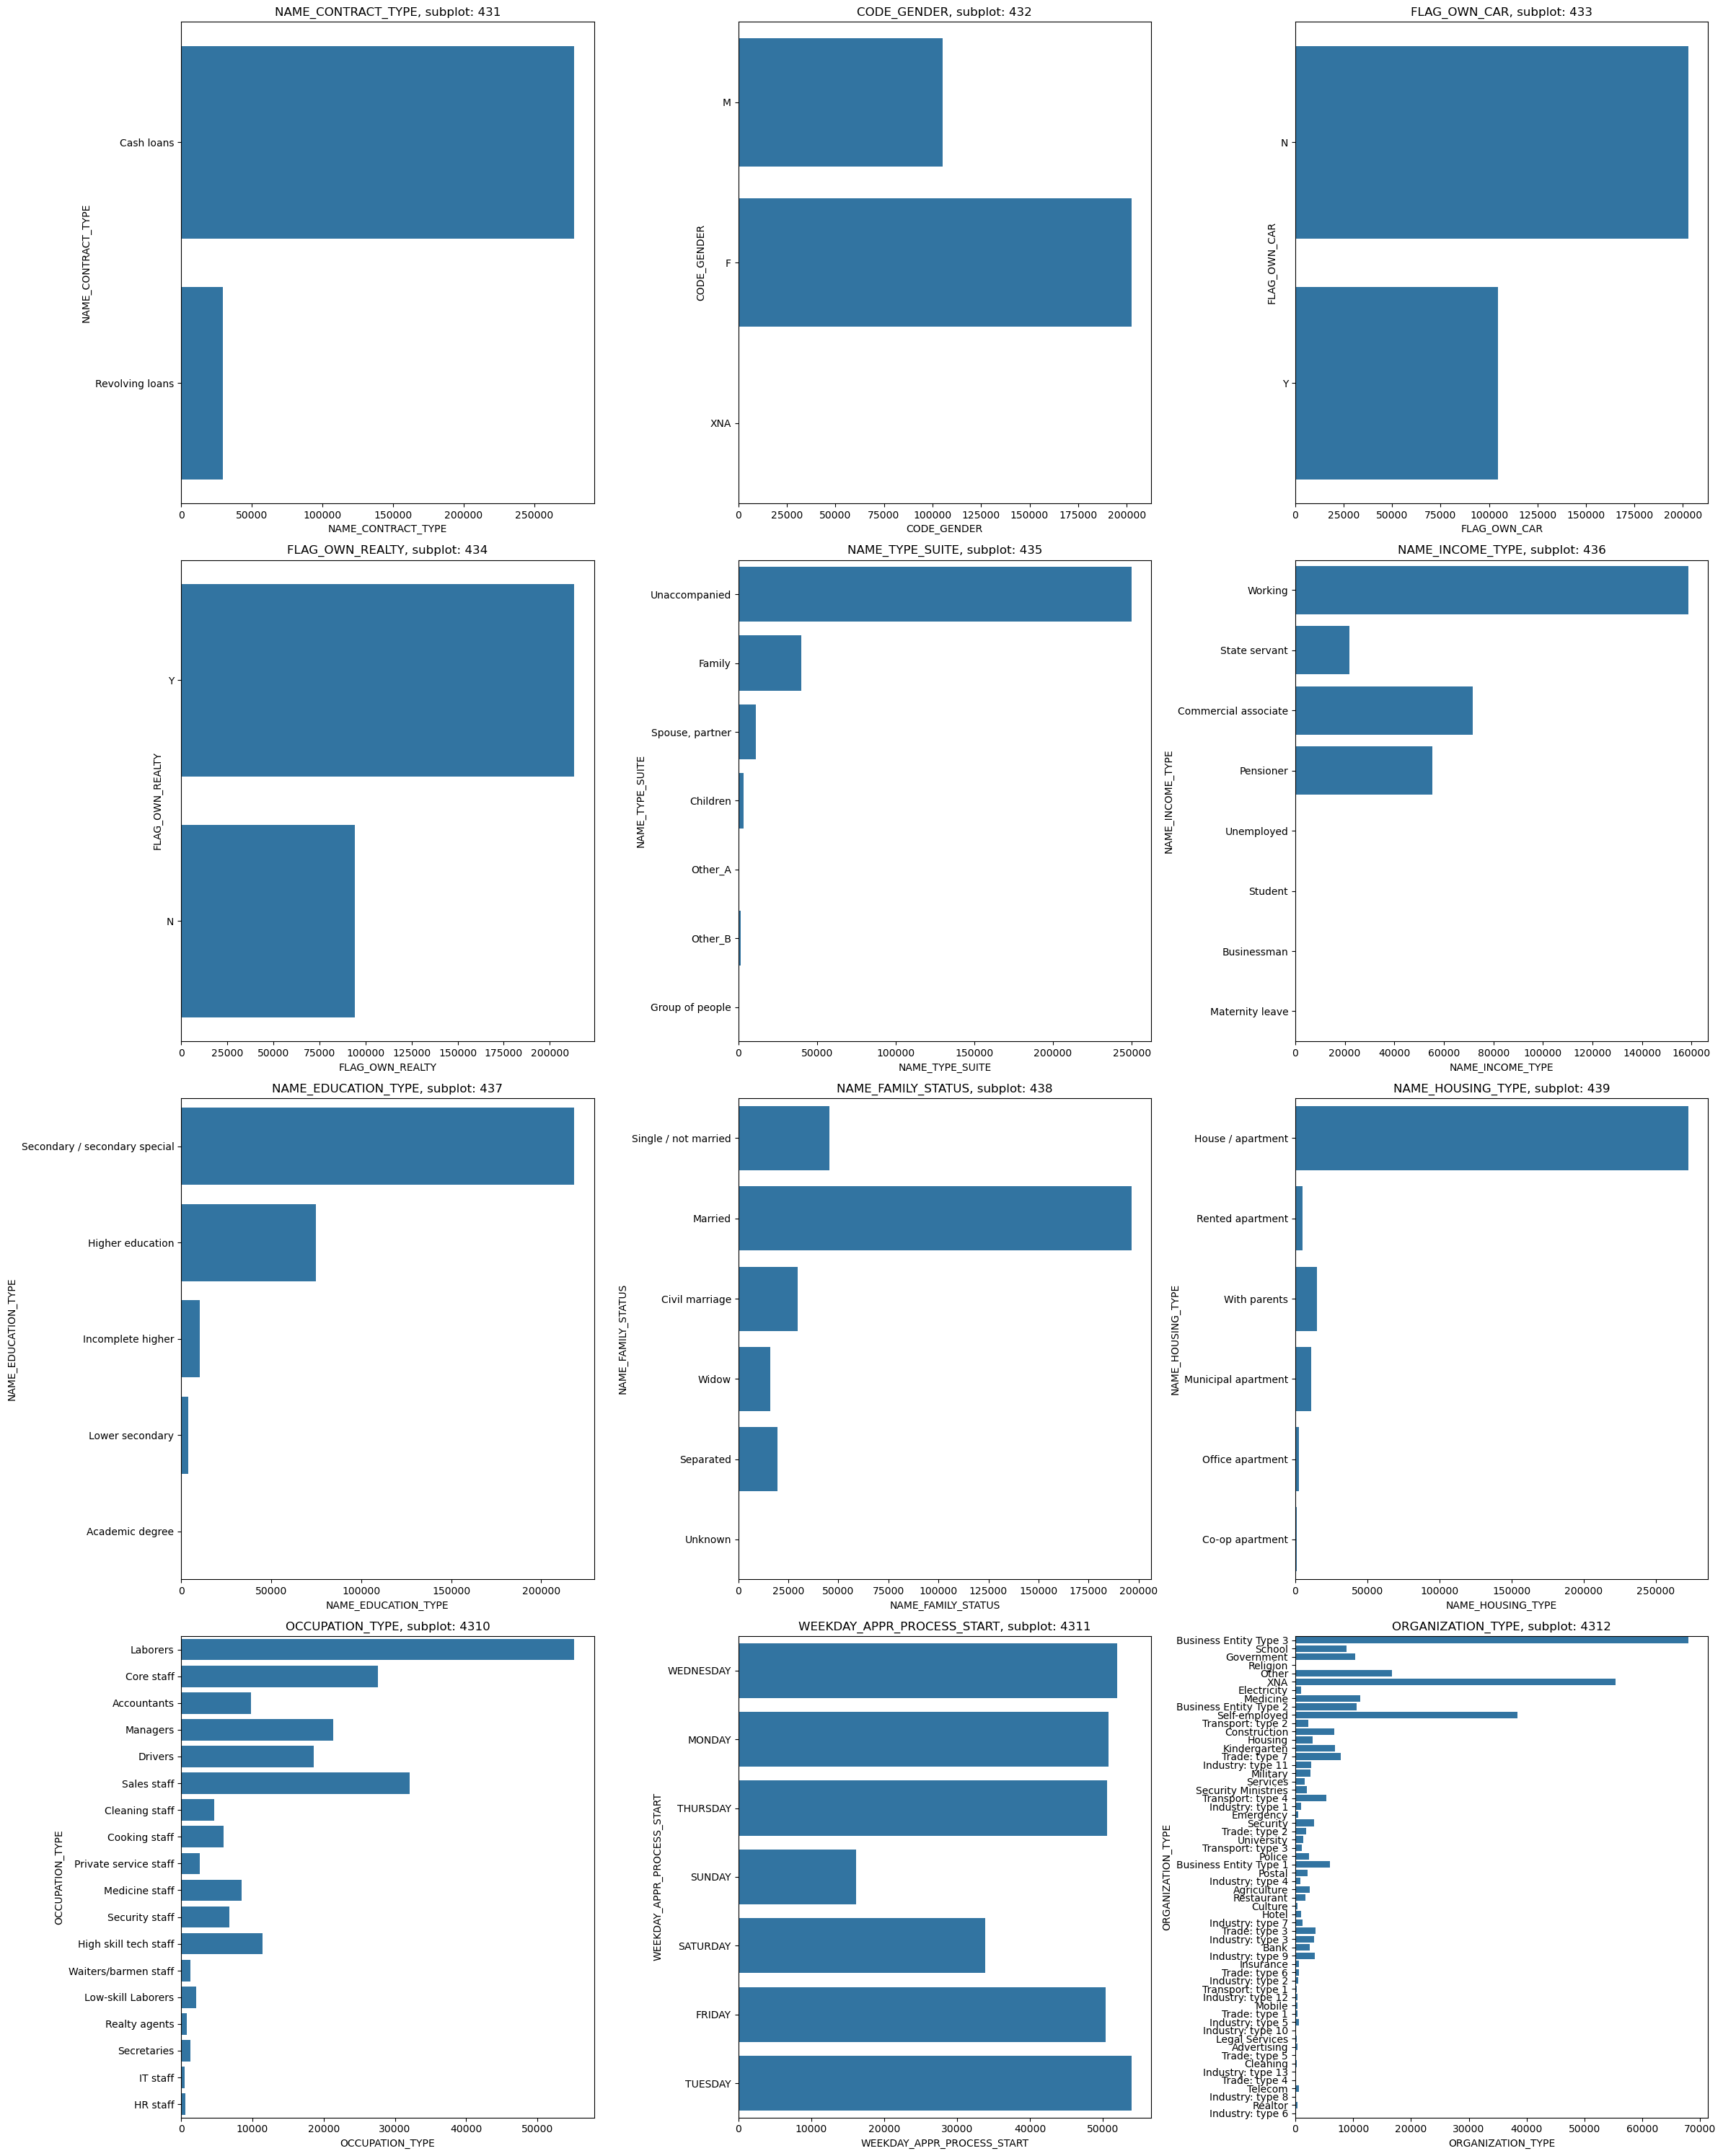

In [46]:
#  Categorical Data
x = 4  # number of rows
y = 3  # number of columns
z = 1  # initialize plot counter

fig = plt.figure(figsize=(24,30))
for i in app_df.columns:
    if app_df[i].dtypes=="object":
        plt.subplot(x, y, z)
        plt.title('{}, subplot: {}{}{}'.format(i, x, y, z))
        plt.xlabel(i)
        sns.countplot(app_df[i])
        z = z + 1

fig.tight_layout()
plt.show()

##### Key insights
- Approximately 90% of the loans offered are cash loans, while the remaining 10% are revolving loans.
- A significant majority of loan recipients are female, comprising 65% of the total, whereas males constitute 34%.
- Approximately two-thirds of applicants do not have personal car ownership.
- Approximately 70% of applicants are homeowners.
- 81% of applicants were accompanied by someone.
- Although the majority of applicants are working professionals, a significant portion, 18%, are pensioners.
- Approximately three-quarters of applicants have attained a secondary school level of education.
- Approximately two-thirds of applicants are married.
- For 31% of the applicants, the occupation type is missing or unknown.

#### Numerical variable

In [47]:
# Checking value counts for 'FLAG_OWN_CAR' column

app_df['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

In [48]:
# The categorical variables 'FLAG_OWN_CAR' and 'FLAG_OWN_REALTY' should be recoded into binary variables, where 'yes' is represented as 1 and 'no' as 0.

app_df['OWN_CAR_flag']=np.where(app_df.FLAG_OWN_CAR =="Y",1,0)
app_df['OWN_REALTY_flag']= np.where(app_df.FLAG_OWN_REALTY =="Y",1,0)
app_df['OWN_CAR_flag'].value_counts()


OWN_CAR_flag
0    202924
1    104587
Name: count, dtype: int64

In [49]:
# Analyzing columns with Numerical data 
app_df.columns[app_df.dtypes=="int64"]

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [50]:
# Removing all the Flag columns
for i in app_df.columns:
    if i.startswith("FLAG"):
        app_df.drop(columns=i, inplace=True)
        
app_df.shape

(307511, 47)

In [51]:
# Convert negative values in DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, and DAYS_ID_PUBLISH to positive.
app_df.DAYS_BIRTH=app_df.DAYS_BIRTH.apply(lambda x: abs(x//365.25))
app_df.rename({'DAYS_BIRTH':'AGE_IN_YEARS'}, axis=1, inplace=True)
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [52]:
# To analyze age-related trends, we will bin the 'AGE' column into specific age ranges and create a new categorical variable 'Age_grp'.
app_df['Age_grp']= pd.cut(app_df.AGE_IN_YEARS,bins=[15,25,35,45,55,65,75])
app_df['Age_grp'].value_counts(normalize=True)


Age_grp
(35, 45]    0.274010
(25, 35]    0.235533
(45, 55]    0.228252
(55, 65]    0.196812
(15, 25]    0.039781
(65, 75]    0.025612
Name: proportion, dtype: float64

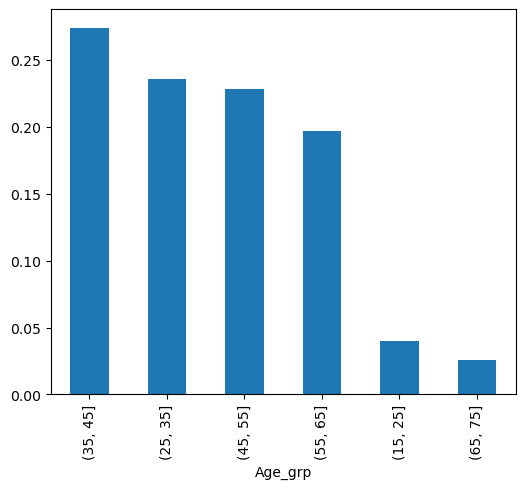

In [53]:
# Plotting a bar graph for Age_grp
plt.figure(figsize=(6,5))
app_df['Age_grp'].value_counts(normalize=True).plot.bar()
plt.show()

- **Conclusion** : The 35-45 age group represents the peak age for loan applications, likely due to factors such as homeownership, family responsibilities, and career advancements.

In [54]:
# To analyze income-related trends, bin the 'AMT_INCOME_TOTAL' column into specific income ranges and create a new categorical variable 'Income_grp'.
app_df['Income_grp']= pd.qcut(app_df['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['Very_Low','Low','Medium','High','Very_High'])
app_df['Income_grp'].value_counts(normalize=True)

Income_grp
Medium       0.274143
High         0.245562
Low          0.218486
Very_High    0.153224
Very_Low     0.108585
Name: proportion, dtype: float64

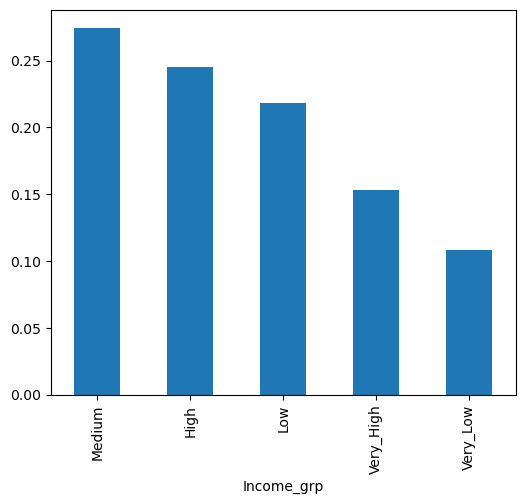

In [55]:
# Plotting a bar graph for Income_grp
plt.figure(figsize=(6,5))
app_df['Income_grp'].value_counts(normalize=True).plot.bar()
plt.show()

- **Conclusion**: Applicants from the medium-income group have the highest representation among loan seekers.

In [56]:
# To represent the elapsed time in years, convert the negative values in DAYS_REGISTRATION and DAYS_ID_PUBLISH to positive values and divide by 365. 
# The column names will be updated to reflect the time unit accurately.

app_df.DAYS_REGISTRATION = app_df.DAYS_REGISTRATION.apply(lambda x: abs(x//365.25))
app_df.DAYS_ID_PUBLISH = app_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x//365.25))
app_df.rename({'DAYS_REGISTRATION':'YEARS_REGISTRATION', 'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, axis=1, inplace=True)

In [57]:
# To ensure accurate interpretation,transform the -ve values in DAYS_LAST_PHONE_CHANGE into +ve values,indicating the number of days since the last phone change.

app_df.DAYS_LAST_PHONE_CHANGE = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

In [58]:
# Converts 'DAYS_EMPLOYED' to years and renames the column.

app_df.DAYS_EMPLOYED=app_df.DAYS_EMPLOYED.apply(lambda x: abs(x//365.25))
app_df.rename({'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, axis=1, inplace=True)

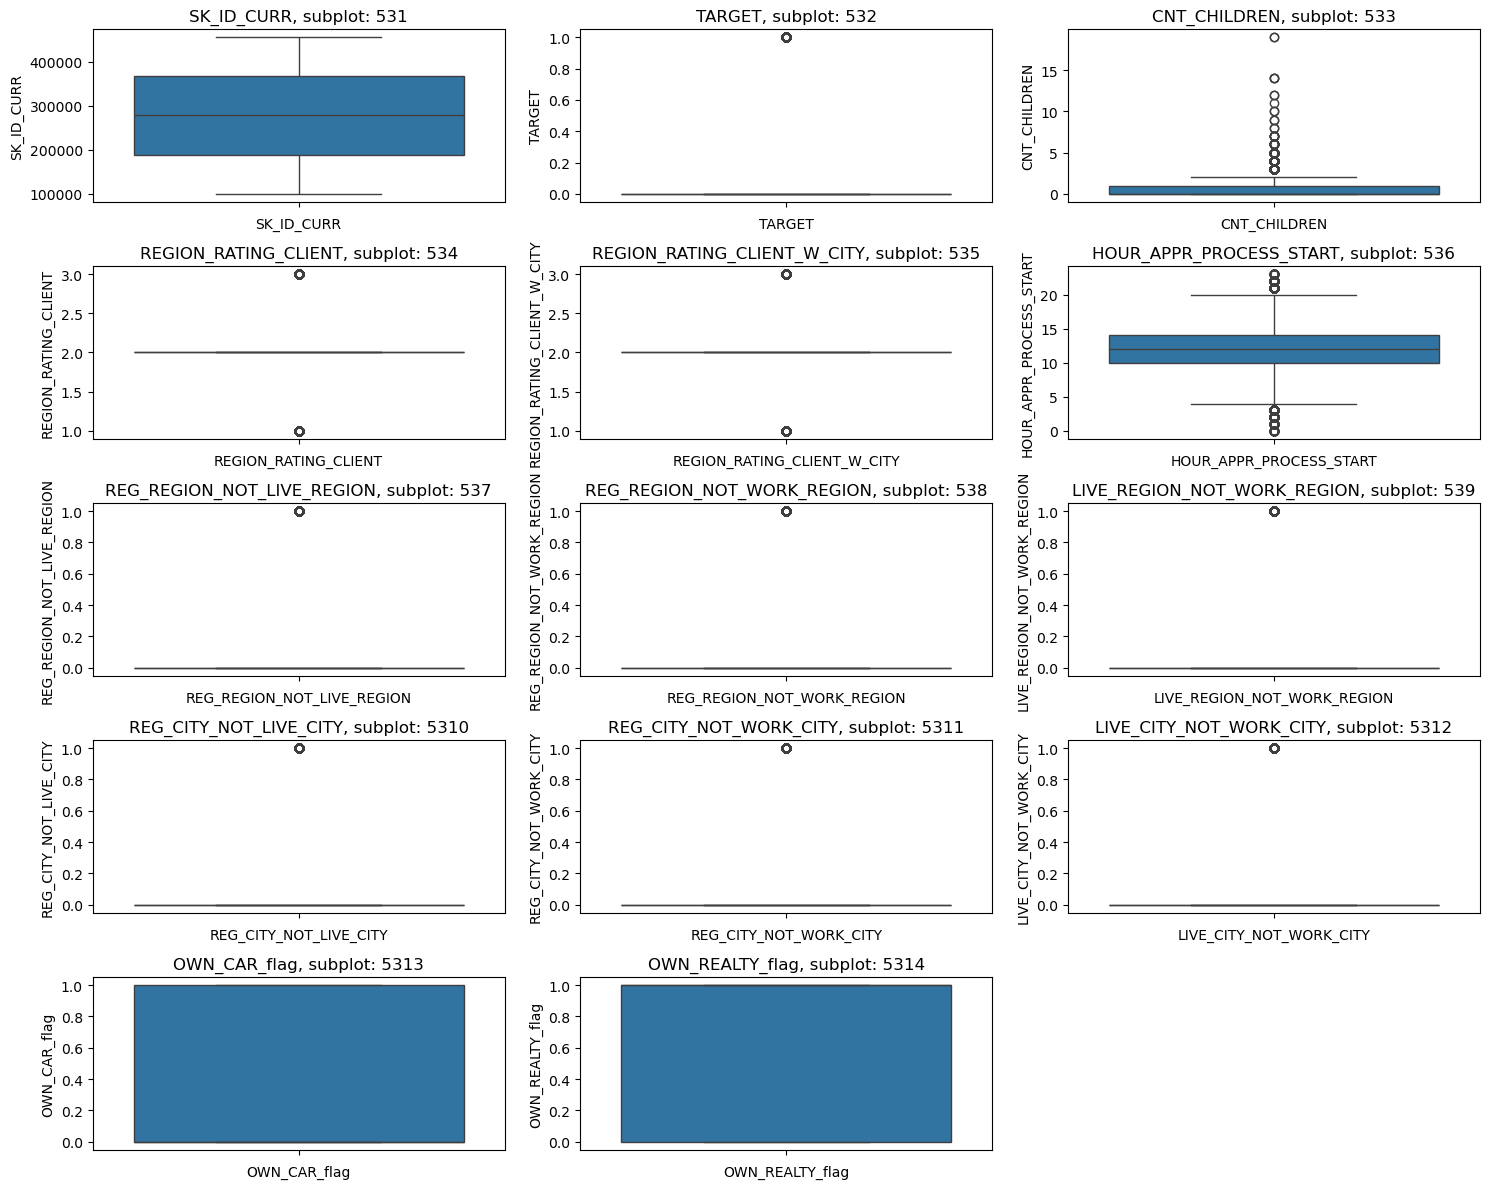

In [59]:
# Visualizing integer data with box plots

# number of rows
a = 5
# number of columns
b = 3  
# initialize plot counter
c = 1  
# customizing the plot size
fig = plt.figure(figsize=(15,12))

# applying for loop on all the int columns
for i in app_df.columns:
    if app_df[i].dtypes=="int64" or app_df[i].dtypes=="int32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(app_df[i])
        c = c + 1

fig.tight_layout()
plt.show()

- We can observe outlier in 'CNT_CHILDREN' column

In [60]:
# observing 'CNT_CHILDREN' column
app_df.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [61]:
# Checking for value counts
app_df['CNT_CHILDREN'].value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

14 rows have unusually high CNT_CHILDREN values, which may be outliers.

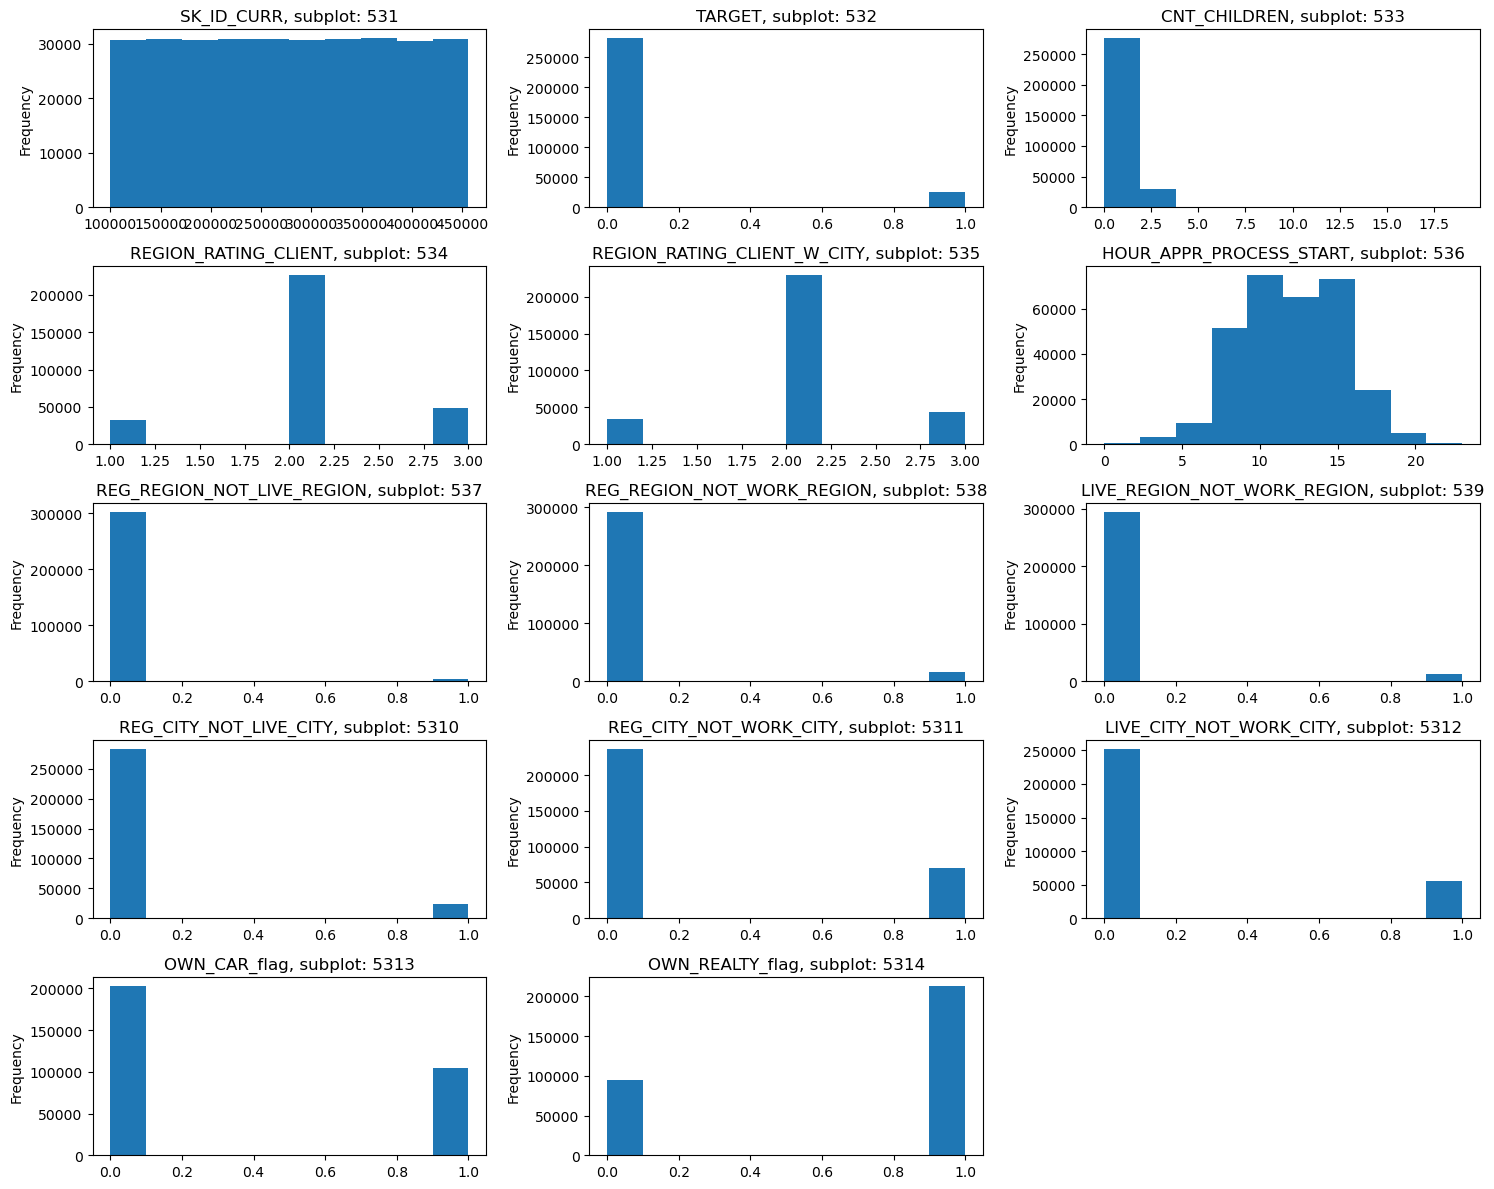

In [62]:
# Visualizing integer data with Histograms

# number of rows
a = 5  
# number of columns
b = 3  
# initialize plot counter
c = 1  

# cutomizing the plot size
fig = plt.figure(figsize=(15,12))

# applying for loops on all the int columns
for i in app_df.columns:
    if app_df[i].dtypes=="int64" or app_df[i].dtypes=="int32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        app_df[i].plot.hist()
        c = c + 1

fig.tight_layout()
plt.show()


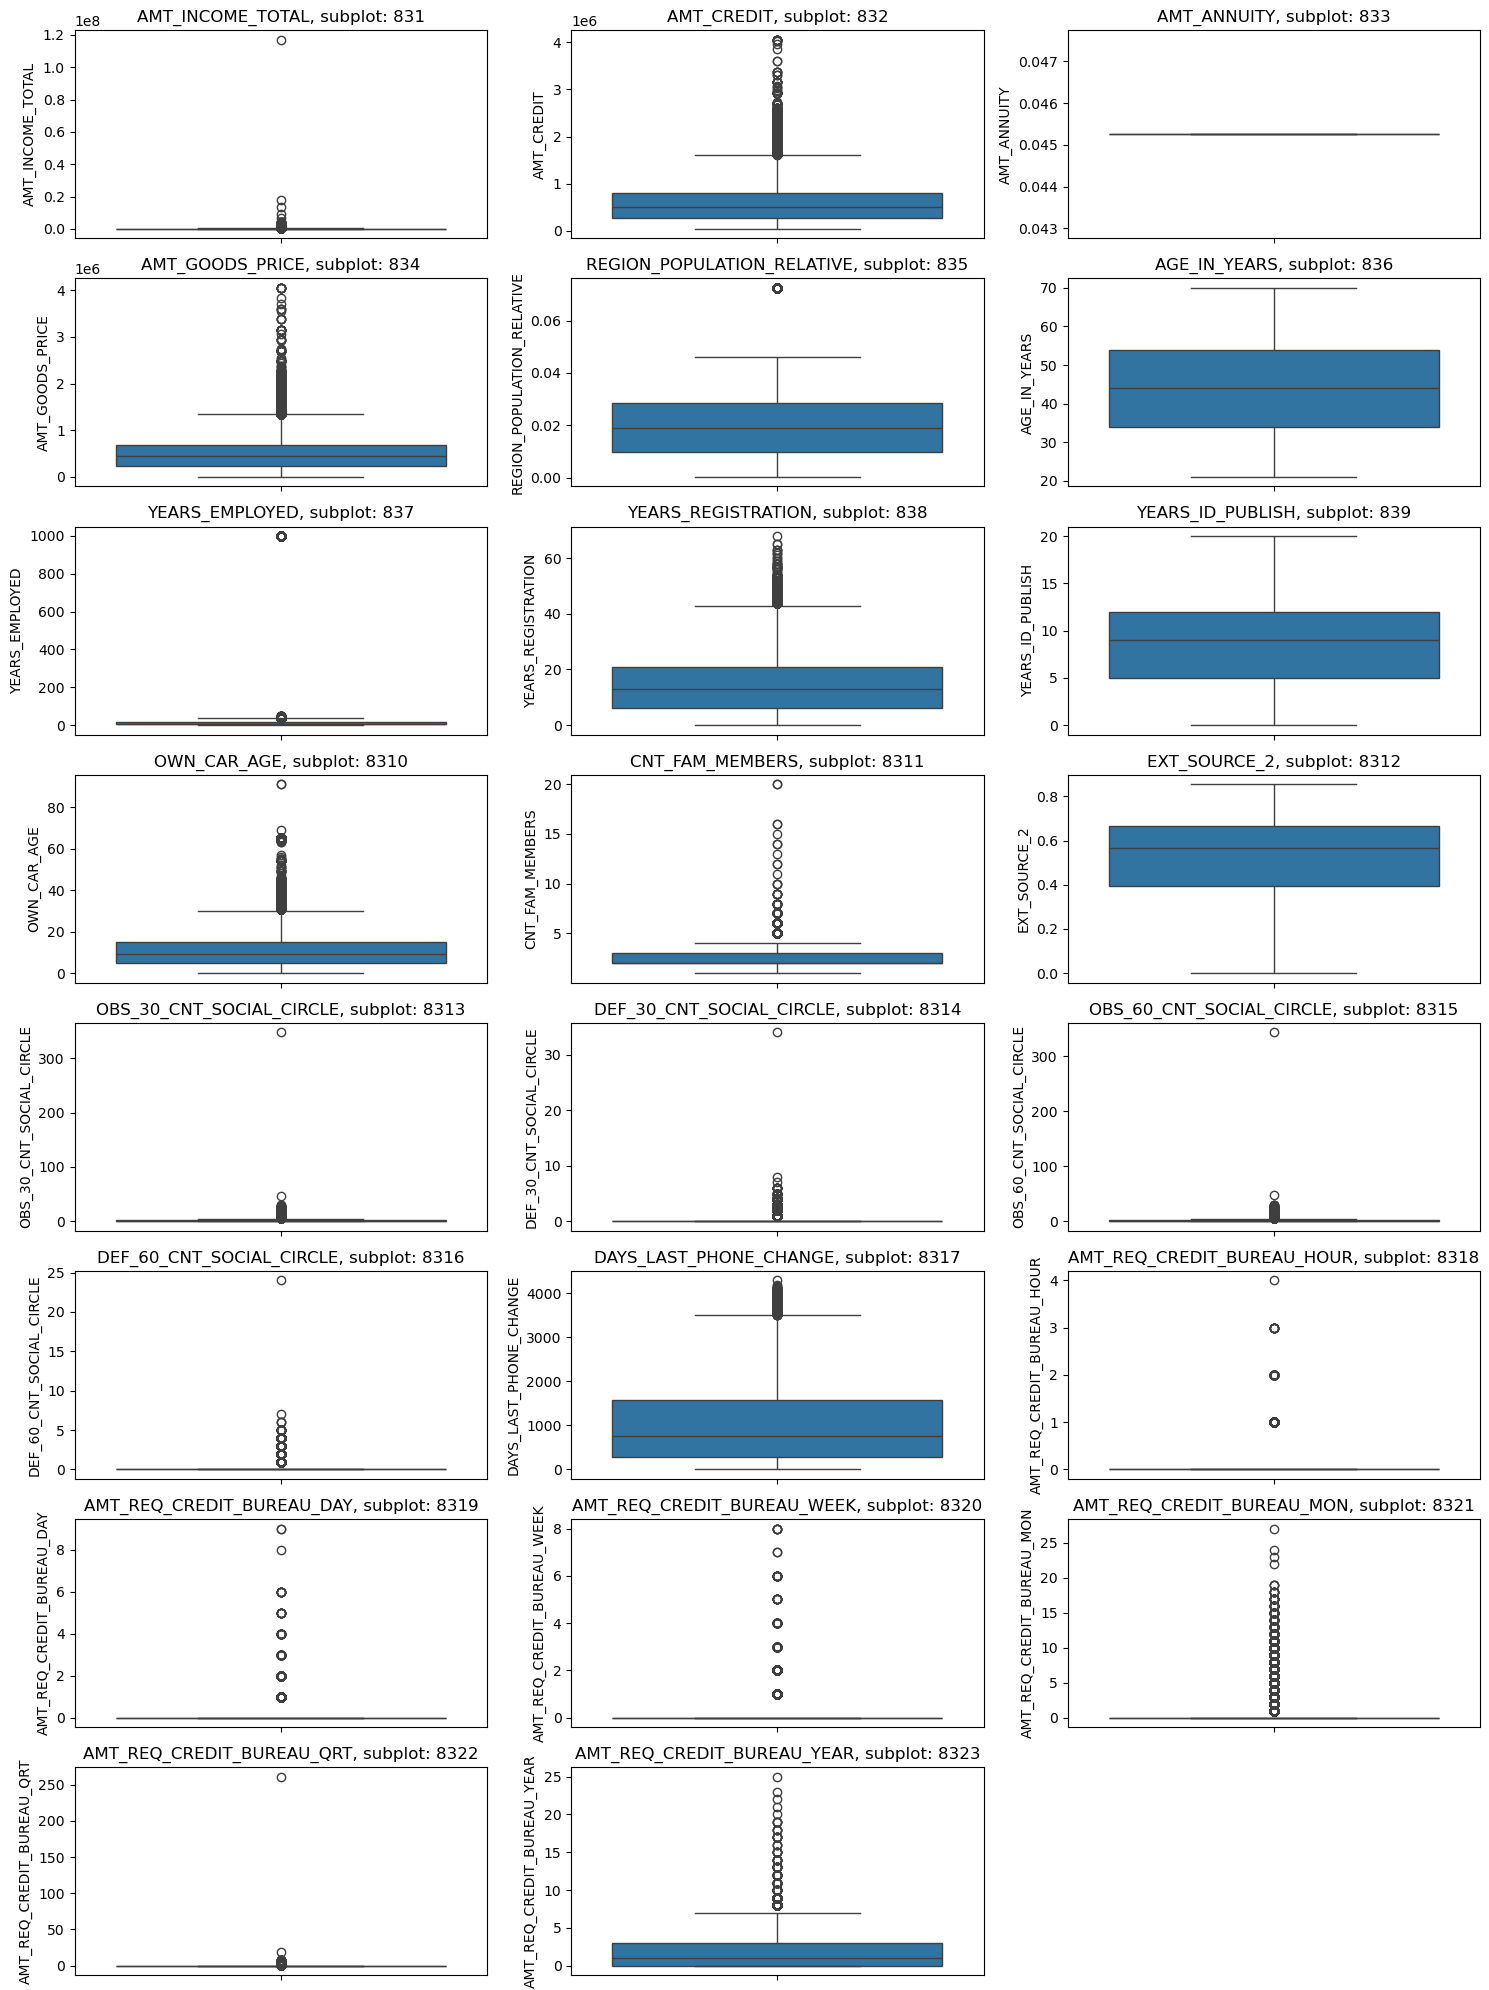

In [63]:
# Visualizing float data through box plot
a = 8  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,20))

for i in app_df.columns:
    if app_df[i].dtypes=="float64" or app_df[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        
        sns.boxplot(app_df[i])
        c = c + 1

fig.tight_layout()
plt.show()

##### We can observe outliers in the following columms:
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_GOODS_PRICE
- YEARS_REGISTRATION
- OWN_CAR_AGE
- YEARS_EMPLOYED
- DAYS_LAST_PHONE_CHANGE
- AMT_REQ_CREDIT_BUREAU_YEAR

In [64]:
# Checking for the value counts of the columns with outliers

outlier_col=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','YEARS_EMPLOYED','YEARS_REGISTRATION','OWN_CAR_AGE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_YEAR']

for i in outlier_col:
    print("\n")
 
    print(app_df[i].describe())  # Checking for descriptive statistics
    print("\n")
 
    print(app_df[i].value_counts( dropna=False, normalize=True))  # value counts
    print("\n")
 



count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


AMT_INCOME_TOTAL
135000.0    0.116256
112500.0    0.100871
157500.0    0.086358
180000.0    0.080384
90000.0     0.073113
              ...   
117324.0    0.000003
64584.0     0.000003
142897.5    0.000003
109170.0    0.000003
113062.5    0.000003
Name: proportion, Length: 2548, dtype: float64




count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


AMT_CREDIT
450000.0     0.031573
675000.0     0.028867
225000.0     0.026542
180000.0     0.023876
270000.0     0.023547
               ...   
487318.5     0.000003
630400.5     0.000003
1875276.0    0.000003
1395895.5    0.000003
1391130.0    0.000003
Name: proportion, 

**Dividing dataframe (app_df) into two** :
- Target variable '1': client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
- Target variable '0' : all other cases

In [65]:
app_target_0=app_df[app_df['TARGET']==0]
app_target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1          270000.0   1293502.5     0.045254        1129500.0   
2           67500.0    135000.0     0.045254         135000.0   
3          135000.0    312682.5     0.045254         297000.0   
4          121500.0    513000.0     0.045254         513000.0   
5           99000.0    490495.5     0.045254         454500.0   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1           Family    State servant               Higher education   
2    Unaccompanied          Working  Secondary / secondary special   
3    Unaccompanied          Working  Secondary / secondary special   
4    Unaccompanied          Working  Secondary / secondary special   
5  Spouse, partner    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   

   AGE_IN_YEARS  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
1          46.0             4.0                 4.0               1.0   
2          53.0             1.0                12.0               7.0   
3          53.0             9.0                27.0               7.0   
4          55.0             9.0                12.0              10.0   
5          47.0             5.0                14.0               2.0   

   OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
1          NaN      Core staff              2.0                     1   
2         26.0        Laborers              1.0                     2   
3          NaN        Laborers              2.0                     2   
4          NaN      Core staff              1.0                     2   
5          NaN        Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   
5                            2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   
5                       16                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                     

In [66]:
app_target_1=app_df[app_df['TARGET']==1]
app_target_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0       100002       1         Cash loans           M             0   
26      100031       1         Cash loans           F             0   
40      100047       1         Cash loans           M             0   
42      100049       1         Cash loans           F             0   
81      100096       1         Cash loans           F             0   

    AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           202500.0    406597.5     0.045254         351000.0   
26          112500.0    979992.0     0.045254         702000.0   
40          202500.0   1193580.0     0.045254         855000.0   
42          135000.0    288873.0     0.045254         238500.0   
81           81000.0    252000.0     0.045254         252000.0   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied               Working  Secondary / secondary special   
26   Unaccompanied               Working  Secondary / secondary special   
40   Unaccompanied  Commercial associate  Secondary / secondary special   
42   Unaccompanied               Working  Secondary / secondary special   
81   Unaccompanied             Pensioner  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                    0.018801   
26                 Widow  House / apartment                    0.018029   
40               Married  House / apartment                    0.025164   
42        Civil marriage  House / apartment                    0.007305   
81               Married  House / apartment                    0.028663   

    AGE_IN_YEARS  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0           26.0             2.0                10.0               6.0   
26          52.0             8.0                18.0               6.0   
40          48.0             4.0                 4.0               3.0   
42          37.0            10.0                 1.0              13.0   
81          68.0           999.0                15.0              12.0   

    OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           NaN        Laborers              1.0                     2   
26          NaN   Cooking staff              1.0                     3   
40          NaN        Laborers              2.0                     2   
42          NaN     Sales staff              2.0                     3   
81          NaN             NaN              2.0                     2   

    REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                             2                  WEDNESDAY   
26                            2                     MONDAY   
40                            2                    TUESDAY   
42                            3                   THURSDAY   
81                            2                   THURSDAY   

    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
26                        9                           0   
40                        9                           0   
42                       11                           0   
81                       10                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
26                           0                            0   
40                           0                            0   
42                           0                            0   
81                           0                            0   

    REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                        0                       0                        0   
26                       0                       0                        0   
40                       0                  

In [67]:
# Organizing variables by data type.
obj_var_List=[]
num_var_List=[]
for i in app_df.columns:
    if app_df[i].dtypes=="object":
        obj_var_List.append(i)
    else:
        num_var_List.append(i)

cat_var_List=[]
for i in num_var_List:
    if len(app_df[i].unique())<4:
        app_df[i].astype("category")
        cat_var_List.append(i)    


for i in cat_var_List:
    num_var_List.remove(i)

print("Numercial Columns :", num_var_List) 
print("\n")

print("object Columns :", obj_var_List) 
print("\n")

print("categorical Columns :", cat_var_List) 

Numercial Columns : ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'Age_grp', 'Income_grp']


object Columns : ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


categorical Columns : ['TARGET', 'AMT_ANNUITY', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_R

In [68]:
# Excluding binned and ordinal variables.
num_var_List.remove('Income_grp')
num_var_List.remove('Age_grp')
num_var_List.remove('SK_ID_CURR')
obj_var_List.remove('CODE_GENDER')

cat_var_List.append('CODE_GENDER')

cat_var_List.remove('TARGET')

print("Numercial Columns :", num_var_List) 
print("\n")

print("obj Columns :", obj_var_List) 
print("\n")

print("cat Columns :", cat_var_List) 

Numercial Columns : ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


obj Columns : ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


cat Columns : ['AMT_ANNUITY', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_C

##### Univariate analysis of categorical variables on both the data frames

Graph for :  NAME_CONTRACT_TYPE


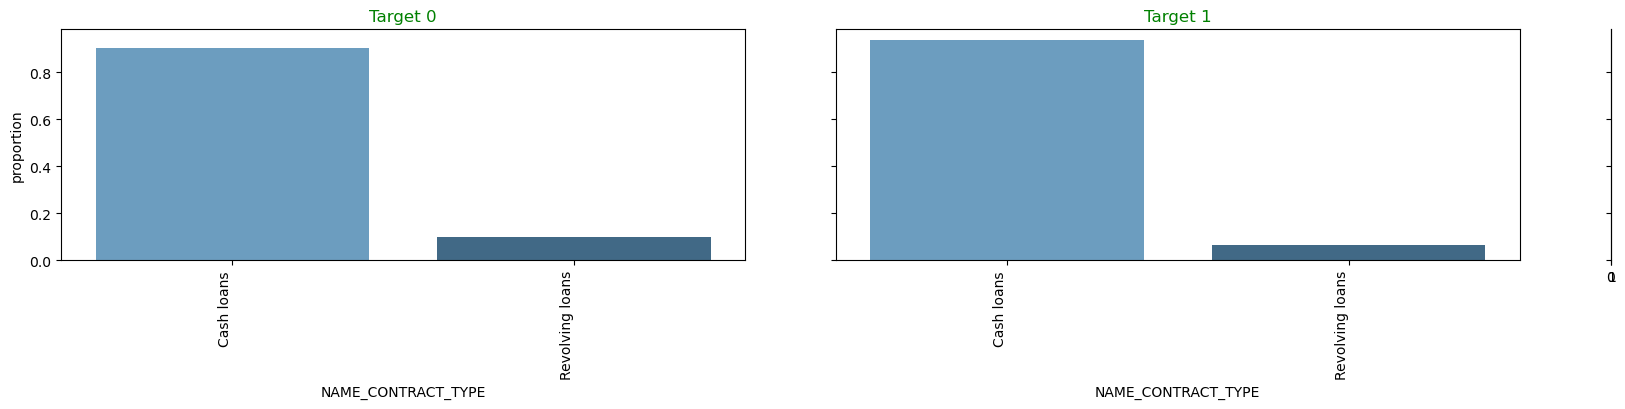

Graph for :  NAME_TYPE_SUITE


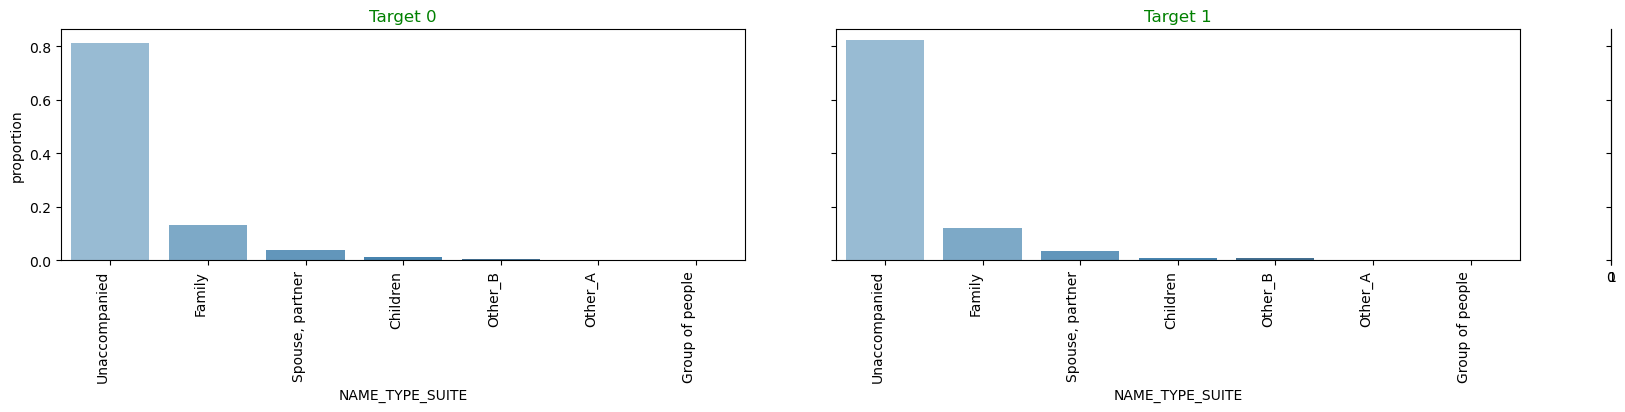

Graph for :  NAME_INCOME_TYPE


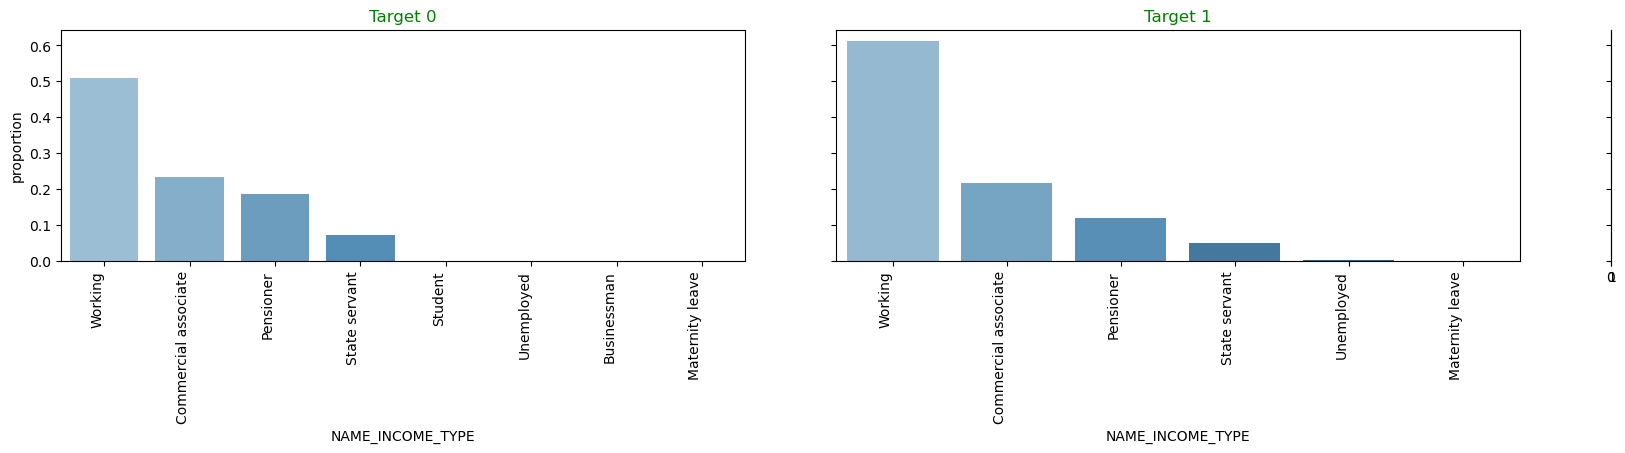

Graph for :  NAME_EDUCATION_TYPE


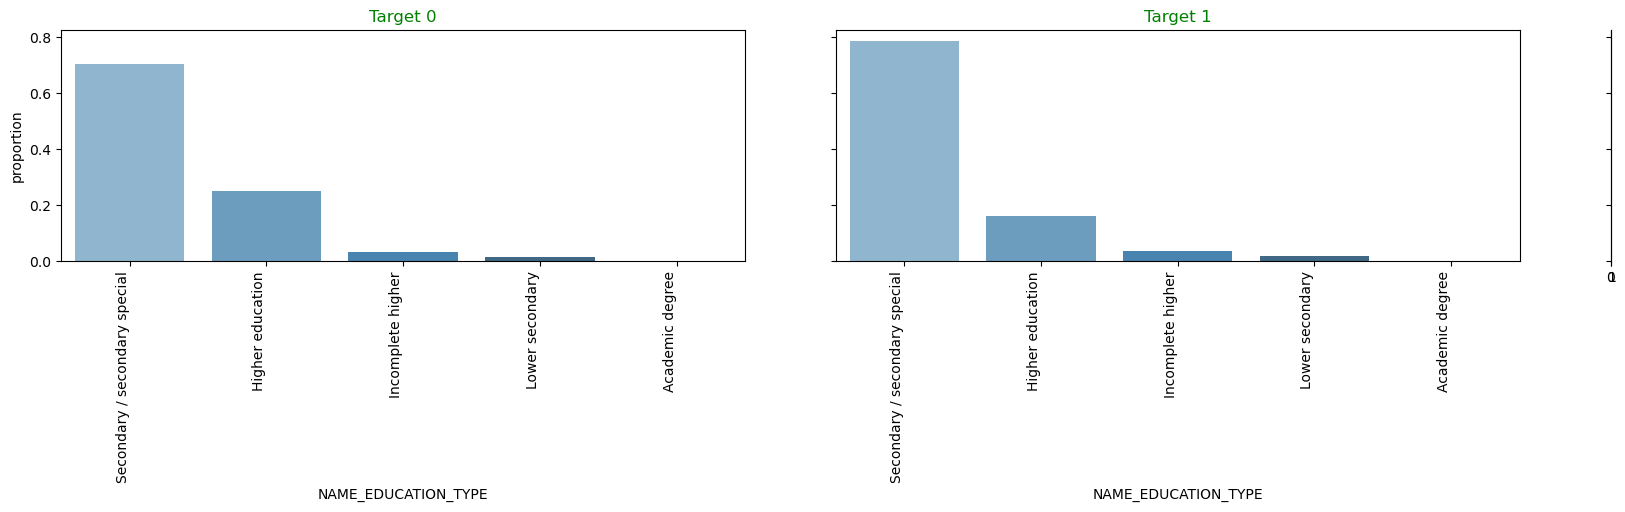

Graph for :  NAME_FAMILY_STATUS


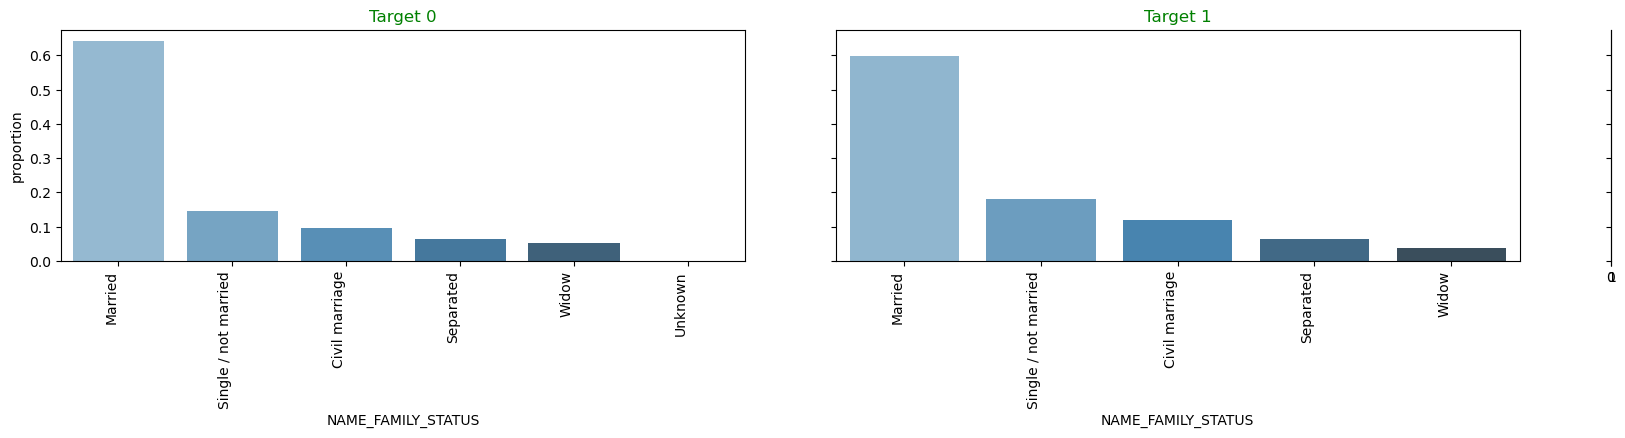

Graph for :  NAME_HOUSING_TYPE


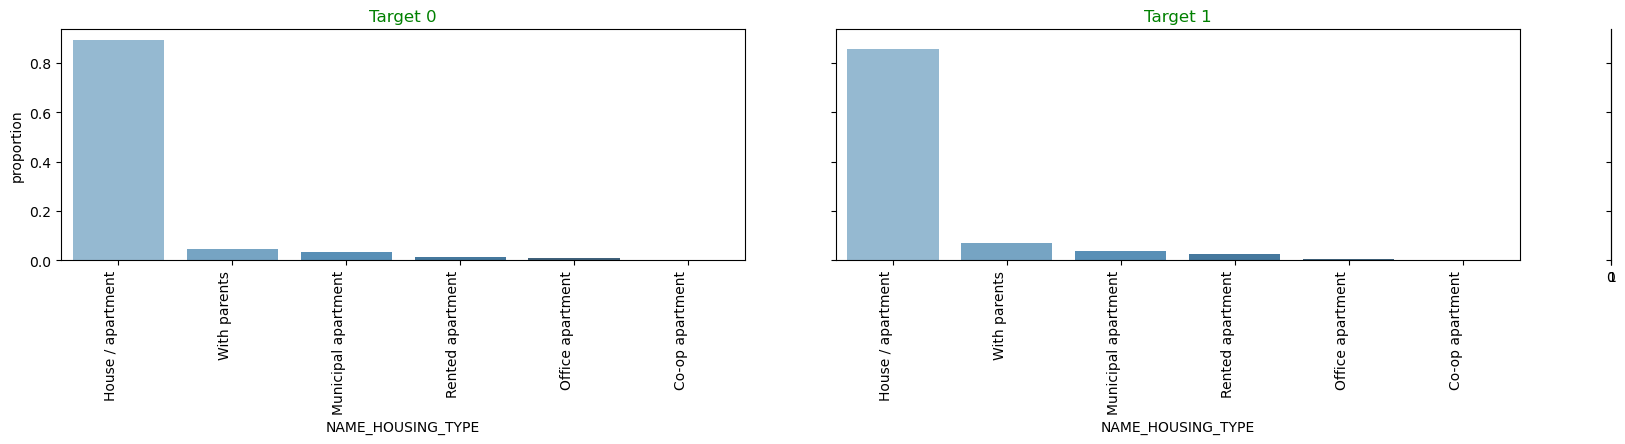

Graph for :  OCCUPATION_TYPE


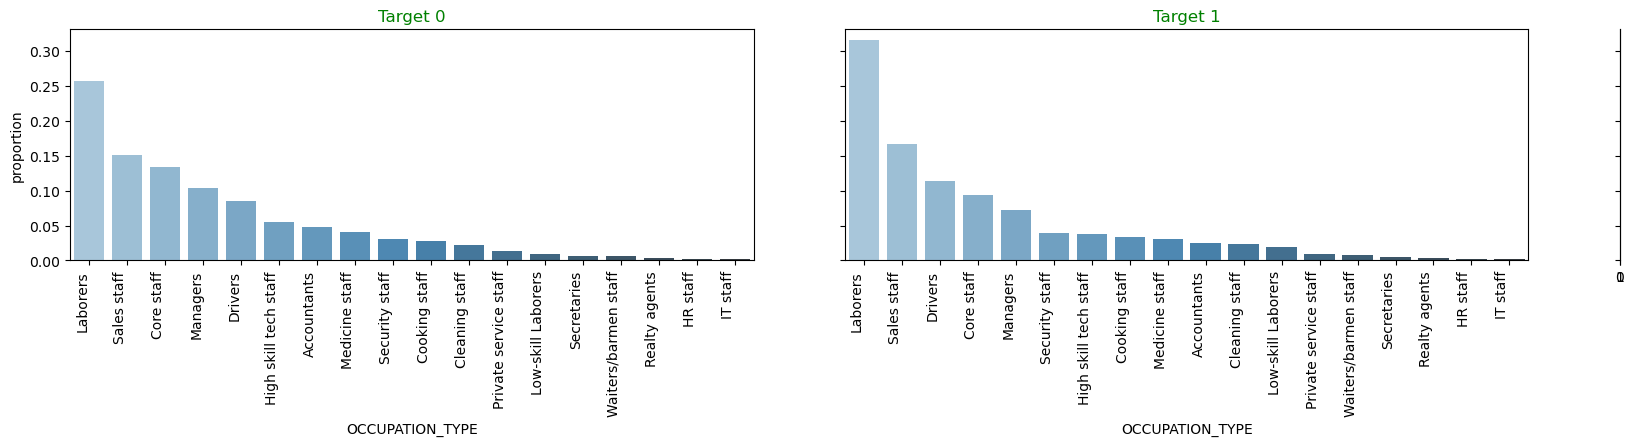

Graph for :  WEEKDAY_APPR_PROCESS_START


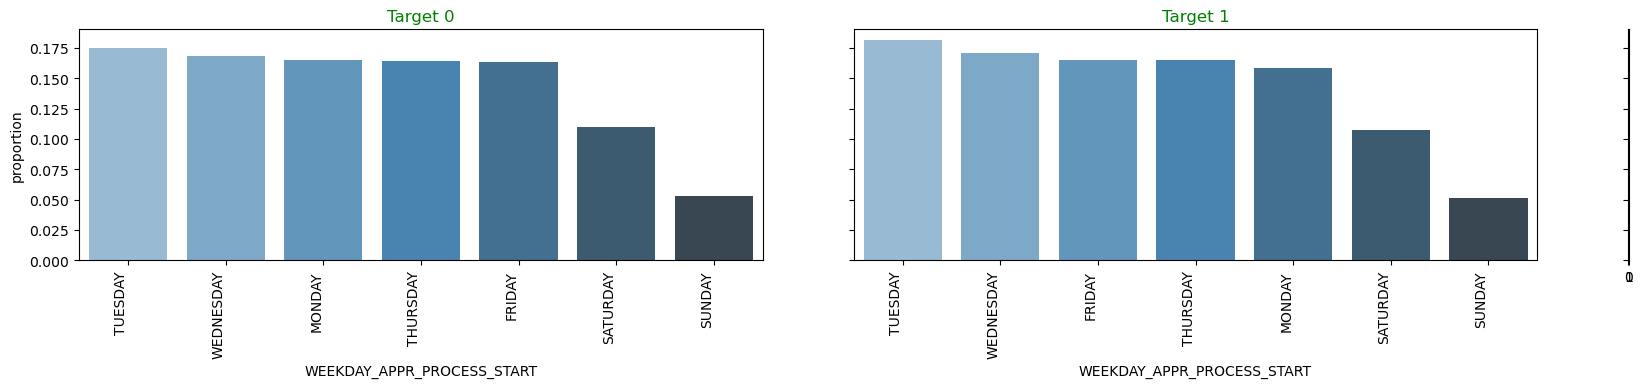

Graph for :  ORGANIZATION_TYPE


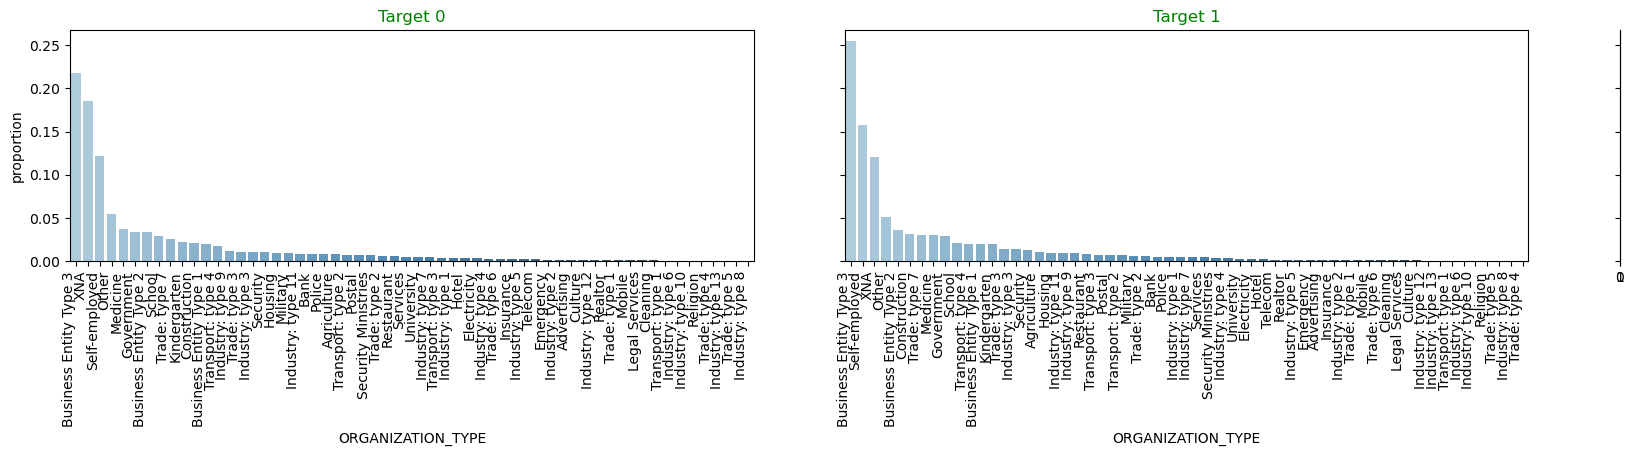

In [69]:
for i in obj_var_List:
    
    cat_num_0=app_target_0[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(20,3))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(minor=False), rotation=90, horizontalalignment='right')
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=app_target_1[i].value_counts(normalize=True)
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()
    

##### **Key Insights**
- Cash loans dominate the portfolio, especially for target 1
- Most applicants apply for loans individually, regardless of risk profile.
- Secondary education is the most common qualification among applicants, especially for defaulters.
- Approximately 60% of loan defaults originate from married applicants, indicating a potential correlation between marital status and repayment behavior.
- A significant majority of applicants, both for low-risk (target 0) and high-risk (target 1) profiles, reside in houses or apartments. This suggests that housing type may not be a strong predictor of loan default behavior.
- Individuals employed as laborers, sales staff, core staff, and drivers comprise a significant portion of loan defaulters. Additionally, laborers constitute the largest occupational group among all applicants.
- Self-employed individuals and business entities are overrepresented among defaulters.
  

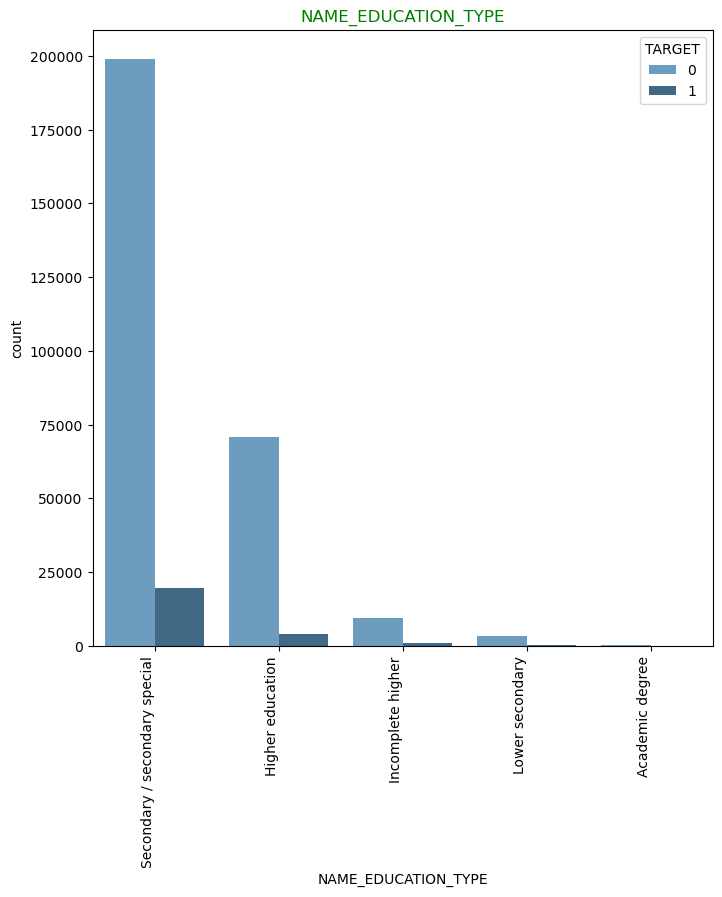

In [70]:
plt.figure(figsize=(8,8))

chart=sns.countplot(x='NAME_EDUCATION_TYPE', data=app_df, hue="TARGET", palette="Blues_d")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.axes.set_title('NAME_EDUCATION_TYPE',fontsize= 12,fontweight= 7,color='Green')
plt.show()

As the data is not balanced,the above plot cannot be inferred correctly.

##### Univariate Analysis on Categorical Ordered

Graph for :  AMT_ANNUITY


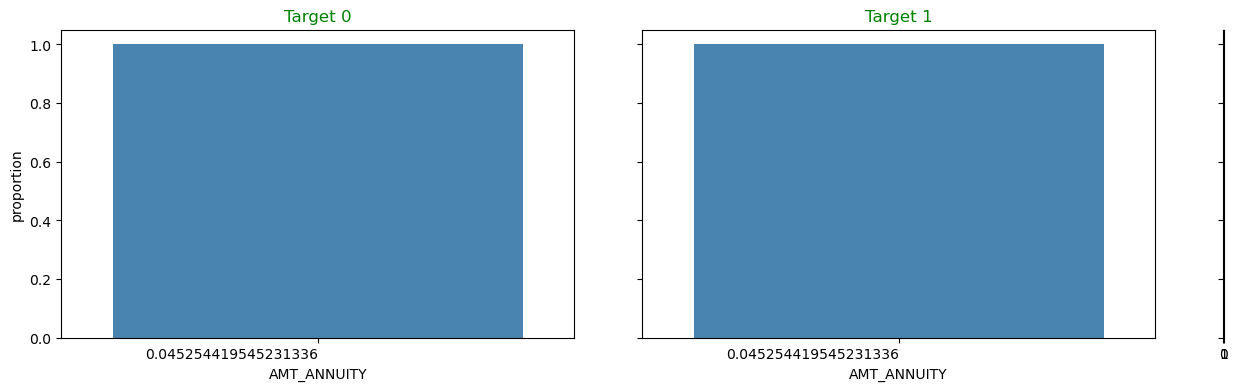

Graph for :  REGION_RATING_CLIENT


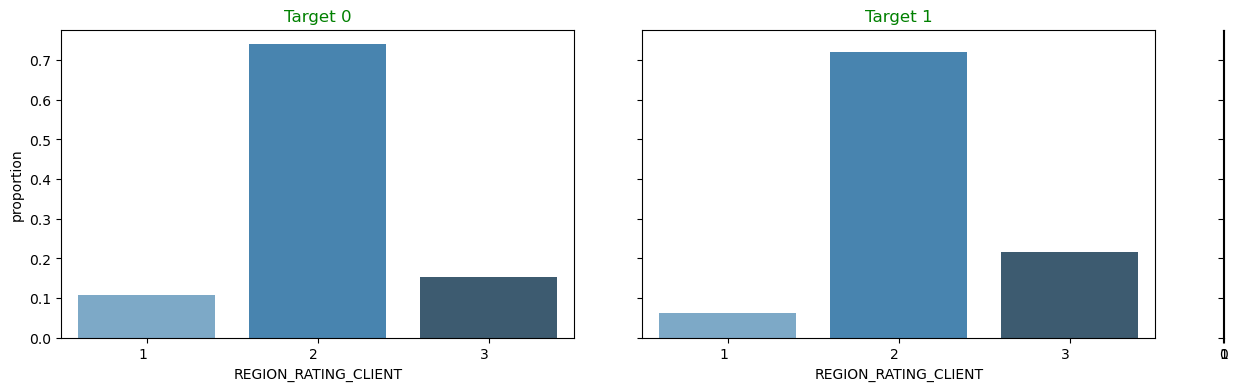

Graph for :  REGION_RATING_CLIENT_W_CITY


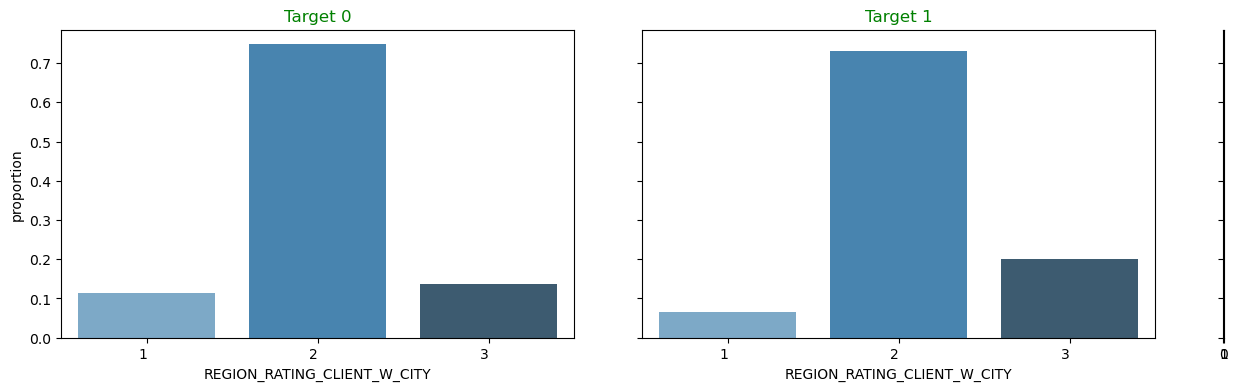

Graph for :  REG_REGION_NOT_LIVE_REGION


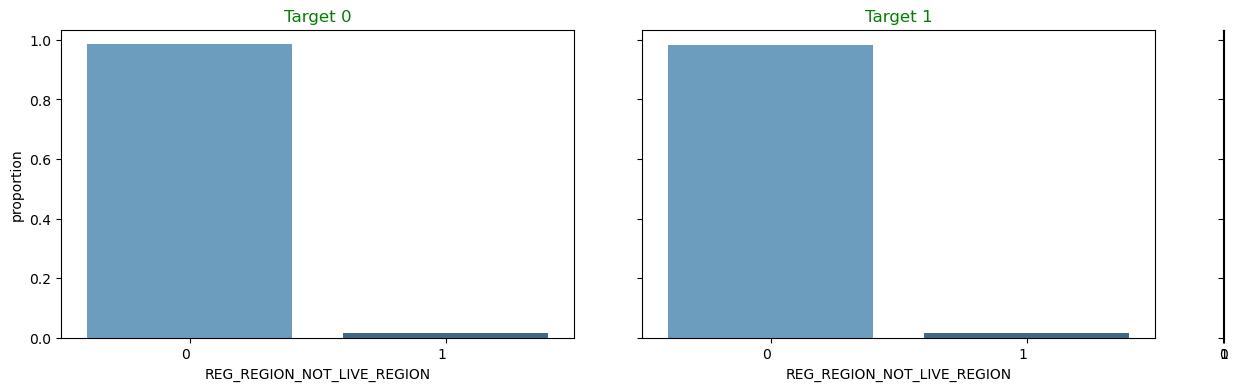

Graph for :  REG_REGION_NOT_WORK_REGION


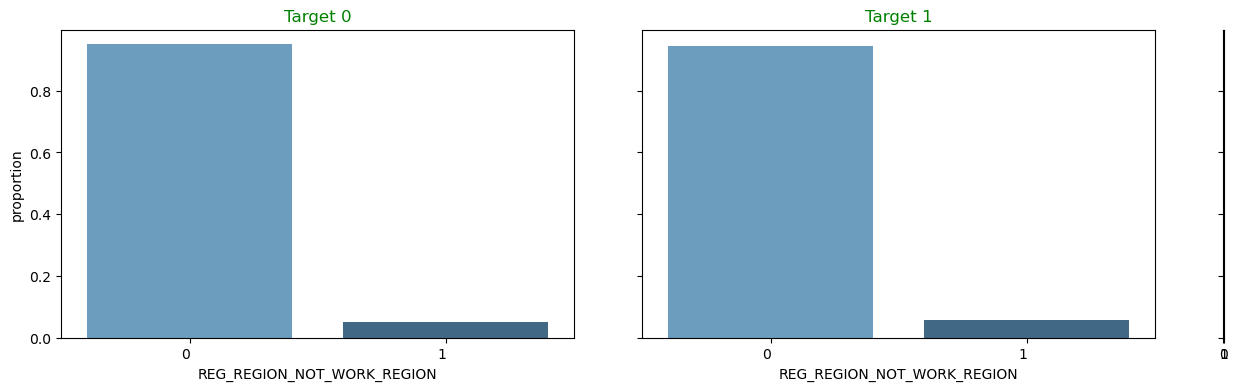

Graph for :  LIVE_REGION_NOT_WORK_REGION


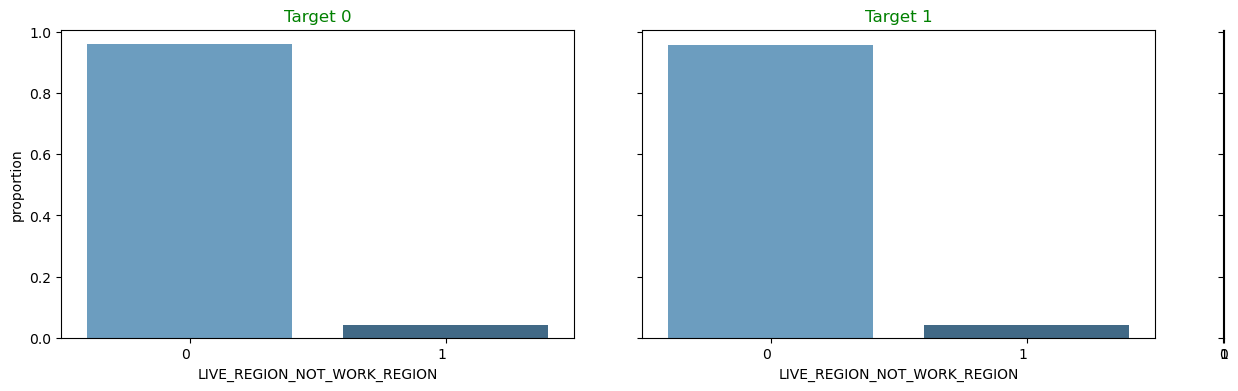

Graph for :  REG_CITY_NOT_LIVE_CITY


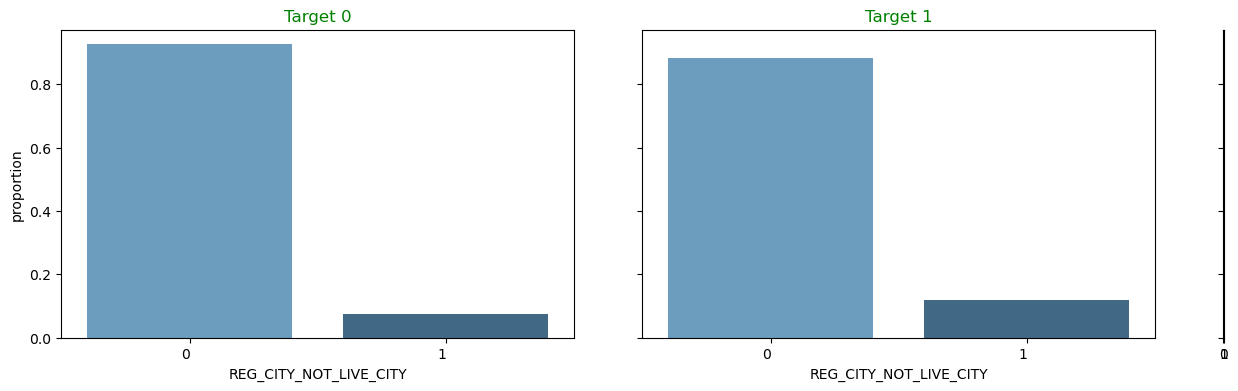

Graph for :  REG_CITY_NOT_WORK_CITY


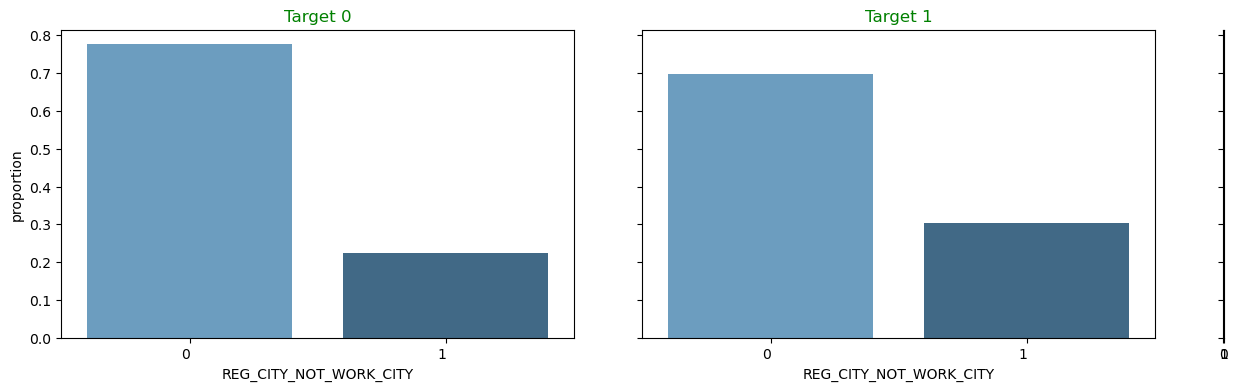

Graph for :  LIVE_CITY_NOT_WORK_CITY


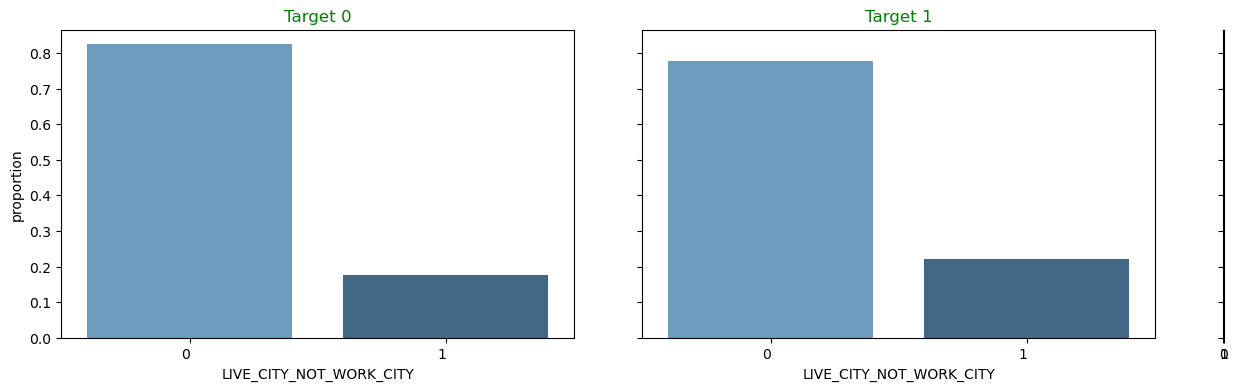

Graph for :  OWN_CAR_flag


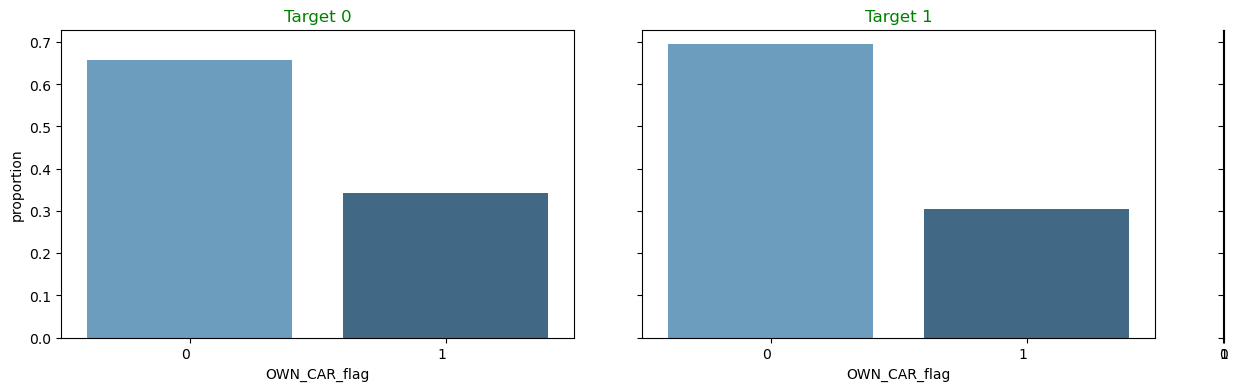

Graph for :  OWN_REALTY_flag


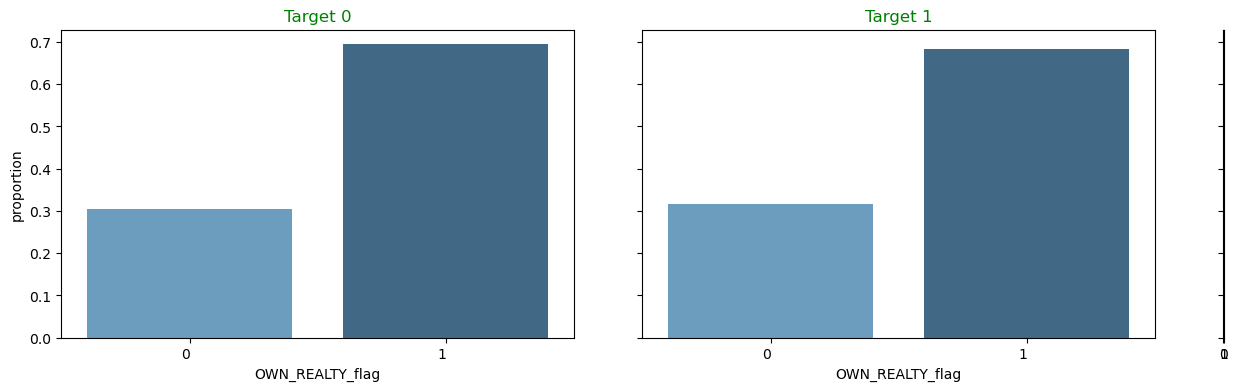

Graph for :  CODE_GENDER


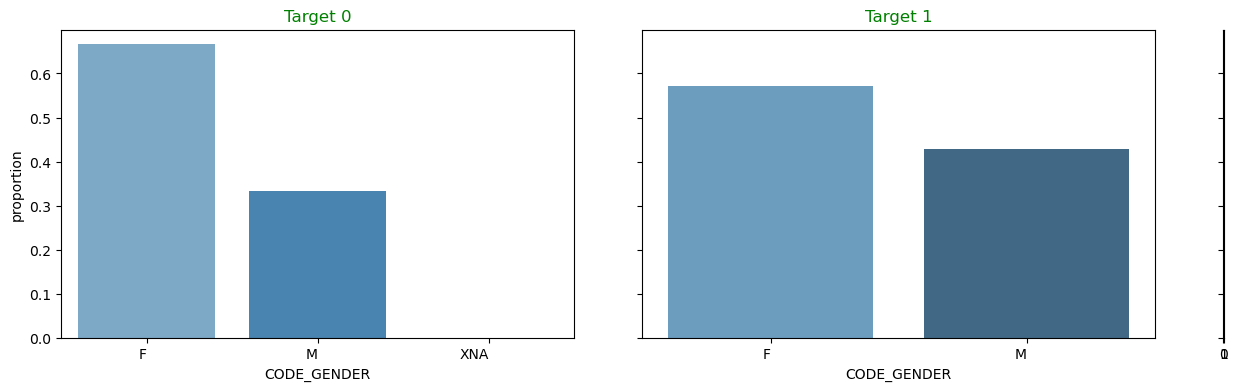

In [71]:
# for loop on all the categorical ordered columns
for i in cat_var_List:
    cat_num_0=app_target_0[i].value_counts(normalize=True)
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,4))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1,palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(), horizontalalignment='right')
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=app_target_1[i].value_counts(normalize=True)
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2,palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), horizontalalignment='right')
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

##### Key Insights
- REGION_RATING_CLIENT & REGION_RATING_CLIENT_W_CITY- Region 2 has the highest % applicants both in TARGET 0 and Target 1
- REG_REGION_NOT_LIVE_REGION, REGION_NOT_WORK_REGION, VE_REGION_NOT_WORK_REGION'- For both Target 0 and Target 1 out of Region, ie 1 is very low and does not seem to affect the default rate
- REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY - Default ratio is higher for 1, ie different from permanent address
- CODE_GENDER' - Ratio of F to M in Target 0 is 2.3 and F to M in Target 0 - 1.3. indicatign that MEN are defaulting more than Women

##### Univariate Analysis on Continuous Variables

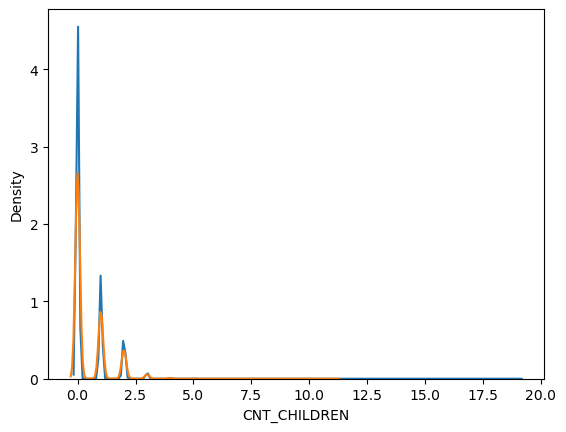

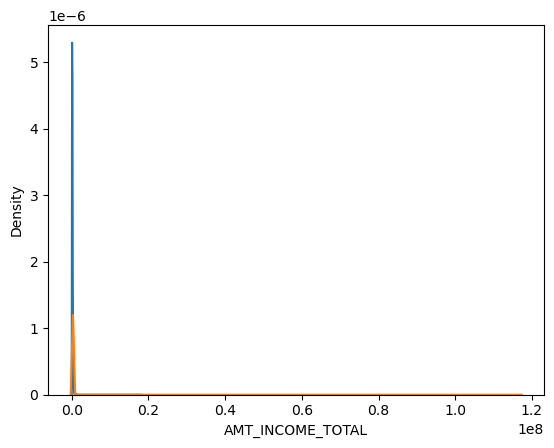

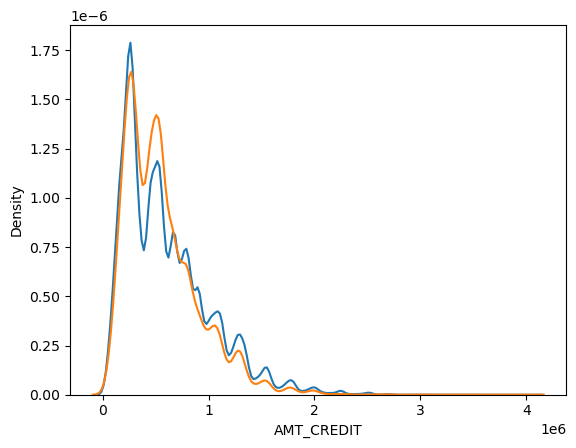

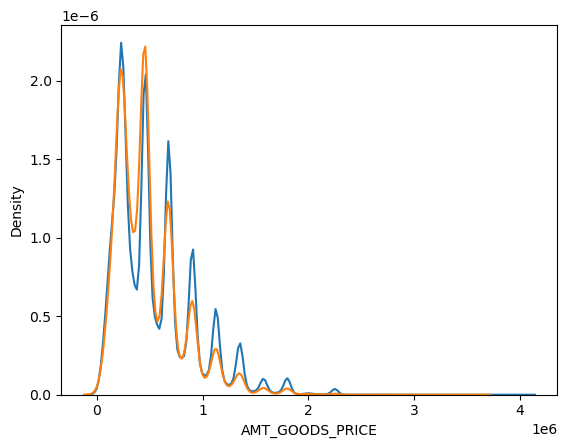

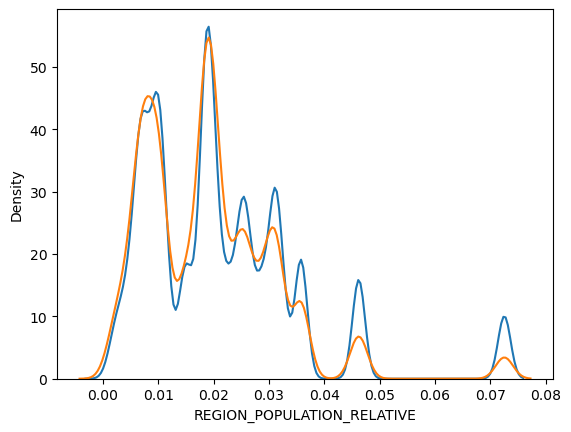

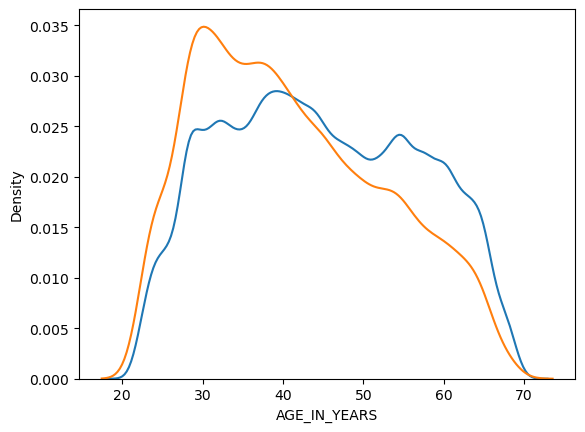

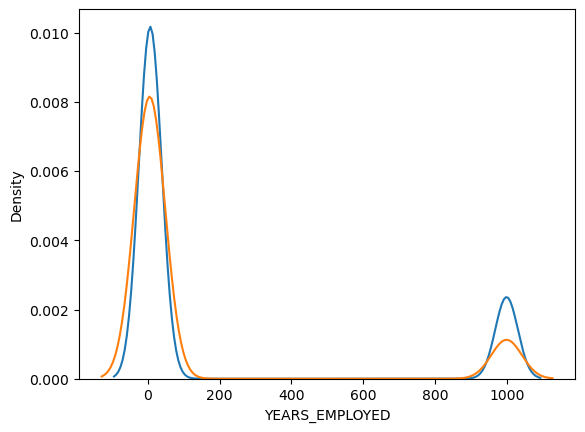

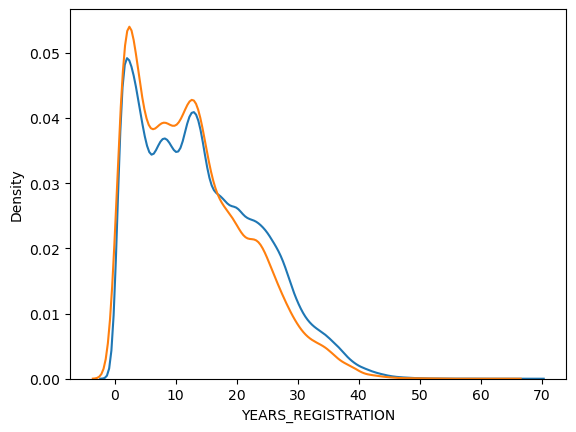

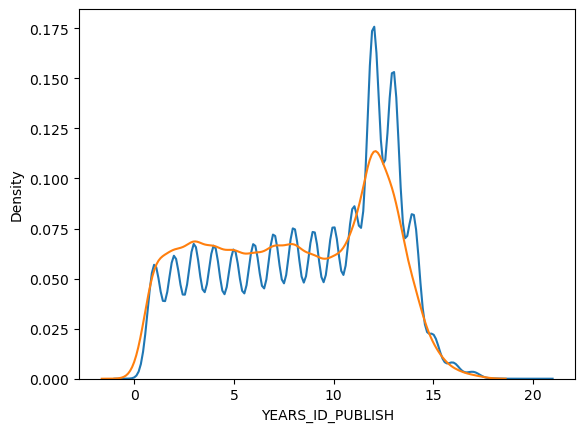

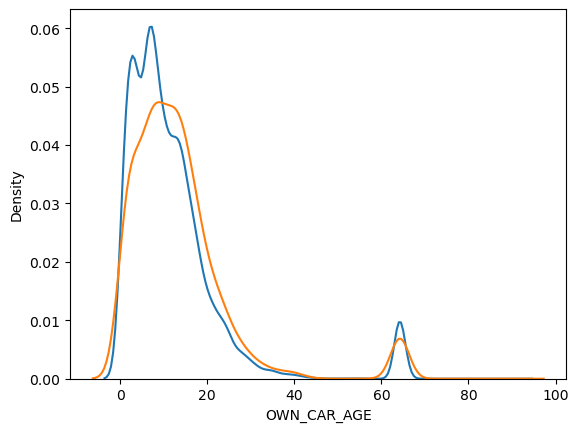

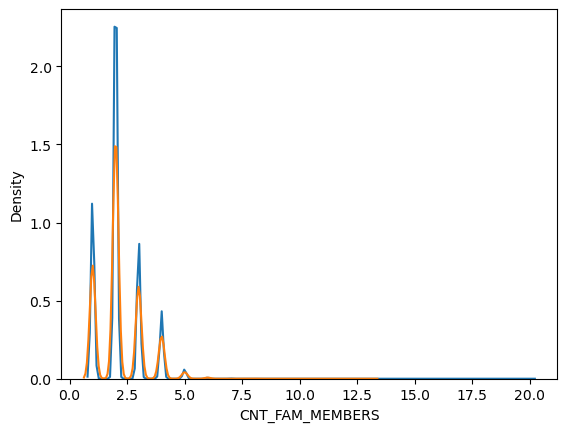

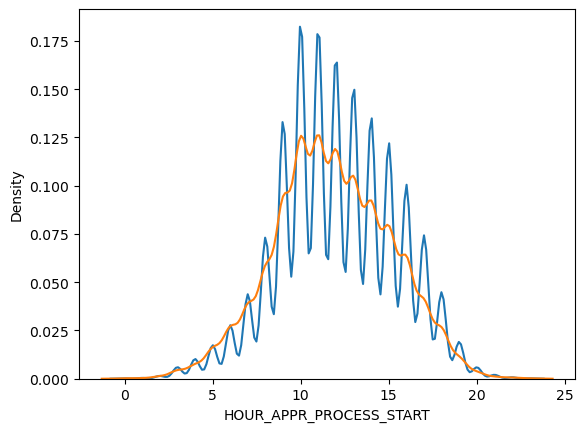

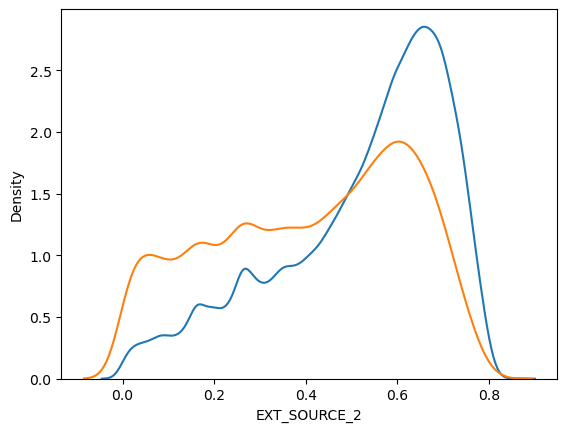

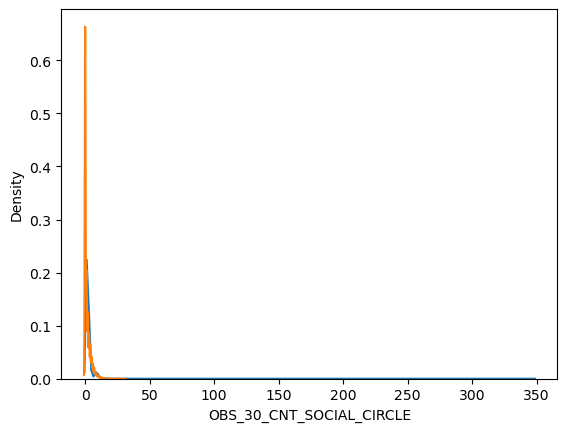

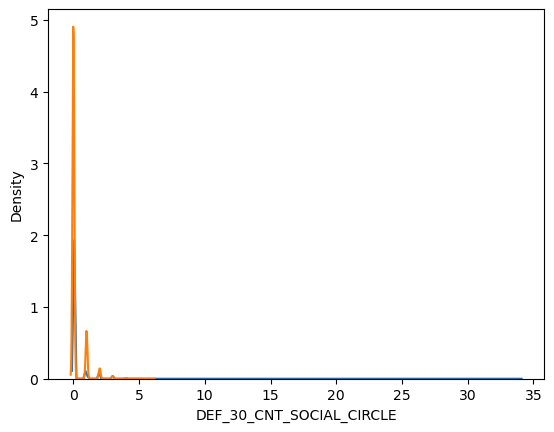

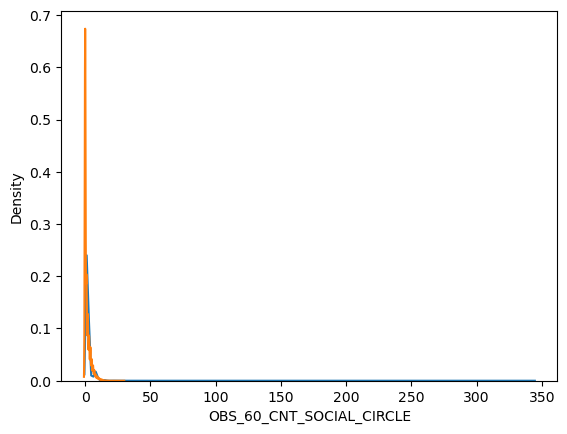

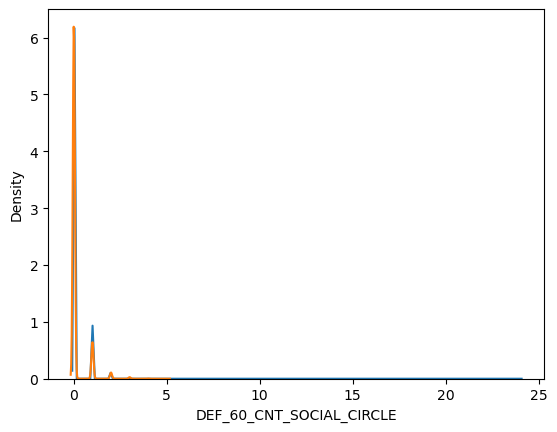

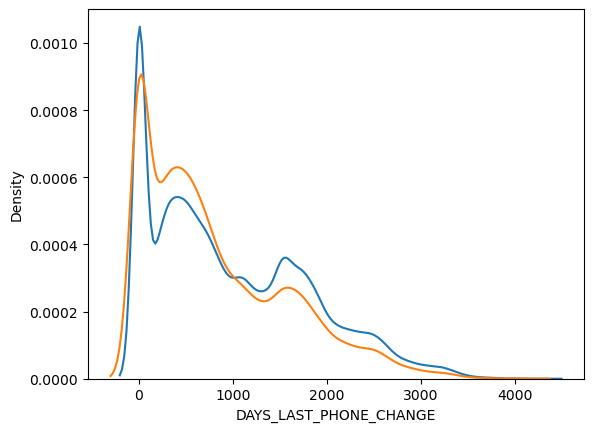

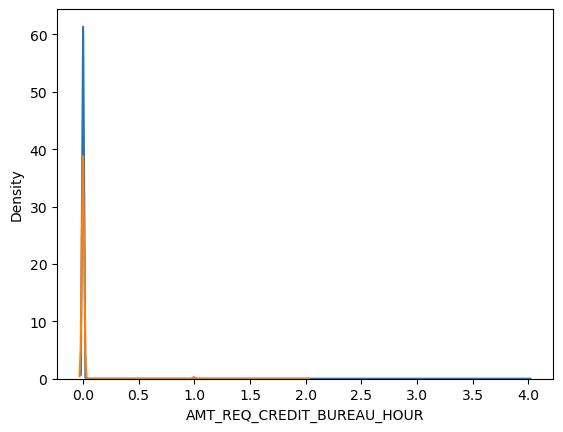

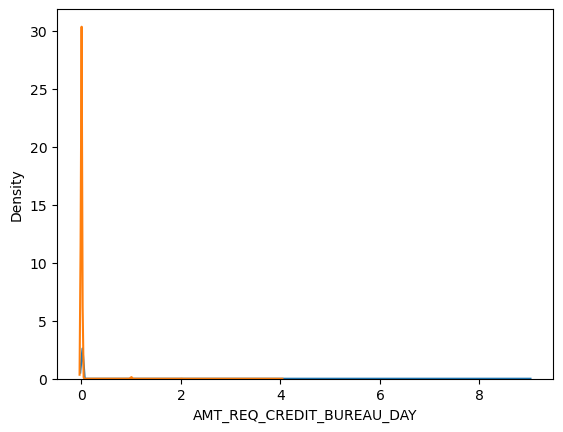

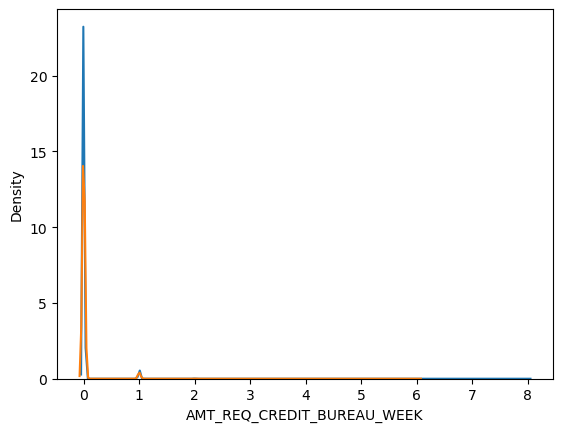

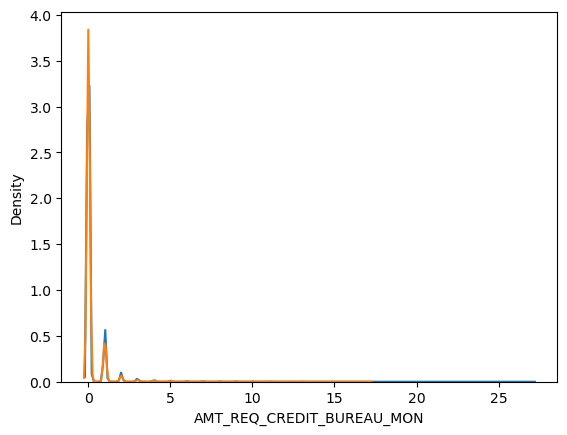

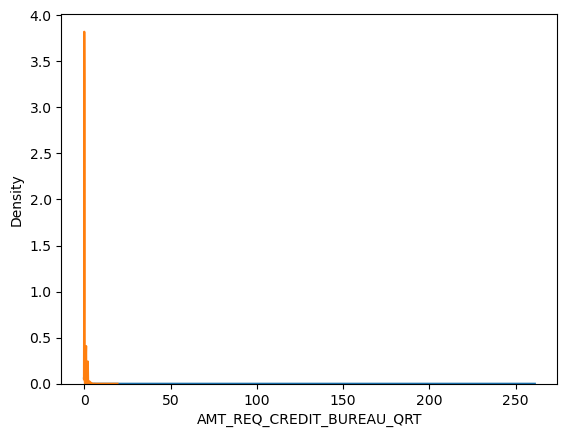

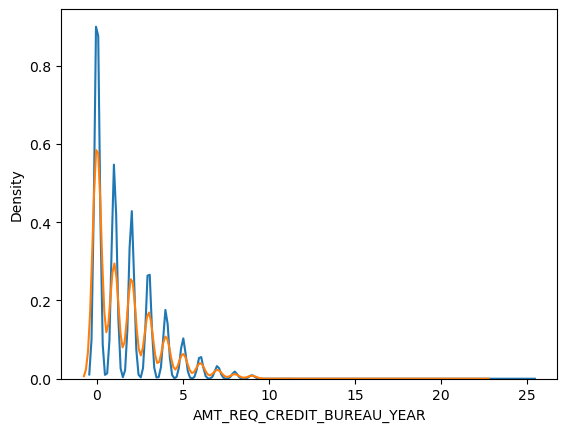

In [72]:
# Plotting distplot for the columns

for i in num_var_List:
    sns.distplot(app_target_0[i], hist = False, label = 'No Default')
    sns.distplot(app_target_1[i], hist = False, label = 'Payment difficulty')
    plt.show()

Graph for :  CNT_CHILDREN


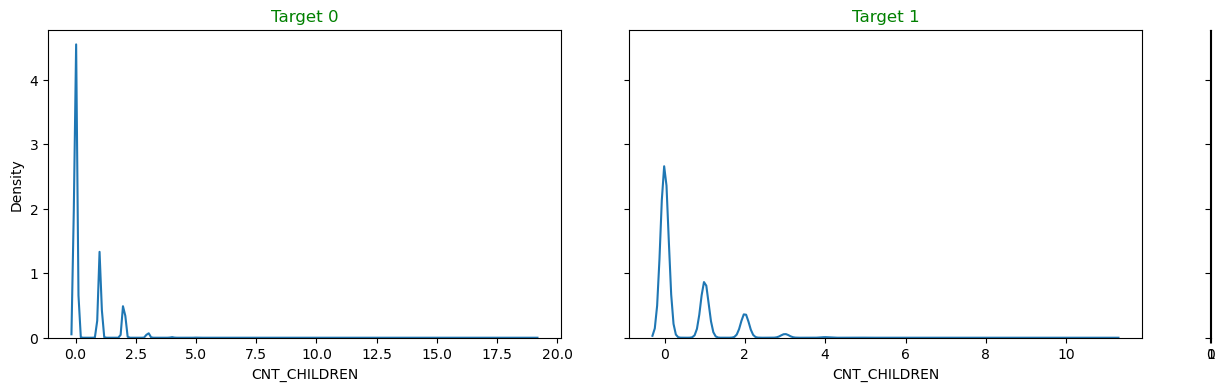

Graph for :  AMT_INCOME_TOTAL


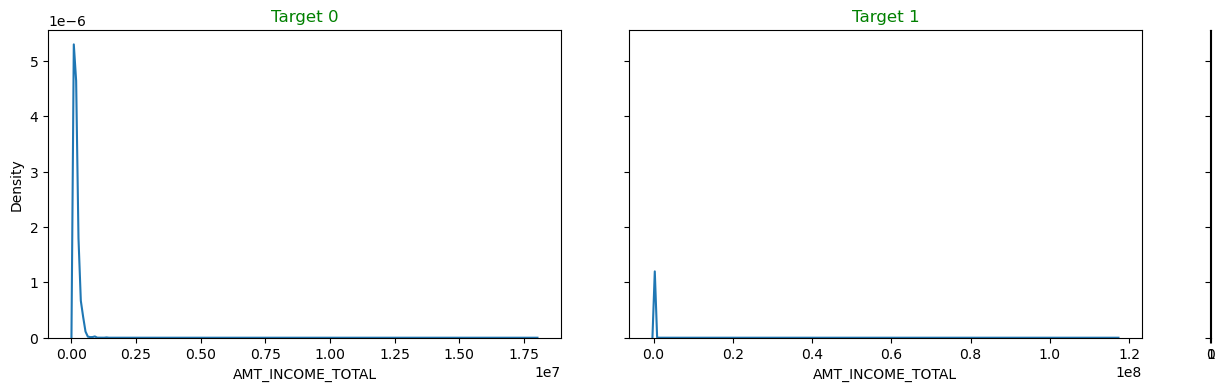

Graph for :  AMT_CREDIT


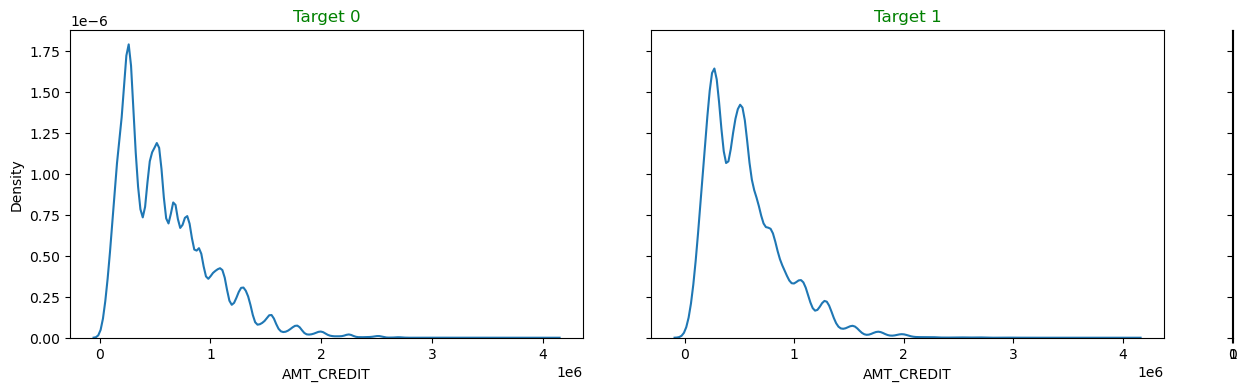

Graph for :  AMT_GOODS_PRICE


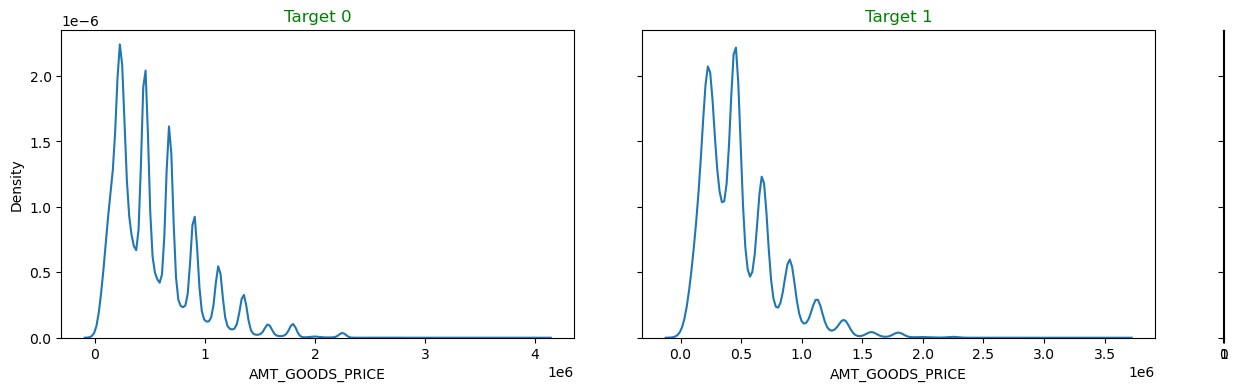

Graph for :  REGION_POPULATION_RELATIVE


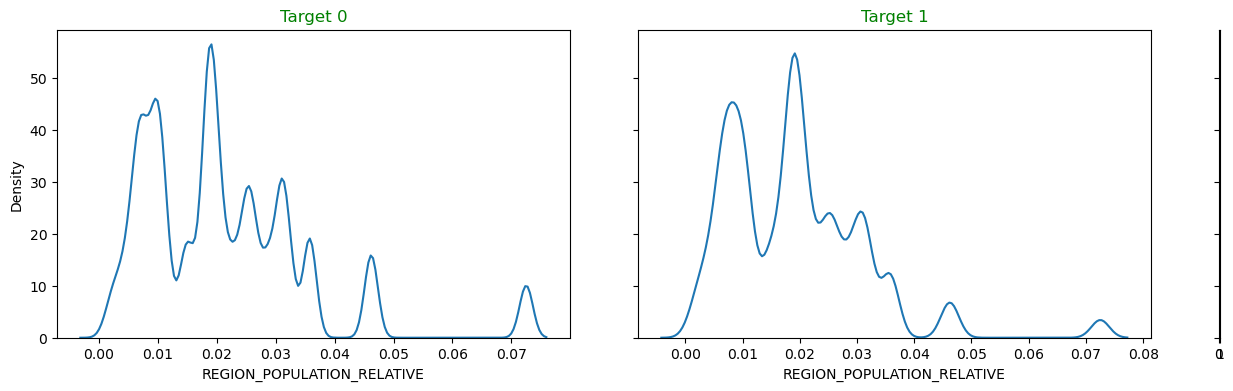

Graph for :  AGE_IN_YEARS


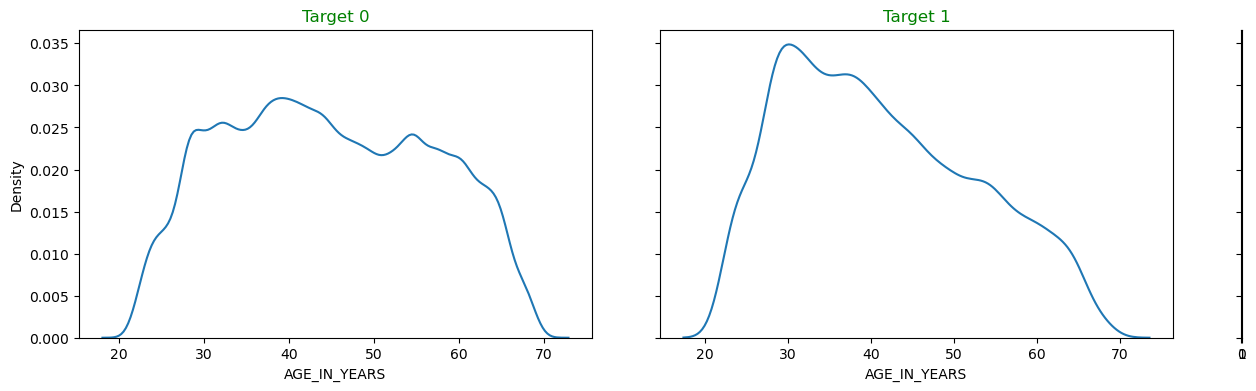

Graph for :  YEARS_EMPLOYED


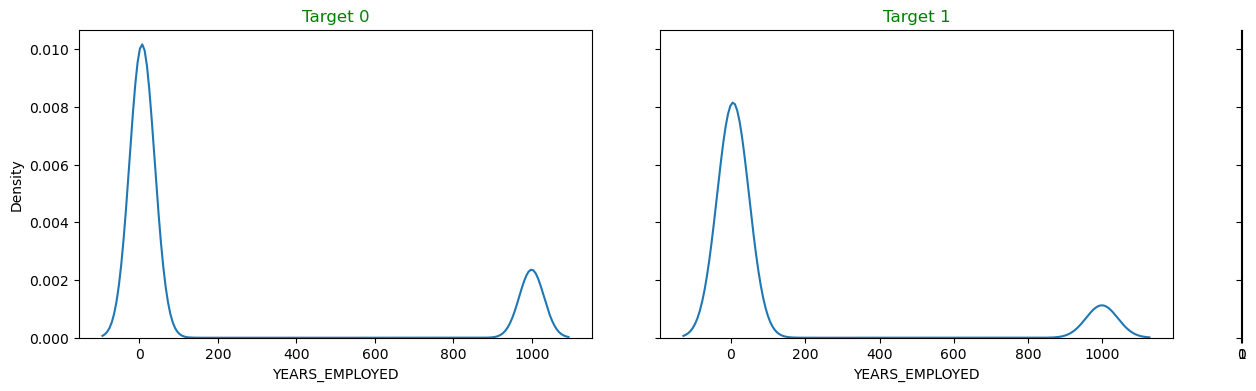

Graph for :  YEARS_REGISTRATION


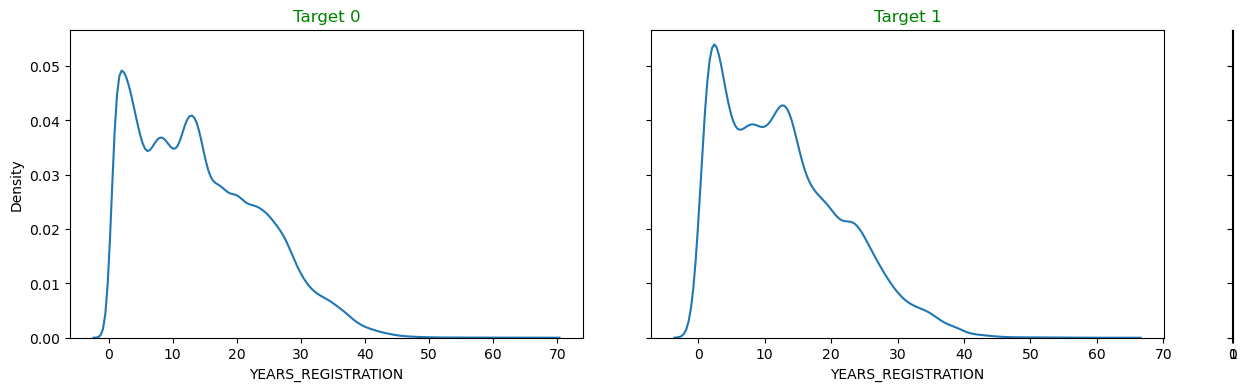

Graph for :  YEARS_ID_PUBLISH


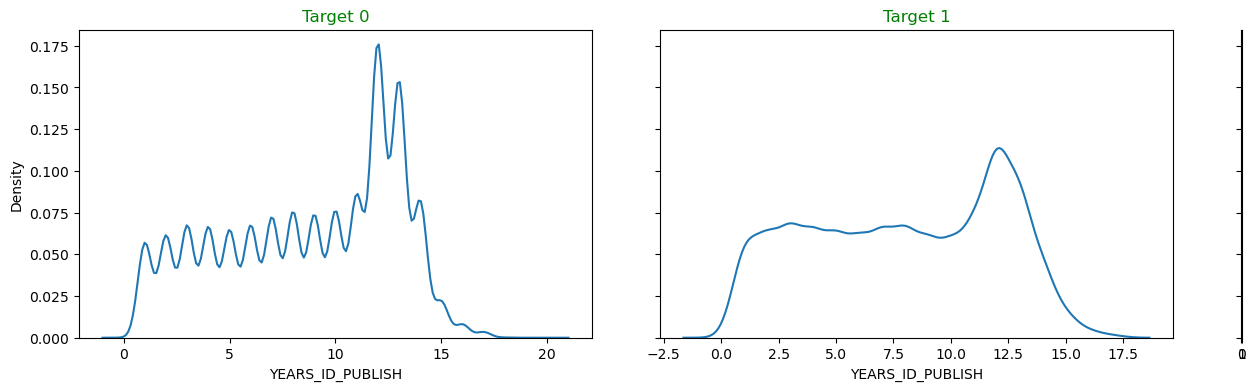

Graph for :  OWN_CAR_AGE


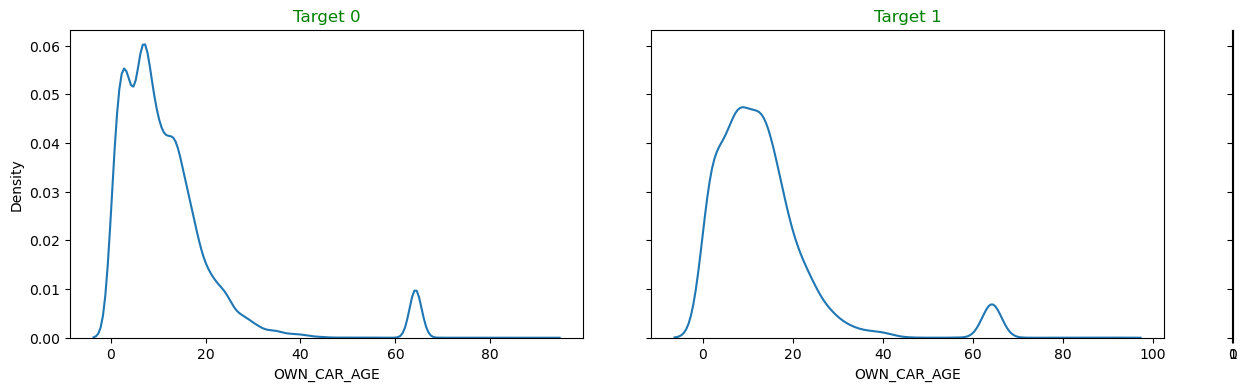

Graph for :  CNT_FAM_MEMBERS


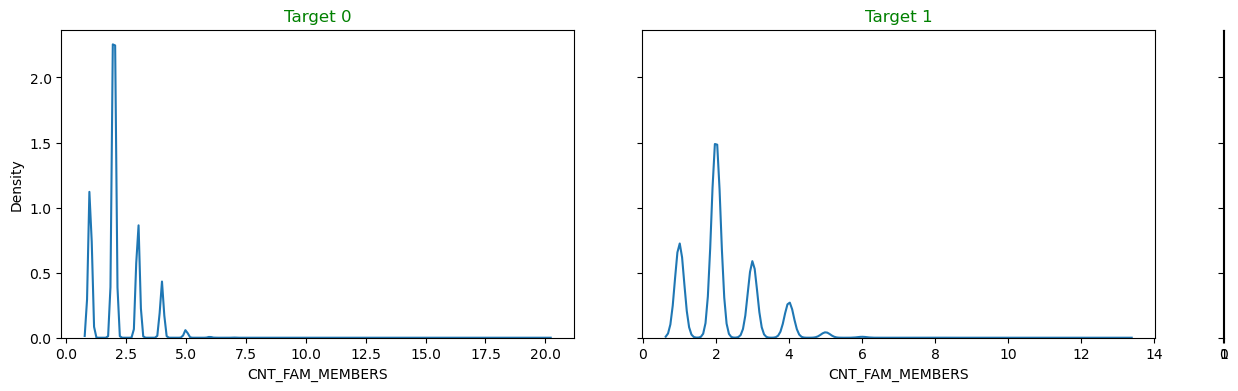

Graph for :  HOUR_APPR_PROCESS_START


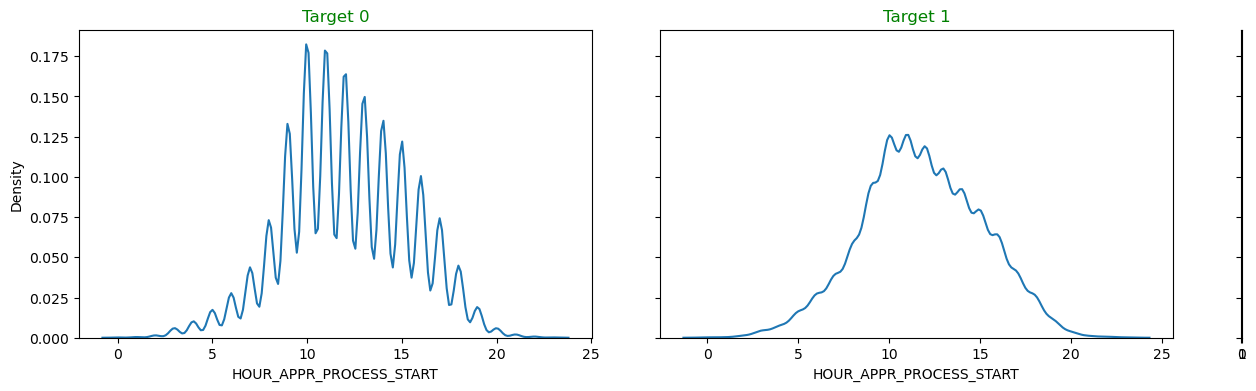

Graph for :  EXT_SOURCE_2


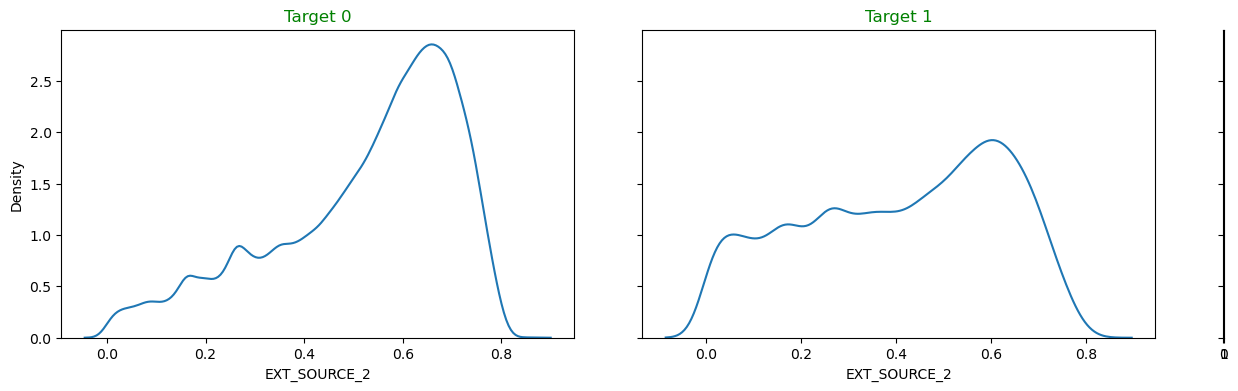

Graph for :  OBS_30_CNT_SOCIAL_CIRCLE


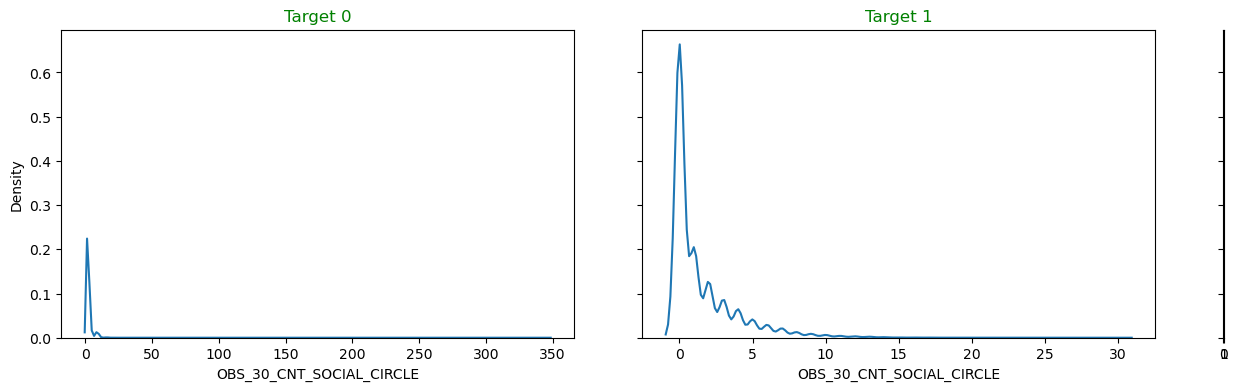

Graph for :  DEF_30_CNT_SOCIAL_CIRCLE


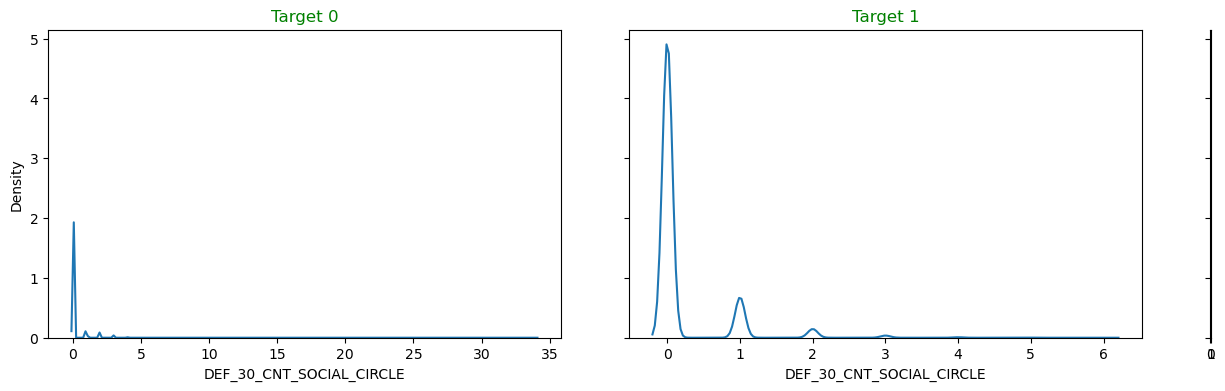

Graph for :  OBS_60_CNT_SOCIAL_CIRCLE


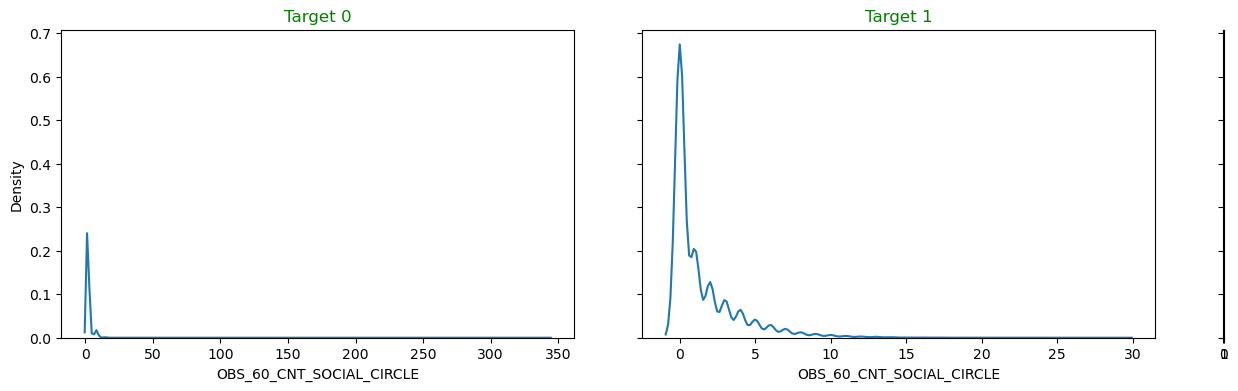

Graph for :  DEF_60_CNT_SOCIAL_CIRCLE


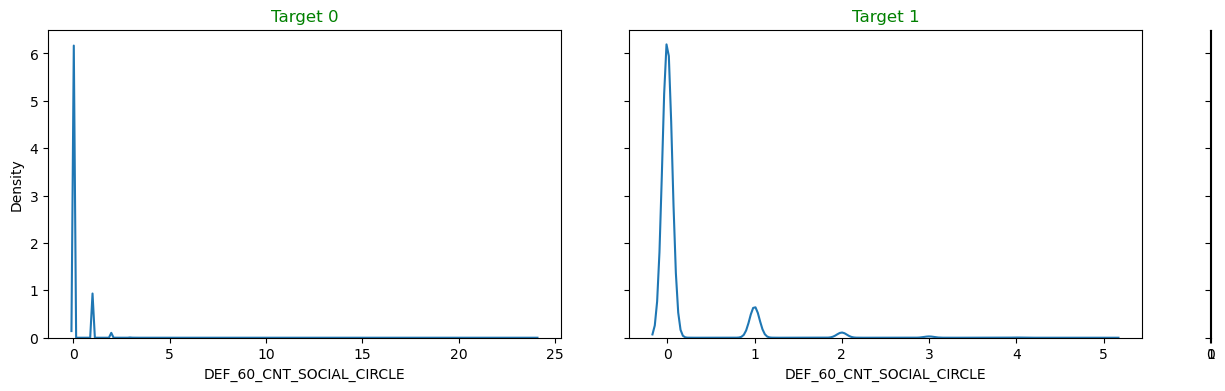

Graph for :  DAYS_LAST_PHONE_CHANGE


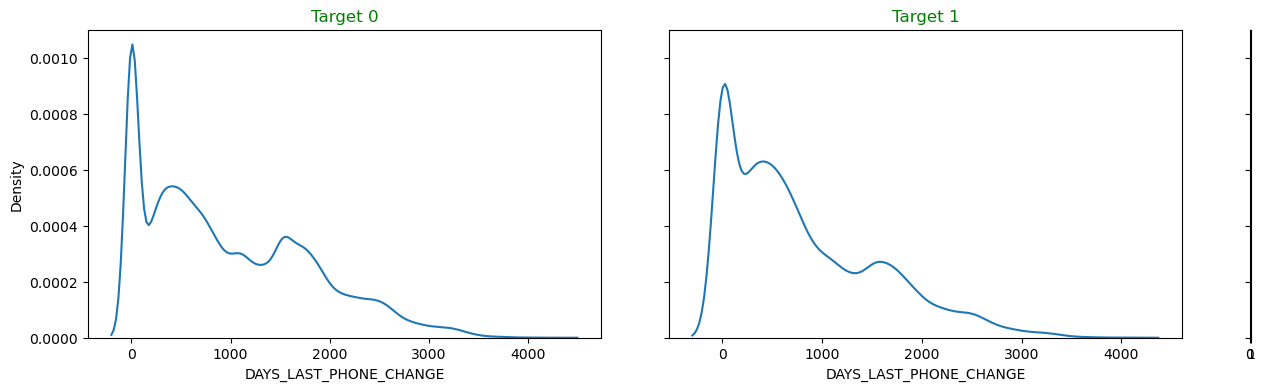

Graph for :  AMT_REQ_CREDIT_BUREAU_HOUR


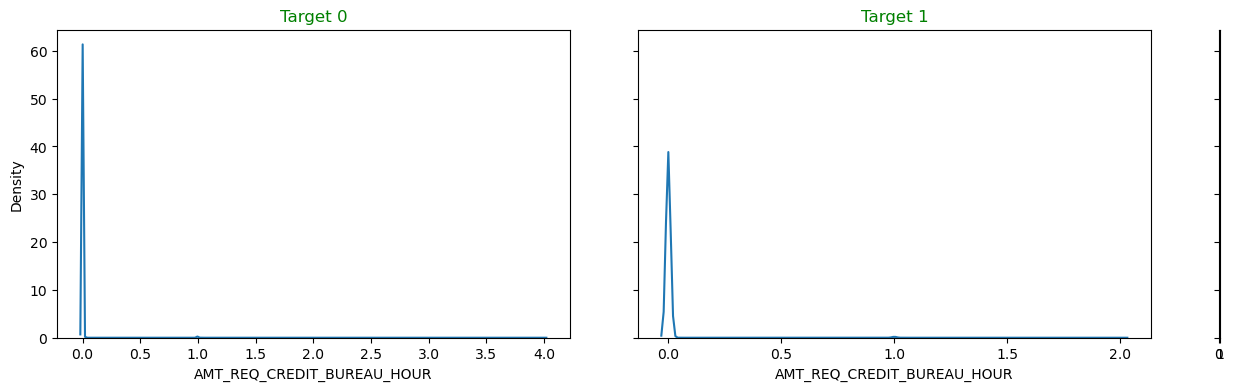

Graph for :  AMT_REQ_CREDIT_BUREAU_DAY


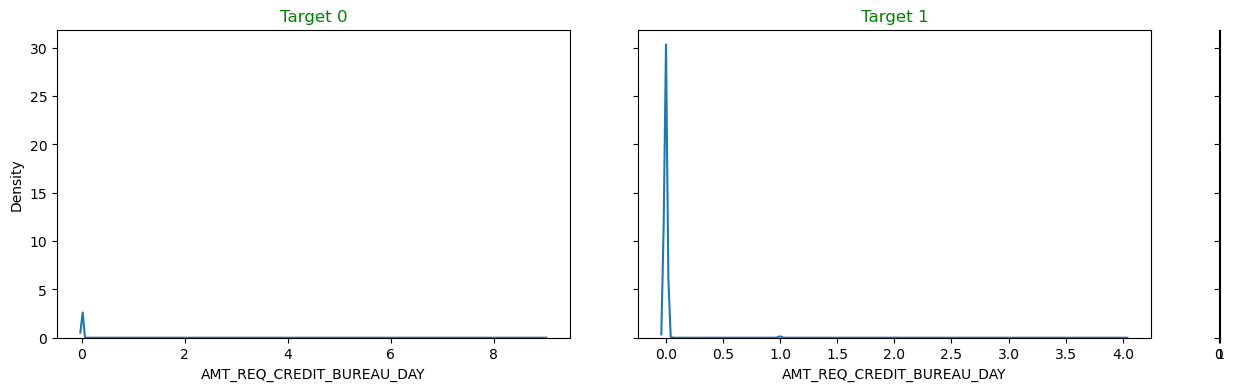

Graph for :  AMT_REQ_CREDIT_BUREAU_WEEK


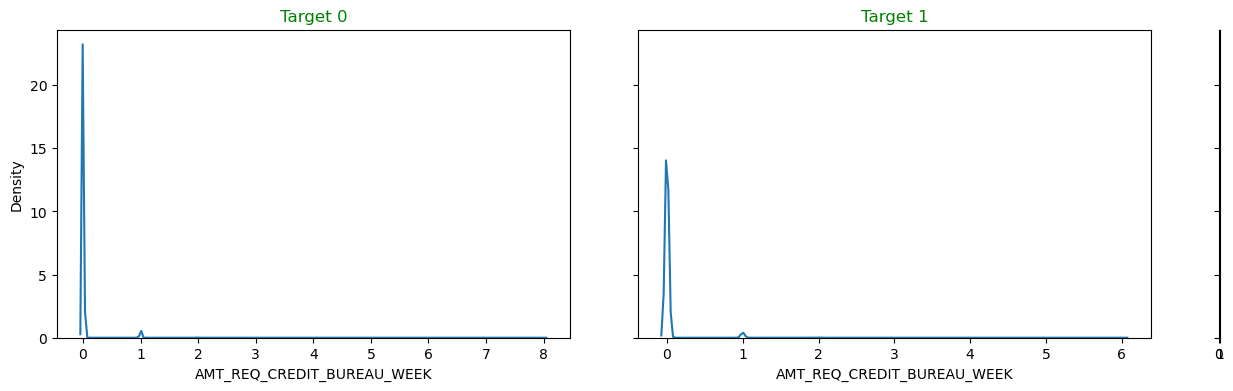

Graph for :  AMT_REQ_CREDIT_BUREAU_MON


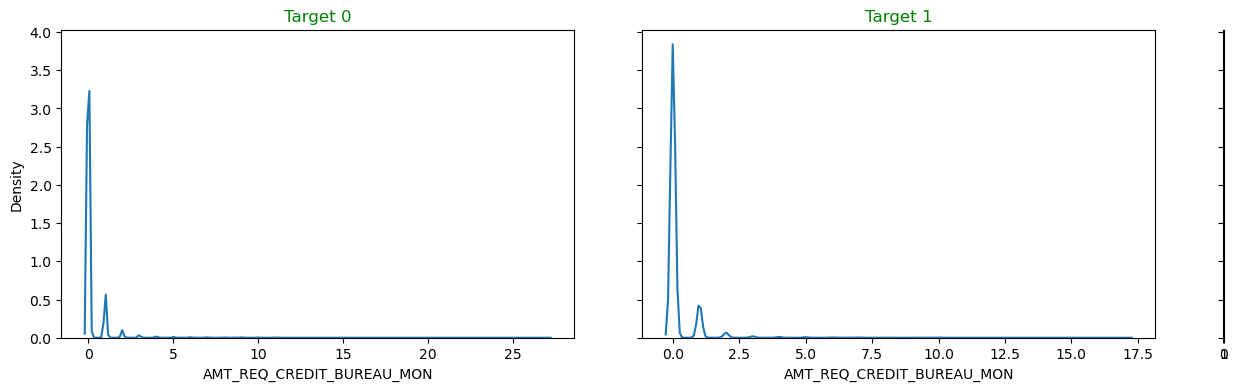

Graph for :  AMT_REQ_CREDIT_BUREAU_QRT


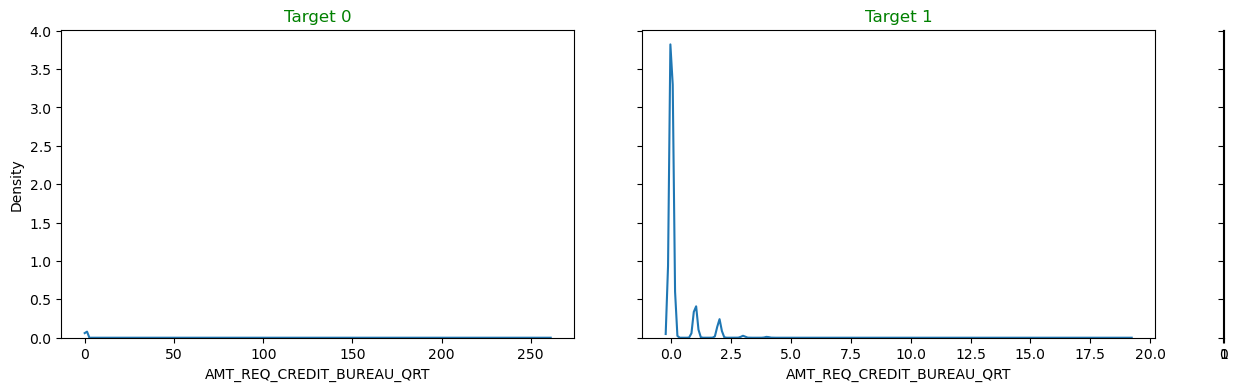

Graph for :  AMT_REQ_CREDIT_BUREAU_YEAR


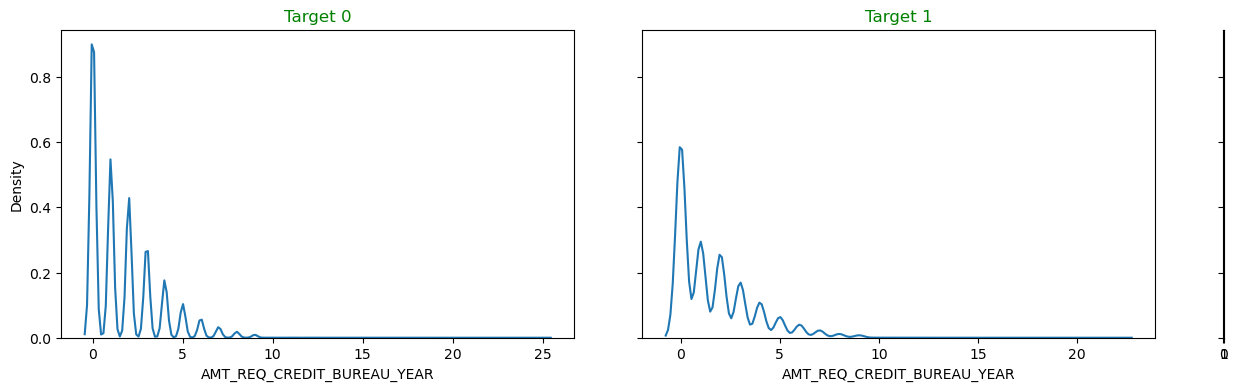

In [73]:
#Plotting in separate plots to get more CLARITY 
for i in num_var_List:
    cat_num_0=app_target_0[i].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,4))
    print("Graph for : ",i)
    chart1=sns.distplot(app_target_0[i], ax=ax1,hist = False)
    
    
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=app_target_0[i].value_counts()
    chart2=sns.distplot(a=app_target_1[i],ax=ax2,hist = False)
    
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

##### Key Insights
- AMT_CREDIT column has - Lower values for target 1 indicate reduced default risk
- AGE_IN_YEARS column has Younger applicants have a higher default rate.
- YEARS_EMPLOYED column hasThe data is inaccurate
- Lesser no of Target 1 OWN cars
- EXT_SOURCE_2 column has Target 0 has higher credit scores
- OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE - Target 1 shows higher rates of 30 and 60-day payment delays.
- DAYS_LAST_PHONE_CHANGE column has- Target 1 individuals have a higher frequency of recent phone number changes.
- AMT_REQ_CREDIT_BUREAU_YEAR, Target 1 applicants have a higher frequency of multiple loan applications.mpanies

Graph for :  Age_grp


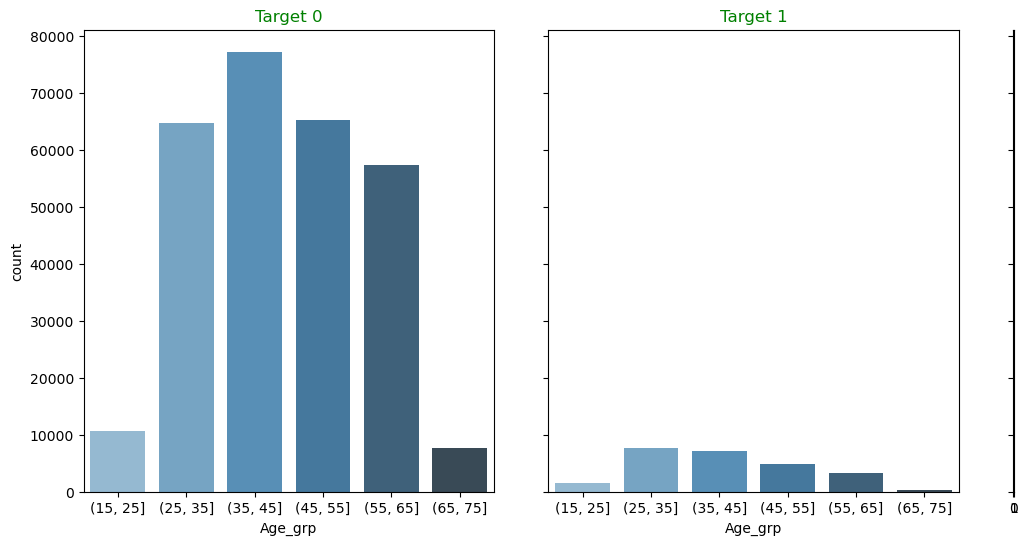

Graph for :  Income_grp


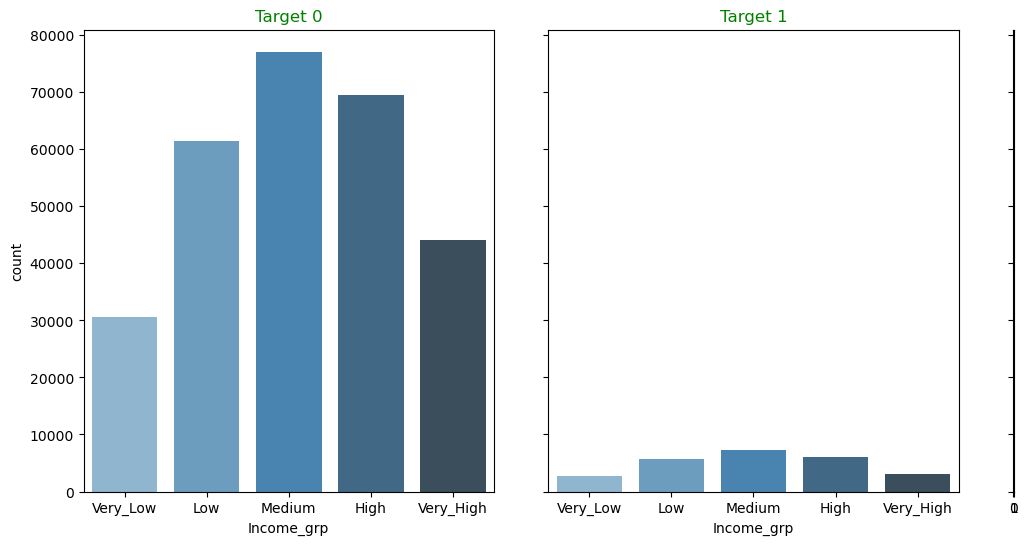

In [74]:
#Plotting barplots for Age_grp and Income_grp columns

binList=["Age_grp", "Income_grp"]
for i in binList:

    cat_num_0=app_target_0[i].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(12,6))
    print("Graph for : ",i)
    chart1=sns.barplot(x=cat_num_0.index, y=cat_num_0, ax=ax1, palette="Blues_d")
    chart1.set_xticklabels(chart1.get_xticklabels(), horizontalalignment='center')
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Green')
    cat_num_1=app_target_1[i].value_counts()
    chart2=sns.barplot(x=cat_num_1.index, y=cat_num_1,ax=ax2, palette="Blues_d")
    chart2.set_xticklabels(chart2.get_xticklabels(), horizontalalignment='center')
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

##### Key Insights
- While older applicants (35-45) are more prevalent in the lower-risk target 0 group, younger applicants (25-35) are overrepresented in the higher-risk target 1 group, suggesting a potential correlation between age and default risk.
- The data reveals that the majority of loan applications, both for low-risk (target 0) and high-risk (target 1) profiles, originate from individuals with medium income levels.

### Bivariate Analysis

##### Categorical and Continuous Variable

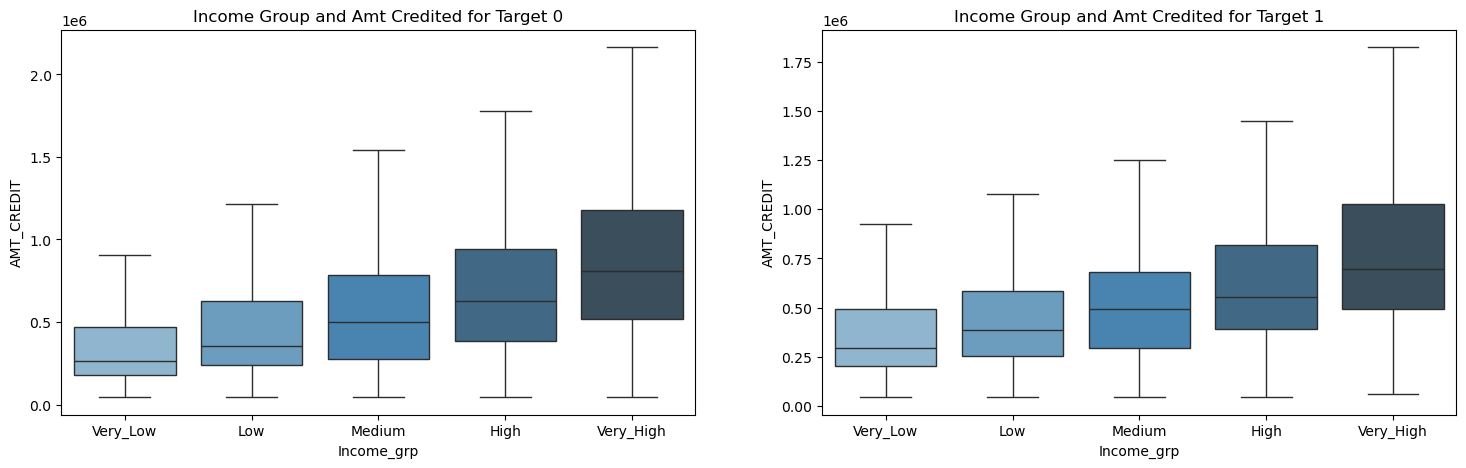

In [75]:
# Checking Income_grp vs AMT_CREDIT for both data frames by plotting boxplots

plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.title("Income Group and Amt Credited for Target 0")
sns.boxplot(x = 'Income_grp', y = 'AMT_CREDIT', data =app_target_0, showfliers=False, palette="Blues_d")

plt.subplot(1,2,2)
plt.title("Income Group and Amt Credited for Target 1")
sns.boxplot(x = 'Income_grp', y = 'AMT_CREDIT', data = app_target_1, showfliers=False, palette="Blues_d")
plt.show()

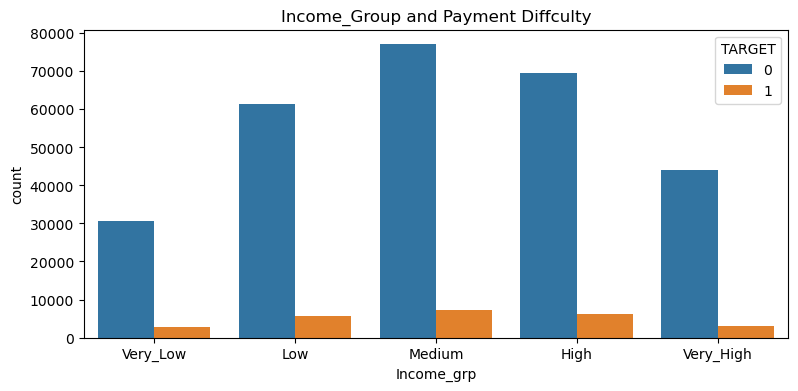

In [76]:
#Checking the Income_grp vs AMT_CREDIT for both data frames to see the affect of Very High Income group by plotting countplot
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Income_Group and Payment Diffculty")
sns.countplot(x = 'Income_grp', hue = 'TARGET', data =app_df)
plt.show()

In [77]:
#Checking absolute values by plotting pivot table 
res=pd.pivot_table(data=app_df, index='Income_grp',columns='TARGET',values='AMT_CREDIT', aggfunc="mean")
round(res,2)

TARGET              0          1
Income_grp                      
Very_Low    347868.46  373460.40
Low         456525.23  451343.70
Medium      568861.72  542580.16
High        699628.82  643297.93
Very_High   890186.33  786021.83

##### Key Insights
- "Despite the lower volume of loans extended to high-income groups, the potential financial impact of defaults from this segment can be significant due to the larger loan sizes involved.
- To minimize the risk associated with high-income loans, the company should adopt a more cautious approach, including rigorous credit assessment and potentially higher interest rates or stricter repayment terms.

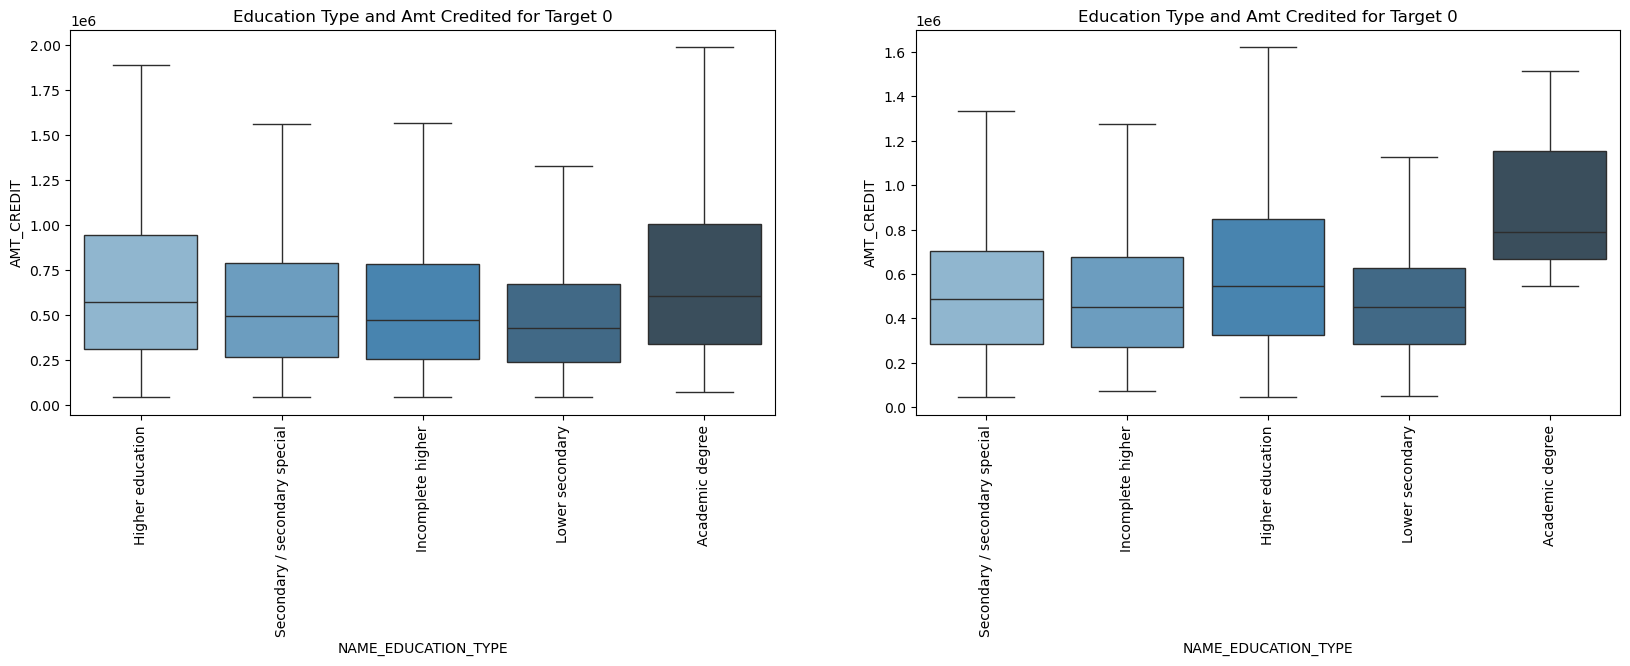

In [78]:
# Checking NAME_EDUCATION_TYPE and AMT_CREDIT columns for both data frames by plotting boxplots
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Education Type and Amt Credited for Target 0")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data =app_target_0,showfliers=False, palette="Blues_d")
plt.xticks(rotation=90, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Education Type and Amt Credited for Target 0")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = app_target_1,showfliers=False, palette="Blues_d")
plt.xticks(rotation=90, fontsize= 10,fontweight= 2)
plt.show()

##### Key Insights
- Despite their relatively low numbers, academic degree holders who default on their loans tend to have larger loan balances. This highlights the importance of careful credit assessment and risk management for this specific segment. 

In [79]:
# Checking relationship of AMT_CREDIT with Gender and Income type for Target 0 variable by plotting pivot table.


res=pd.pivot_table(data=app_target_0, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res,0)

CODE_GENDER                   F          M       XNA
NAME_INCOME_TYPE                                    
Businessman           1125000.0  1272857.0       NaN
Commercial associate   668844.0   685304.0  540000.0
Maternity leave        562500.0   765000.0       NaN
Pensioner              535162.0   571540.0       NaN
State servant          665132.0   695357.0       NaN
Student                372556.0   598753.0       NaN
Unemployed             787909.0  1045500.0       NaN
Working                577846.0   587183.0  352500.0

In [80]:
# Checking  relationship of AMT_CREDIT with Gender and Income type for Target 1 by plotting pivot table

res1=pd.pivot_table(data=app_target_1, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res1,0)

CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Commercial associate  613418.0  599682.0
Maternity leave       929250.0       NaN
Pensioner             558498.0  556645.0
State servant         614062.0  616407.0
Unemployed            653250.0  546750.0
Working               537035.0  533821.0

Female on Maternity leave and unmployed, Females and males are defaulting larger loan values credited to them.

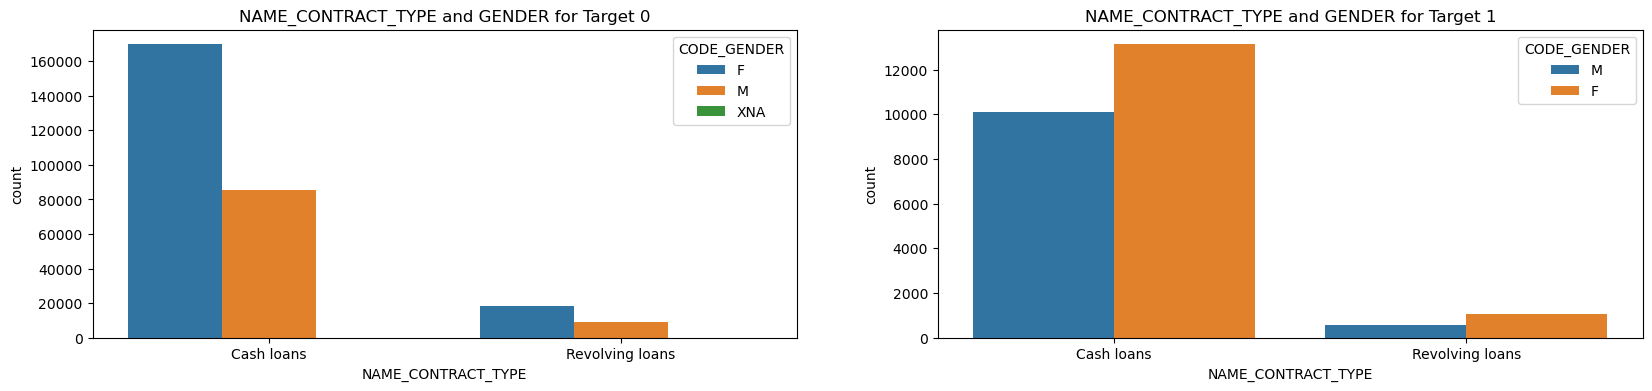

In [81]:
# Checking NAME_CONTRACT_TYPE and CODE_GENDER columns for both data frames by plotting countplot.
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and GENDER for Target 0")

sns.countplot(x='NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', data =app_target_0)

plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and GENDER for Target 1")
sns.countplot(x ='NAME_CONTRACT_TYPE', hue = 'CODE_GENDER', data =app_target_1)

plt.show()

##### Key Insights
- The data indicates a higher proportion of female applicants compared to male applicants.
- Male applicants have a higher default rate, despite being a smaller group.

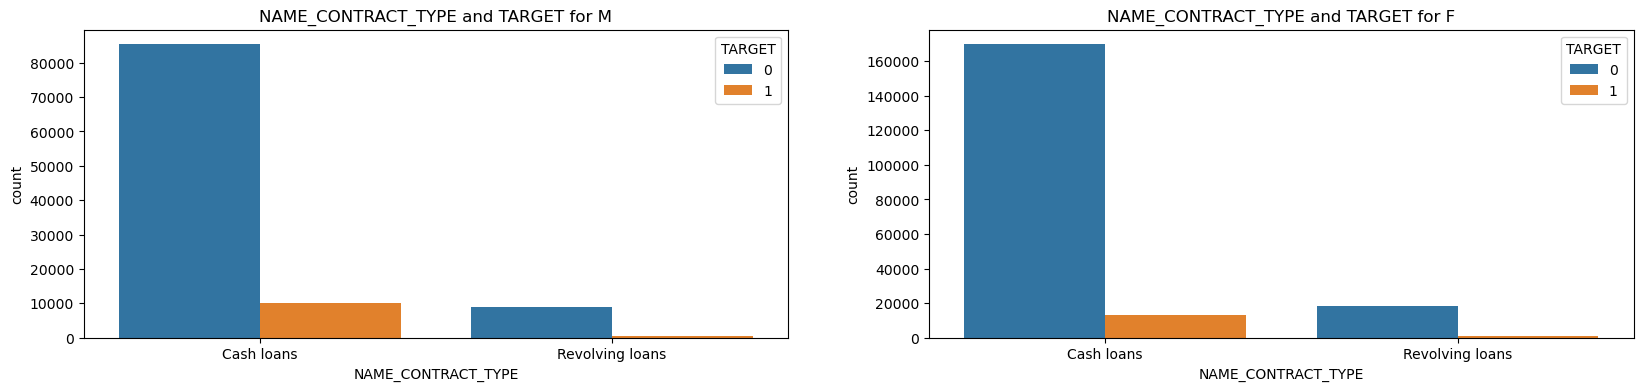

In [82]:
# Checking NAME_CONTRACT_TYPE and CODE_GENDER columns for male and female individually by plotting countplot
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and TARGET for M")

sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = "TARGET", data=app_df[(app_df['CODE_GENDER']=="M")])

plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and TARGET for F")
sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = "TARGET", data=app_df[(app_df['CODE_GENDER']=="F")])

plt.show()

The data indicates that male applicants are more likely to default on their loans compared to female applicants.

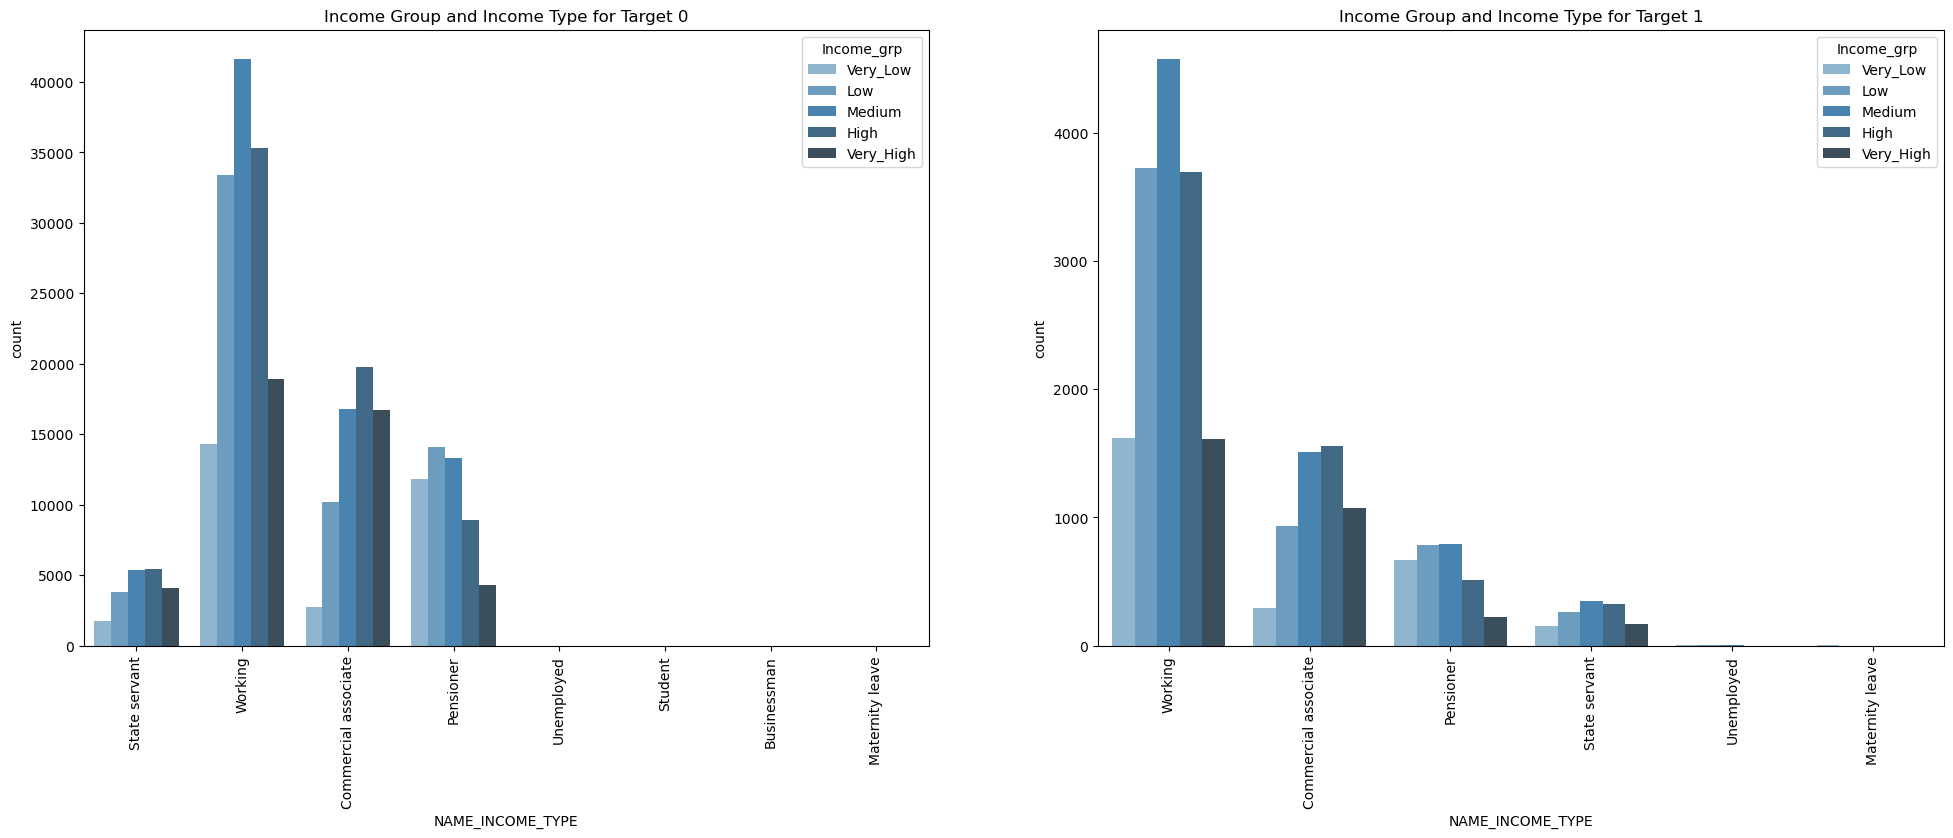

In [83]:
# Checking NAME_INCOME_TYPE and Income_grp columns for both data frames by plotting countplot.
plt.figure(figsize = (24,8))
plt.subplot(1,2,1)
plt.title("Income Group and Income Type for Target 0")
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'Income_grp', data =app_target_0, palette="Blues_d")
plt.xticks(rotation=90, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Income Group and Income Type for Target 1")
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'Income_grp', data =app_target_1, palette="Blues_d")
plt.xticks(rotation=90, fontsize= 10,fontweight= 2)

plt.show()

The data reveals that medium-income individuals have a higher likelihood of defaulting on their loans, exceeding the overall default rate. This highlights the importance of assessing the specific financial circumstances and risk profiles of borrowers within this income group.

In [84]:
# Checking  relationship of NAME_INCOME_TYPE with CODE_GENDER and AMT_CREDIT type for Target 0

res=pd.pivot_table(data=app_target_0, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res,0)


CODE_GENDER                   F          M       XNA
NAME_INCOME_TYPE                                    
Businessman           1125000.0  1272857.0       NaN
Commercial associate   668844.0   685304.0  540000.0
Maternity leave        562500.0   765000.0       NaN
Pensioner              535162.0   571540.0       NaN
State servant          665132.0   695357.0       NaN
Student                372556.0   598753.0       NaN
Unemployed             787909.0  1045500.0       NaN
Working                577846.0   587183.0  352500.0

In [85]:
# Checking  relationship of NAME_INCOME_TYPE with CODE_GENDER and AMT_CREDIT type for Target 1

res=pd.pivot_table(data=app_target_1, index="NAME_INCOME_TYPE",columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
round(res,0)


CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Commercial associate  613418.0  599682.0
Maternity leave       929250.0       NaN
Pensioner             558498.0  556645.0
State servant         614062.0  616407.0
Unemployed            653250.0  546750.0
Working               537035.0  533821.0

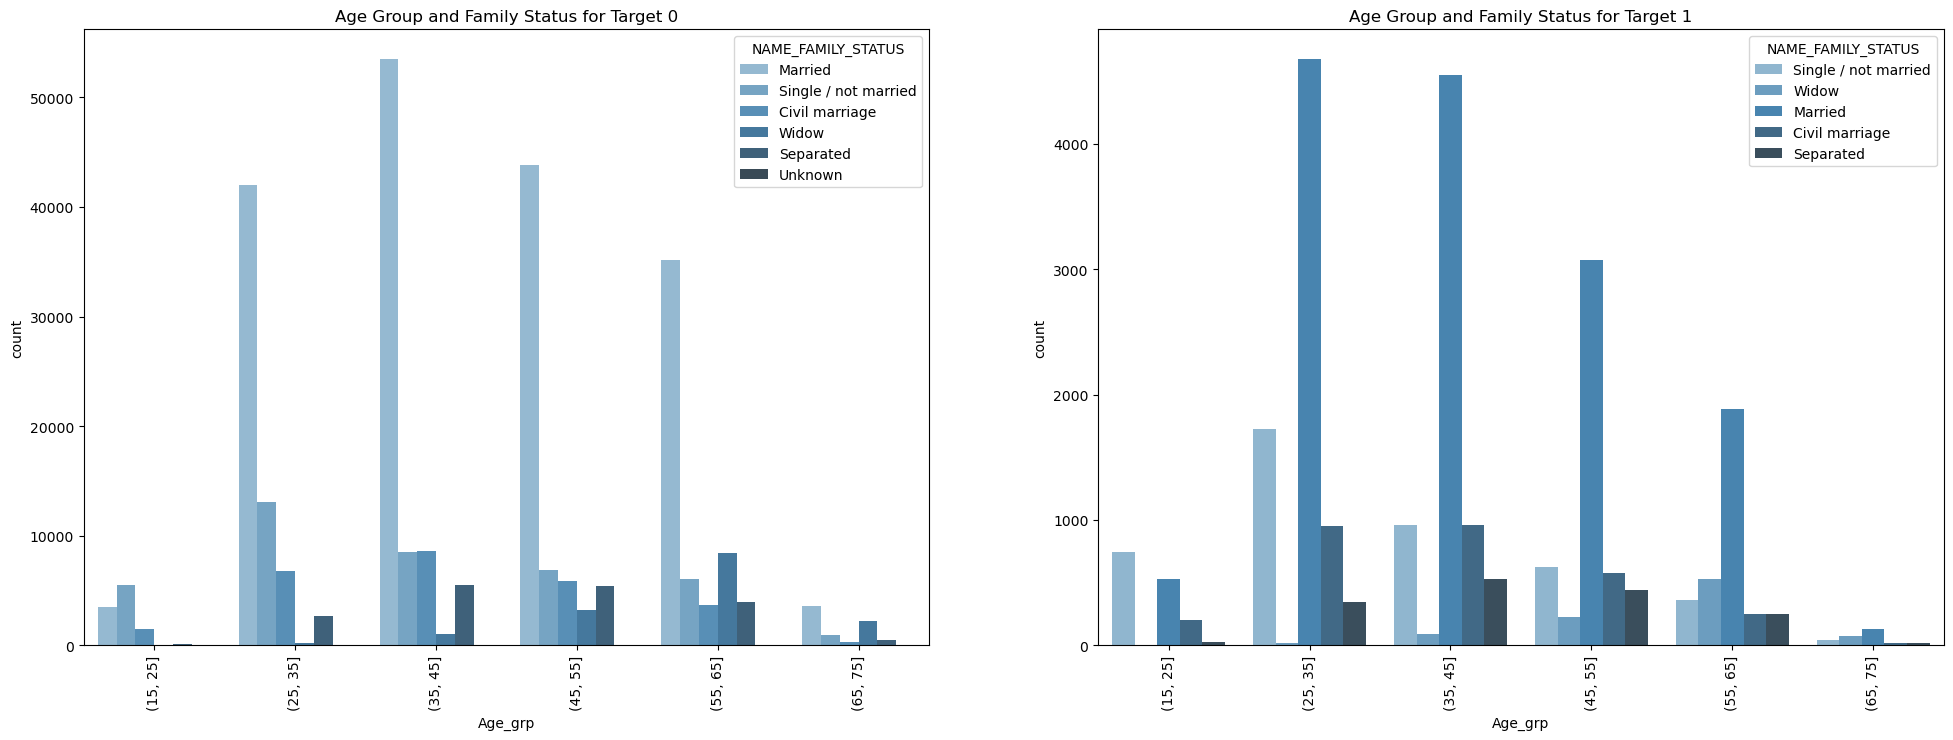

In [86]:
# Checking Age_grp and NAME_FAMILY_STATUS columns for both data frames by plotting countplot.
plt.figure(figsize = (24,8))
plt.subplot(1,2,1)
plt.title("Age Group and Family Status for Target 0")
sns.countplot(x = 'Age_grp', hue ='NAME_FAMILY_STATUS' , data =app_target_0, palette="Blues_d")
plt.xticks(rotation=90, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Age Group and Family Status for Target 1")
sns.countplot(x = 'Age_grp', hue ='NAME_FAMILY_STATUS' , data =app_target_1, palette="Blues_d")
plt.xticks(rotation=90, fontsize= 10,fontweight= 2)

plt.show()

Married individuals in the age range of 25-45 are more likely to experience payment difficulties, indicating a potential correlation between marital status, age, and default risk.

### Top Correlations

In [87]:
def calculate_correlation_matrix(app_df):
    """Calculates the correlation matrix for a DataFrame, handling potential errors.

    Args:
        df: The DataFrame to analyze.

    Returns:
        The correlation matrix.
    """

    # Select only numerical columns
    numerical_cols = app_df.select_dtypes(include=np.number).columns

    # Create a new DataFrame with only numerical columns
    numerical_df = app_df[numerical_cols]

    # Calculate the correlation matrix
    correlation_matrix = numerical_df.corr().abs()

    return correlation_matrix

target_corr_0 = app_target_0.drop(cat_var_List, axis=1)
correlation_cat_0=calculate_correlation_matrix(target_corr_0)





In [88]:
# Correlation for target 0 
corr_df = correlation_cat_0.where(np.triu(np.ones(correlation_cat_0.shape), k=1).astype(bool)).unstack().reset_index()
corr_df.columns = ['Column1', 'Column2', 'Correlation']
corr_df.dropna(subset=['Correlation'], inplace=True)
corr_df = corr_df.sort_values(by=['Correlation'], ascending=False)
corr_df.head(10)

Column1                   Column2  Correlation
457  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998508
134           AMT_GOODS_PRICE                AMT_CREDIT     0.986966
314           CNT_FAM_MEMBERS              CNT_CHILDREN     0.878571
484  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.859332
215            YEARS_EMPLOYED              AGE_IN_YEARS     0.626062
133           AMT_GOODS_PRICE          AMT_INCOME_TOTAL     0.349473
107                AMT_CREDIT          AMT_INCOME_TOTAL     0.342799
184              AGE_IN_YEARS              CNT_CHILDREN     0.336905
241        YEARS_REGISTRATION              AGE_IN_YEARS     0.332904
458  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.331336

In [89]:
# Correlation for target 1 
target_corr_1=app_target_1.drop(cat_var_List, axis=1)
correlation_cat_1=calculate_correlation_matrix(target_corr_1)
corr_df1 = correlation_cat_1.where(np.triu(np.ones(correlation_cat_1.shape),k=1).astype(bool)).unstack().reset_index()
corr_df1.columns=['Column1','Column2','Correlation']
corr_df1.dropna(subset = ['Correlation'], inplace = True)
corr_df1 = corr_df.sort_values(by=['Correlation'], ascending=False)

corr_df1.head(10)

Column1                   Column2  Correlation
457  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998508
134           AMT_GOODS_PRICE                AMT_CREDIT     0.986966
314           CNT_FAM_MEMBERS              CNT_CHILDREN     0.878571
484  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.859332
215            YEARS_EMPLOYED              AGE_IN_YEARS     0.626062
133           AMT_GOODS_PRICE          AMT_INCOME_TOTAL     0.349473
107                AMT_CREDIT          AMT_INCOME_TOTAL     0.342799
184              AGE_IN_YEARS              CNT_CHILDREN     0.336905
241        YEARS_REGISTRATION              AGE_IN_YEARS     0.332904
458  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.331336

The top 10 correlated features are similar for both target groups. We will visualize these relationships using scatter plots.

In [90]:
bivVar1=corr_df.head(10)['Column1'].tolist()
bivVar1

['OBS_60_CNT_SOCIAL_CIRCLE',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'YEARS_EMPLOYED',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'AGE_IN_YEARS',
 'YEARS_REGISTRATION',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [91]:
bivVar2=corr_df.head(10)['Column2'].tolist()
bivVar2

['OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_CREDIT',
 'CNT_CHILDREN',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AGE_IN_YEARS',
 'AMT_INCOME_TOTAL',
 'AMT_INCOME_TOTAL',
 'CNT_CHILDREN',
 'AGE_IN_YEARS',
 'DEF_30_CNT_SOCIAL_CIRCLE']

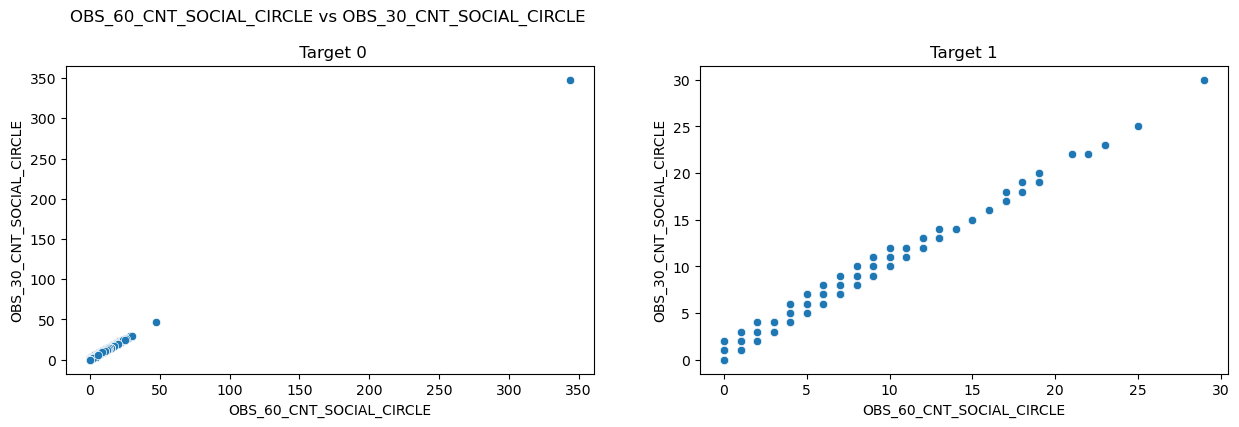

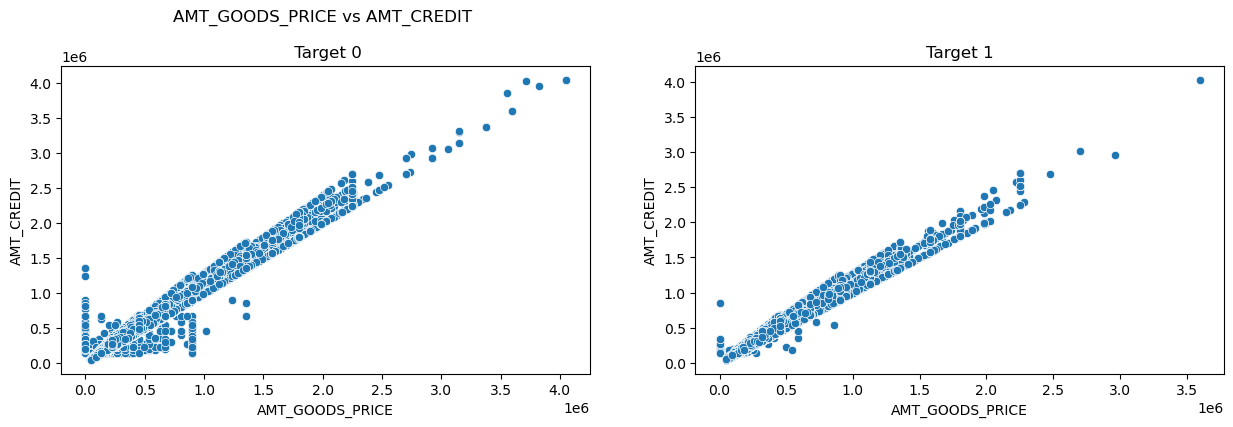

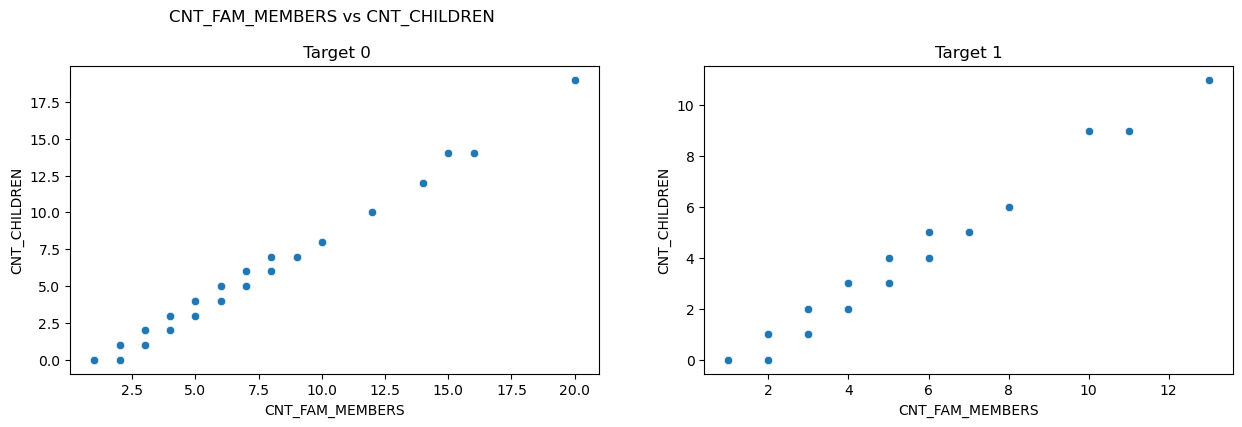

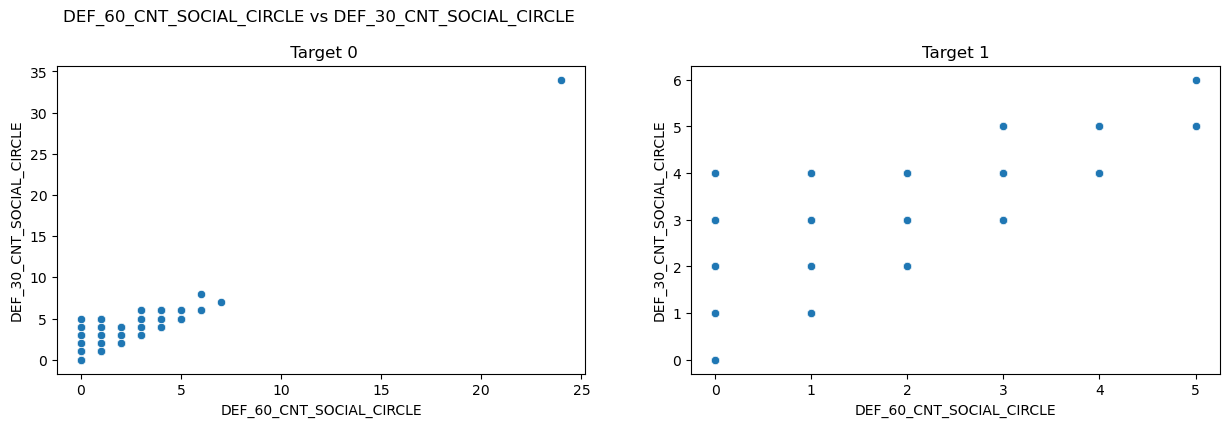

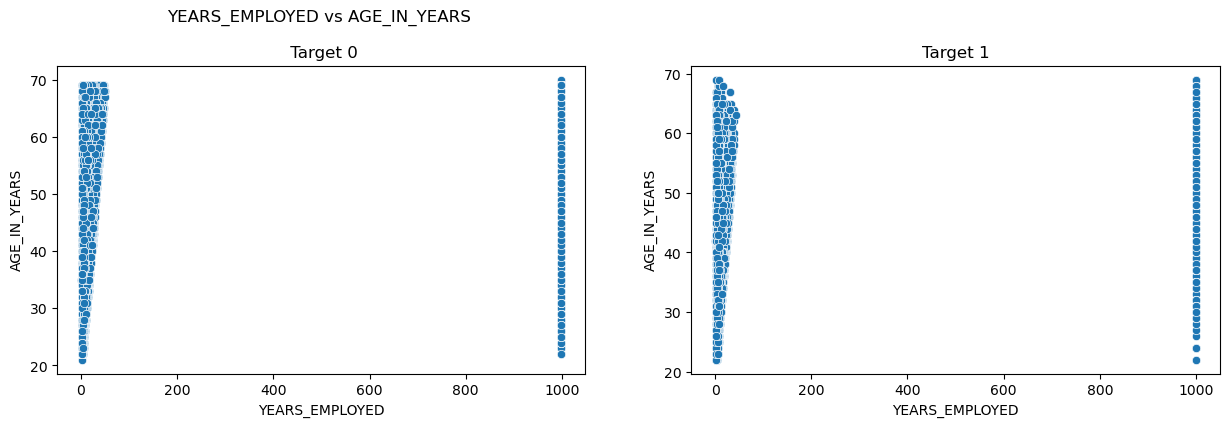

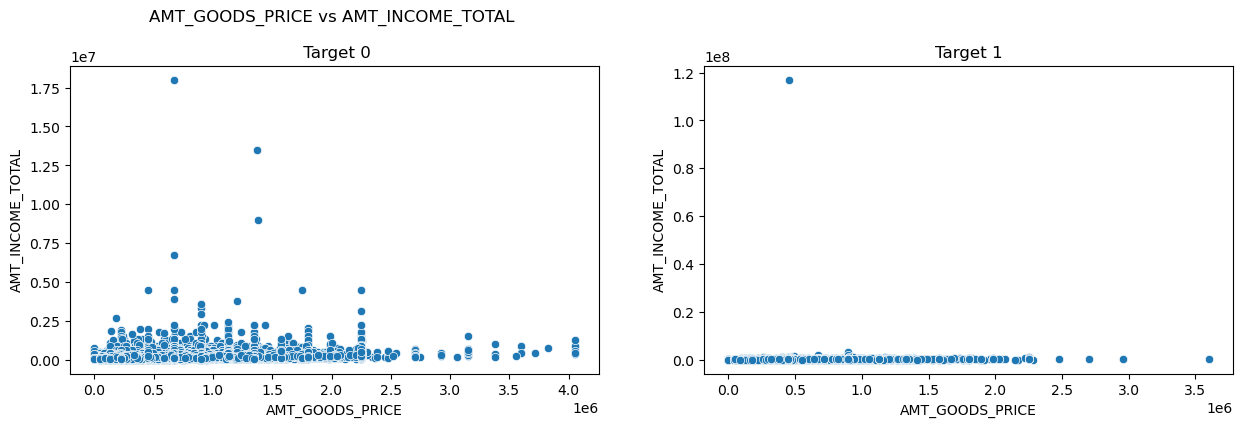

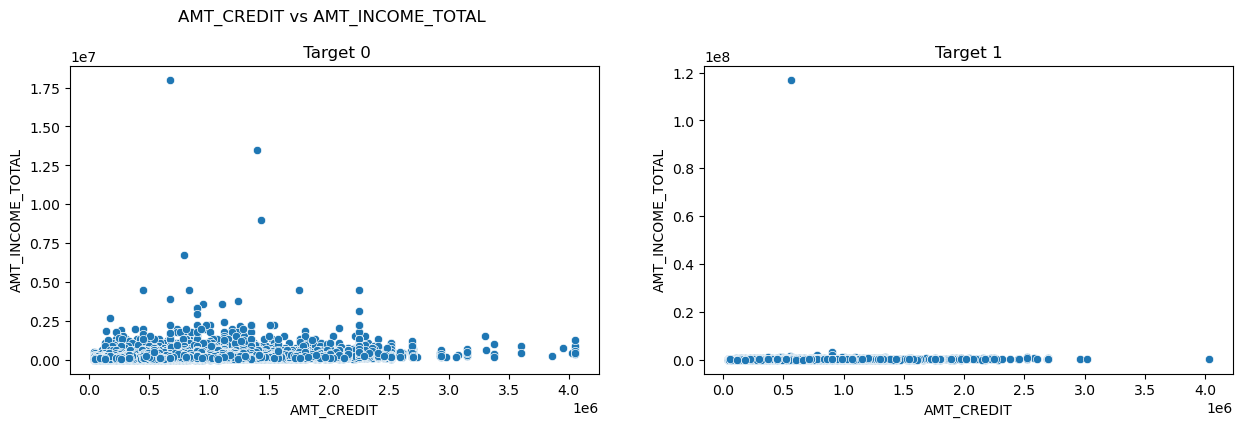

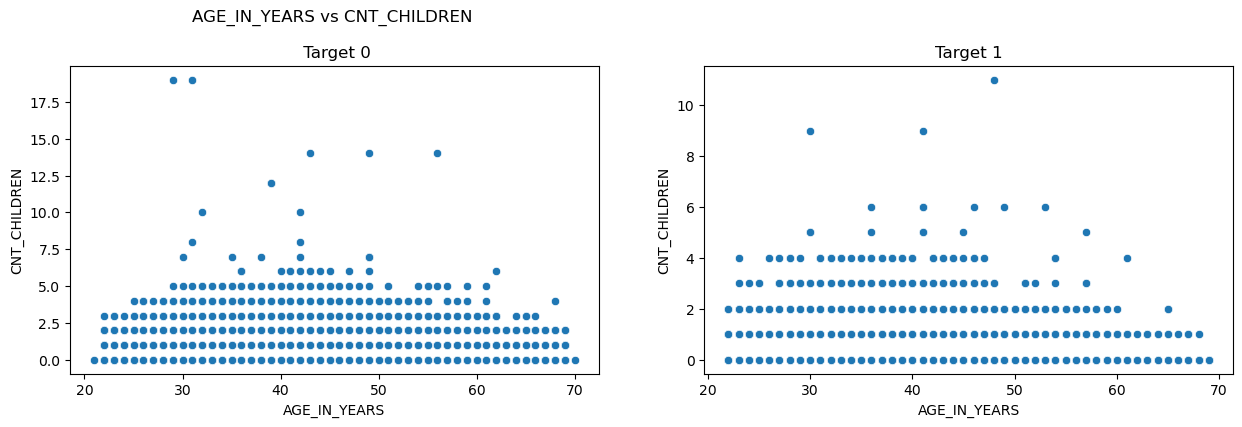

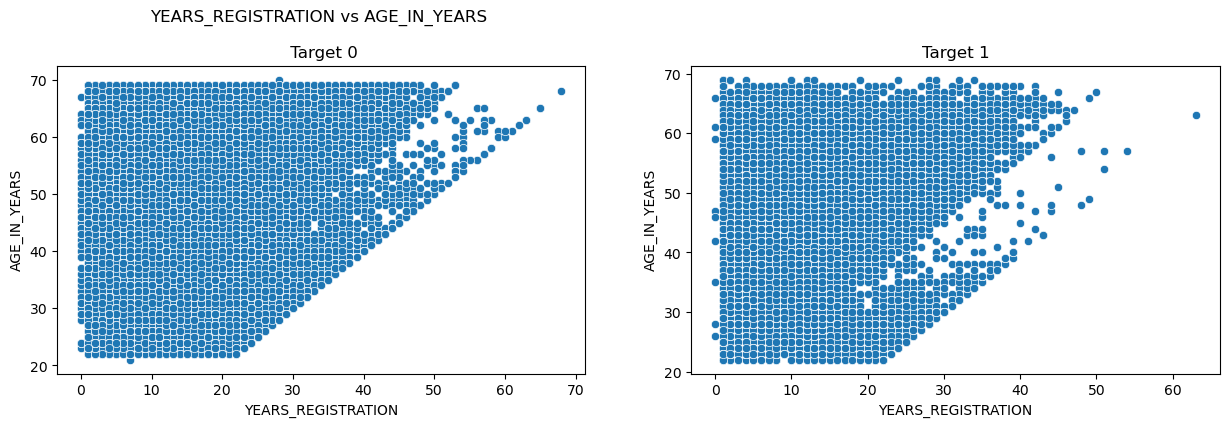

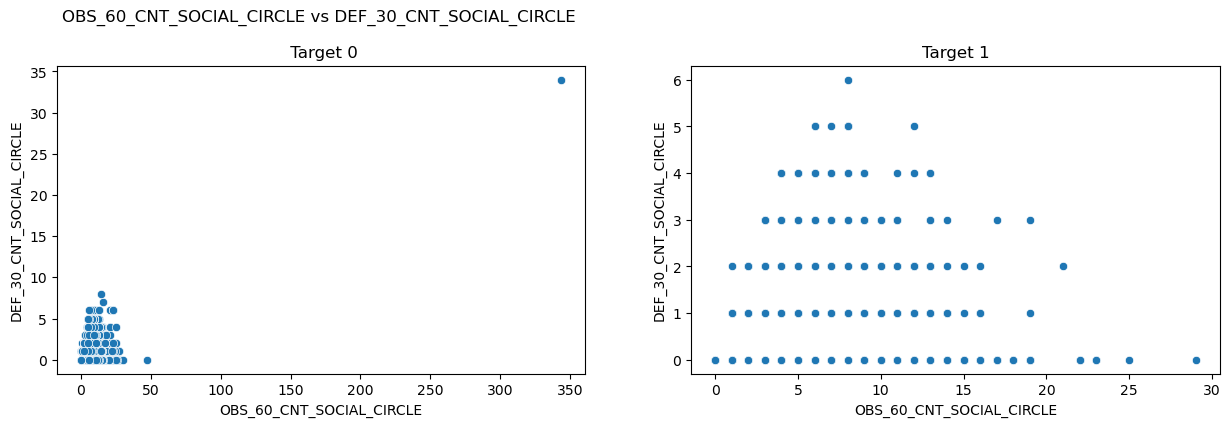

In [92]:
# Plotting scatter plot for the columns
i=0
for i in range(10):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
    sns.scatterplot(x=bivVar1[i], y=bivVar2[i],data=app_target_0,ax=ax1)
    ax1.set_xlabel(bivVar1[i])    
    ax1.set_ylabel(bivVar2[i])
    ax1.set_title(f'{bivVar1[i]} vs {bivVar2[i]} \n\n Target 0',fontsize=12)
    
    sns.scatterplot(x=bivVar1[i], y=bivVar2[i],data=app_target_1,ax=ax2)
    ax2.set_xlabel(bivVar1[i])    
    ax2.set_ylabel(bivVar2[i])
    ax2.set_title(f'Target 1',fontsize=12)
            
    plt.show()    
    i=i+1

##### Key Insights
- Social network metrics are correlated with default risk, especially for target 1.
- Default rates in social circles increase over time, especially for target 1.
- The YEARS_EMPLOYED variable contains an outlier.
- Loan amounts and goods prices don't scale with income for target 1.

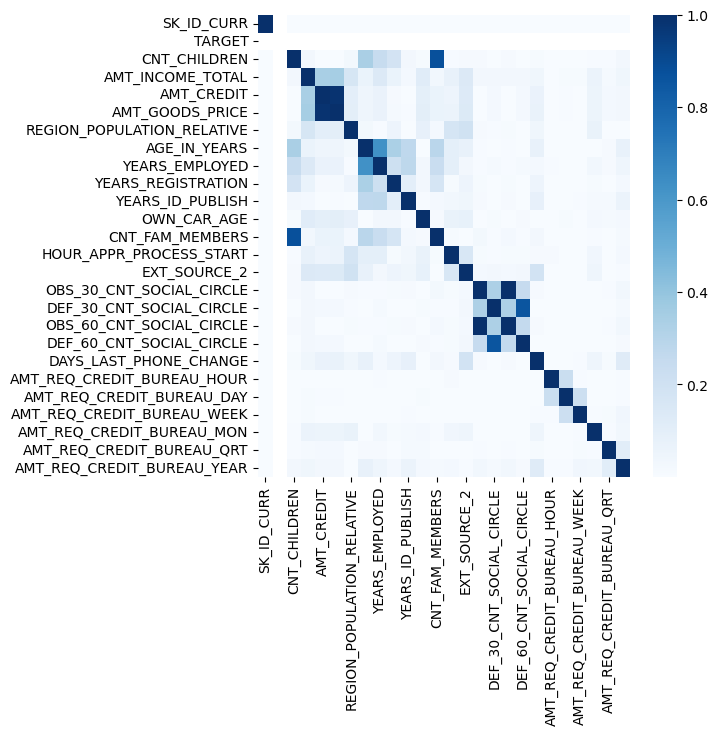

In [93]:
# Checking above analysis using Heatmap

plt.figure(figsize=(6,6))
sns.heatmap(correlation_cat_0, cmap='Blues')
plt.show()

The heatmap visually confirms the correlation matrix.

<Figure size 1000x800 with 0 Axes>

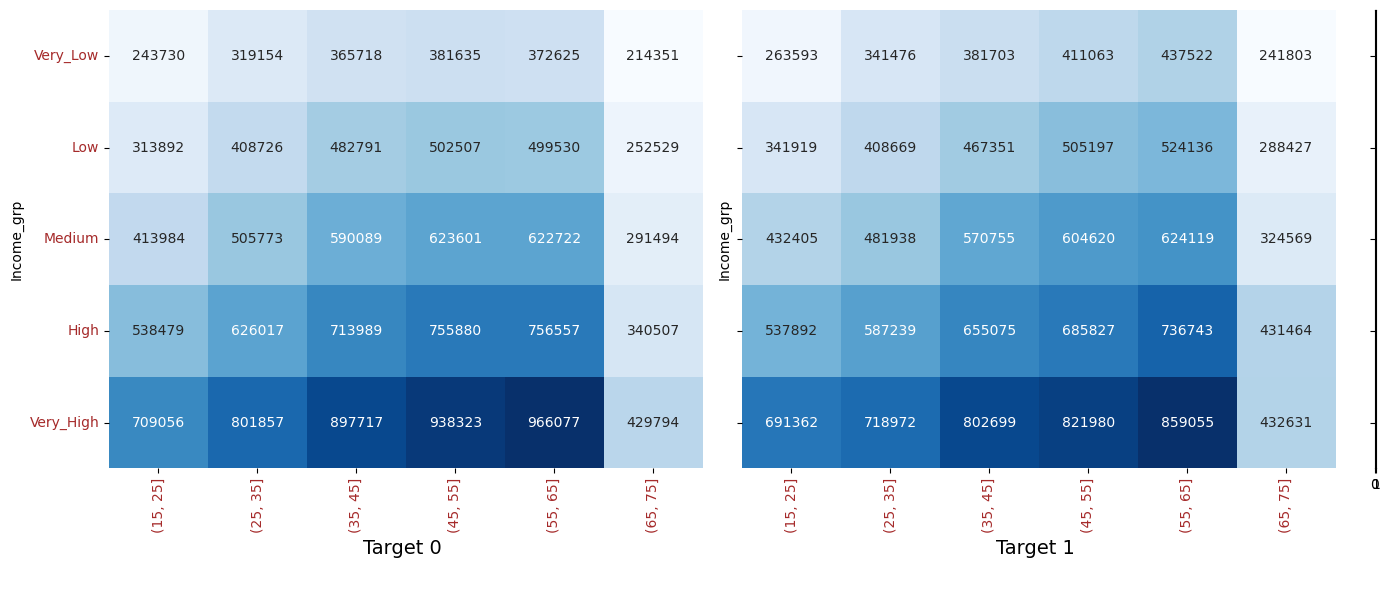

In [94]:
#Analysing relationship of AMT_CREDIT with Age_grp and Income_grp using Heatmap 
plt.figure(figsize=[10,8])
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(14,6))

res=pd.pivot_table(data=app_target_0, index="Income_grp",columns="Age_grp",values='AMT_CREDIT', aggfunc="mean")

c=sns.heatmap(res, annot=True,cmap='Blues', fmt="g", ax=ax1, cbar=False)
c.set_xlabel('Target 0 \n', fontsize=14,fontweight= 7)
c.set_xticklabels(c.get_xticklabels(), rotation = 90, fontsize = 10, color="Brown")

res1=pd.pivot_table(data=app_target_1, index="Income_grp",columns="Age_grp",values='AMT_CREDIT', aggfunc="mean")

c1=sns.heatmap(res1, annot=True,cmap='Blues', fmt="g", ax=ax2, cbar=False)

c1.set_xlabel('Target 1 \n', fontsize=14,fontweight= 7,)
c1.set_xticklabels(c1.get_xticklabels(), rotation = 90, fontsize = 10, color="Brown")

c.set_yticklabels(c.get_yticklabels(), rotation = 0, fontsize = 10, color="Brown")

plt.tight_layout()
plt.show()

Individuals aged 55-65 with very high incomes are obtaining larger loans. While this demographic may have a lower default risk, it's important to consider factors such as retirement plans, future income streams, and potential health issues that could impact their ability to repay the loan.

# Previous Application

### Data loading and Inspection

In [95]:
# Reading the csv file 'previous_application.csv' 
prev_df=pd.read_csv('previous_application.csv')

prev_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [96]:
# Checking number of rows and columns
prev_df.shape

(1670214, 37)

In [97]:
# Checking summary of previous application
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Data Cleaning
- Checking for Missing values
- Handling Missing values

In [98]:
# Checking for the columns with  missing values

prev_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [99]:
# Checking % of missing values

prev_df.isnull().sum()/len(prev_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [100]:
#As the DF is massive, deleting rows withy Null values for AMT_ANNUITY, AMT_GOODS_PRICE. 
prev_df = prev_df.dropna(axis=0, subset=['AMT_ANNUITY'])
prev_df = prev_df.dropna(axis=0, subset=['AMT_GOODS_PRICE'])
prev_df.isnull().sum()/len(prev_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               40.546489
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              40.546489
RATE_INTEREST_PRIMARY          99.522595
RATE_INTEREST_PRIVILEGED       99.522595
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                32.647474
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [101]:
# Checking columns having null values more than 20%

print(prev_df.columns[(prev_df.isnull().sum() * 100 / prev_df.shape[0]) > 20])

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [102]:
#Dropping all >20 null value columns
dropcol=prev_df.columns[(prev_df.isnull().sum() * 100 / prev_df.shape[0]) > 20]
prev_df.drop(axis=1, columns=dropcol, inplace=True)
prev_df.shape

(1246320, 26)

In [103]:
prev_df.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [104]:
# Checking descriptive statistics for previous application dataframe 
prev_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.246320e+06  1.246320e+06  1.246320e+06     1.246320e+06   
mean   1.913834e+06  2.783561e+05  1.605938e+04     2.325942e+05   
std    5.340824e+05  1.027801e+05  1.492967e+04     3.186545e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.446936e+06  1.893740e+05  6.327990e+03     5.220000e+04   
50%    1.910148e+06  2.787420e+05  1.125000e+04     1.125000e+05   
75%    2.377944e+06  3.673812e+05  2.061227e+04     2.475000e+05   
max    2.845379e+06  4.562550e+05  4.180581e+05     5.850000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.246320e+06     1.246320e+06             1.246320e+06   
mean   2.492727e+05     2.326240e+05             1.258250e+01   
std    3.465843e+05     3.186729e+05             3.326113e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    5.157450e+04     5.220000e+04             1.000000e+01   
50%    1.161675e+05     1.125000e+05             1.200000e+01   
75%    2.700000e+05     2.475000e+05             1.500000e+01   
max    4.509688e+06     5.850000e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.246320e+06   1.246320e+06      1.246320e+06  1.246320e+06  
mean             9.978914e-01  -1.021855e+03      4.056201e+02  1.671954e+01  
std              4.587116e-02   7.864511e+02      8.246103e+03  1.448712e+01  
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00  
25%              1.000000e+00  -1.534000e+03     -1.000000e+00  6.000000e+00  
50%              1.000000e+00  -7.660000e+02      2.700000e+01  1.200000e+01  
75%              1.000000e+00  -3.850000e+02      1.460000e+02  2.400000e+01  
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01

In [105]:
# Removing irrelevant numerical columns.

dropcol=['HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']
prev_df.drop(axis=1, columns=dropcol, inplace=True)
prev_df.shape

(1246320, 22)

In [106]:
# Analysing values of object variable
for i in prev_df.columns:
    if prev_df[i].dtypes=="object":
        print(prev_df[i].value_counts(normalize=True, dropna= False))
        print('\n\n')

NAME_CONTRACT_TYPE
Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: proportion, dtype: float64



WEEKDAY_APPR_PROCESS_START
SATURDAY     0.152194
FRIDAY       0.149213
WEDNESDAY    0.148734
TUESDAY      0.148228
MONDAY       0.146892
THURSDAY     0.146119
SUNDAY       0.108620
Name: proportion, dtype: float64



FLAG_LAST_APPL_PER_CONTRACT
Y    0.997222
N    0.002778
Name: proportion, dtype: float64



NAME_CASH_LOAN_PURPOSE
XAP                                 0.629659
XNA                                 0.314679
Repairs                             0.019014
Other                               0.012436
Urgent needs                        0.006744
Buying a used car                   0.002304
Building a house or an annex        0.002161
Everyday expenses                   0.001921
Medicine                            0.001739
Payments on other loans             0.001545
Education                           0.001257
Journey                           

In [107]:
# Deleting unnecessary columns
dropcol=['WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE','CODE_REJECT_REASON']
prev_df.drop(axis=1, columns=dropcol, inplace=True)
prev_df.shape

(1246320, 16)

### Univariate Analysis

Categorical Nominal

NAME_CONTRACT_TYPE
Consumer loans     0.554779
Cash loans         0.370341
Revolving loans    0.074880
Name: proportion, dtype: float64


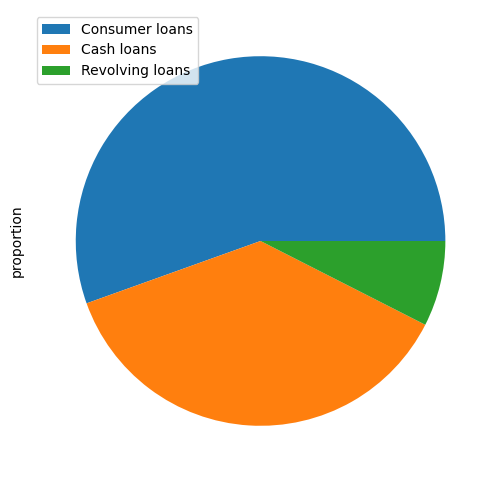



FLAG_LAST_APPL_PER_CONTRACT
Y    0.997222
N    0.002778
Name: proportion, dtype: float64


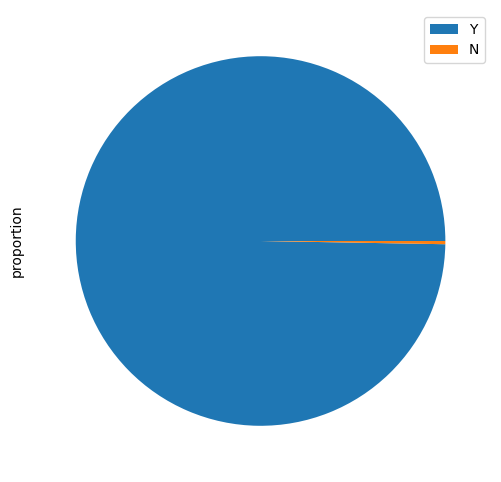



NAME_CONTRACT_STATUS
Approved        0.797498
Refused         0.193344
Canceled        0.008427
Unused offer    0.000730
Name: proportion, dtype: float64


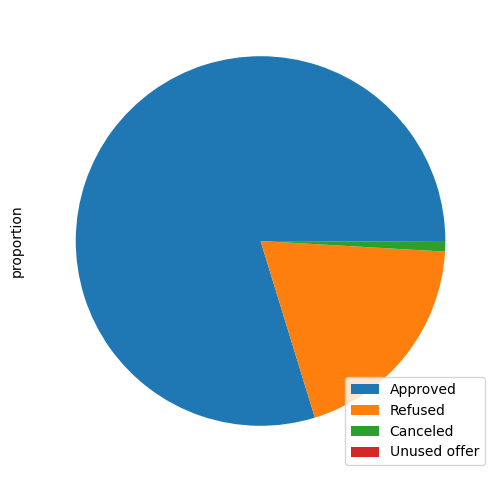



NAME_CLIENT_TYPE
Repeater     0.677066
New          0.236334
Refreshed    0.085877
XNA          0.000723
Name: proportion, dtype: float64


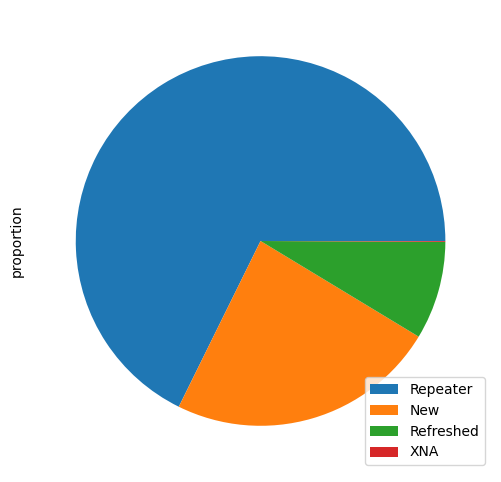



NAME_PORTFOLIO
POS      0.554438
Cash     0.370341
Cards    0.074880
Cars     0.000341
Name: proportion, dtype: float64


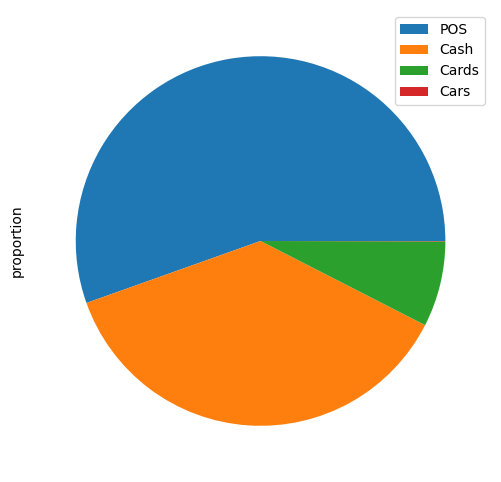



CHANNEL_TYPE
Country-wide                  0.359302
Credit and cash offices       0.317926
Stone                         0.166645
Regional / Local              0.085031
AP+ (Cash loan)               0.038082
Contact center                0.027836
Channel of corporate sales    0.004817
Car dealer                    0.000363
Name: proportion, dtype: float64


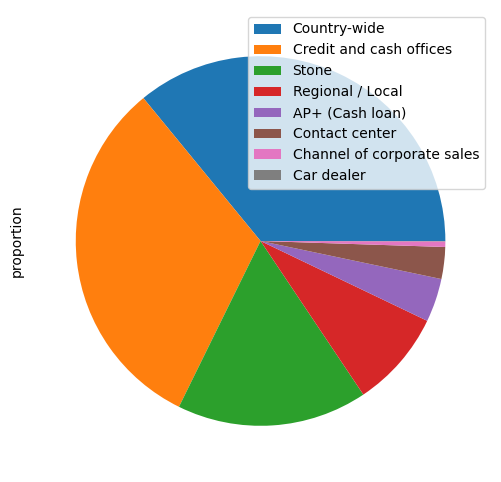



NAME_SELLER_INDUSTRY
XNA                     0.389958
Consumer electronics    0.308245
Connectivity            0.190554
Furniture               0.045780
Construction            0.023736
Clothing                0.019091
Industry                0.015262
Auto technology         0.003989
Jewelry                 0.002173
MLM partners            0.000800
Tourism                 0.000412
Name: proportion, dtype: float64


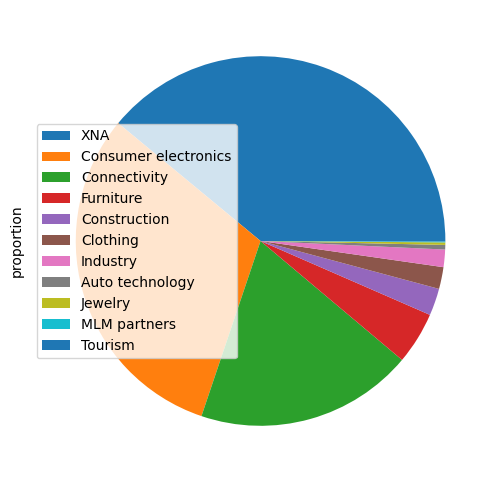



NAME_YIELD_GROUP
middle        0.309335
high          0.283497
low_normal    0.258437
XNA           0.074880
low_action    0.073850
Name: proportion, dtype: float64


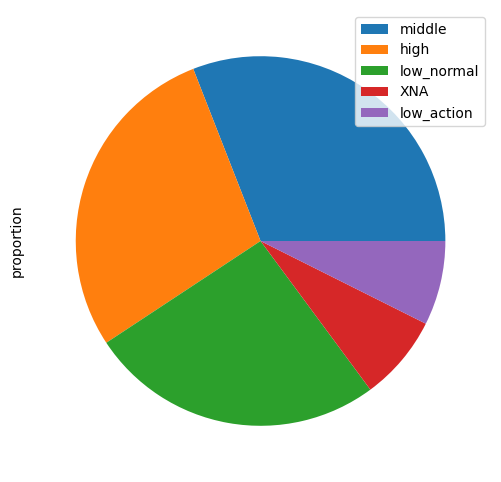



PRODUCT_COMBINATION
POS household with interest       0.206895
POS mobile with interest          0.152865
Cash X-Sell: middle               0.115446
Cash X-Sell: low                  0.104506
POS industry with interest        0.078757
POS household without interest    0.066522
Cash Street: high                 0.047852
Cash X-Sell: high                 0.047581
Card Street                       0.041335
Card X-Sell                       0.033545
Cash Street: middle               0.027808
Cash Street: low                  0.027147
POS mobile without interest       0.019322
POS other with interest           0.018255
POS industry without interest     0.010111
POS others without interest       0.002050
Name: proportion, dtype: float64


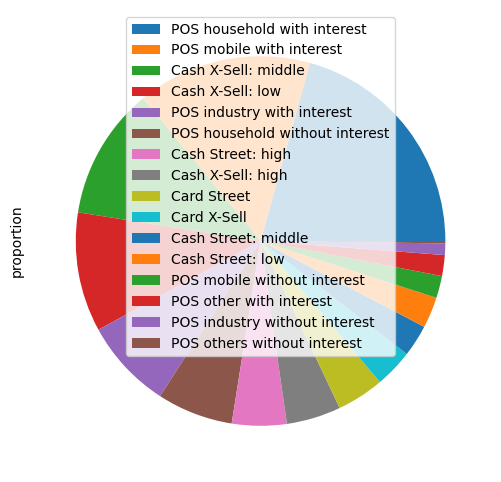

In [108]:
#Checking for all object types Variables and their values
for i in prev_df.columns:
    if prev_df[i].dtypes=="object":
        print(prev_df[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[6,6])
        prev_df[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()
        print("\n")

##### Key Insights
- The dataset includes a new loan type: consumer loans.
- Data imbalance exists between approved and rejected loans.
- 67% of applicants are repeat customers. Some client types are unknown.
- The dataset reveals that 55% of the loans are designated for point-of-sale purchases, suggesting a substantial demand for credit-based consumption.
- Many seller industries are unknown, with consumer electronics being the most common.

##### Numerical Variable


In [109]:
# Checking for descriptive analysis for numerical variable 
prev_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.246320e+06  1.246320e+06  1.246320e+06     1.246320e+06   
mean   1.913834e+06  2.783561e+05  1.605938e+04     2.325942e+05   
std    5.340824e+05  1.027801e+05  1.492967e+04     3.186545e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.446936e+06  1.893740e+05  6.327990e+03     5.220000e+04   
50%    1.910148e+06  2.787420e+05  1.125000e+04     1.125000e+05   
75%    2.377944e+06  3.673812e+05  2.061227e+04     2.475000e+05   
max    2.845379e+06  4.562550e+05  4.180581e+05     5.850000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE   CNT_PAYMENT  
count  1.246320e+06     1.246320e+06  1.246320e+06  
mean   2.492727e+05     2.326240e+05  1.671954e+01  
std    3.465843e+05     3.186729e+05  1.448712e+01  
min    0.000000e+00     0.000000e+00  0.000000e+00  
25%    5.157450e+04     5.220000e+04  6.000000e+00  
50%    1.161675e+05     1.125000e+05  1.200000e+01  
75%    2.700000e+05     2.475000e+05  2.400000e+01  
max    4.509688e+06     5.850000e+06  8.400000e+01

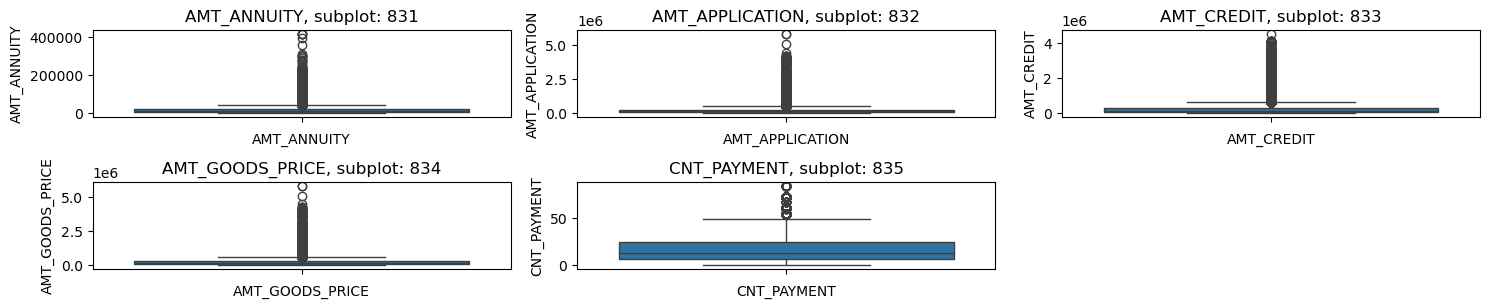

In [110]:
#  Plotting boxplot for Float Data type

# number of rows
a = 8  
# number of columns
b = 3
# initiate plot number
c = 1  

fig = plt.figure(figsize=(15,12))

for i in prev_df.columns:
    if prev_df[i].dtypes=="float64" or prev_df[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(prev_df[i])
        c = c + 1

fig.tight_layout()
plt.show()

The continuous variables within the dataset display a considerable number of outliers. A detailed examination of the distribution of these variables is necessary to assess the extent of their influence on the overall analysis.

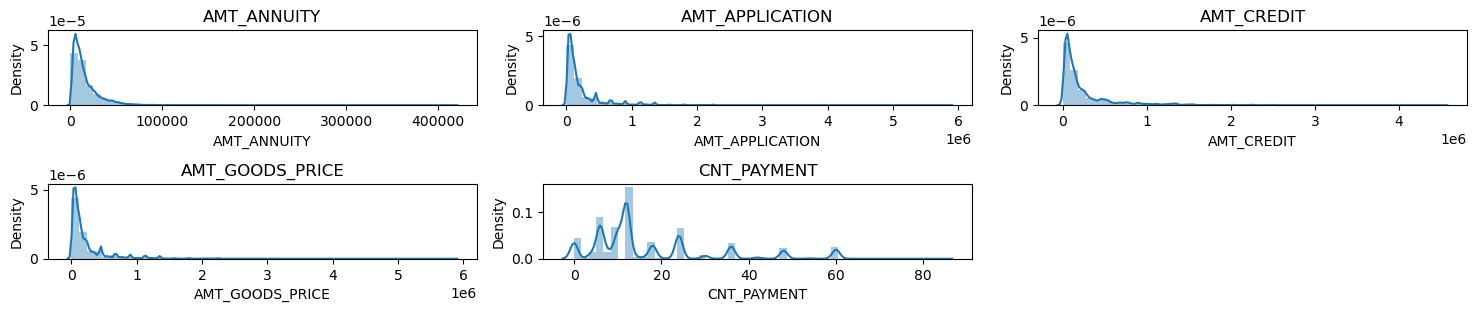

In [111]:
#  Checking distribution of float data type by plotting distplot

# number of rows
a = 8 
# number of columns
b = 3  
# initialize plot counter
c = 1  
fig = plt.figure(figsize=(15,12))

for i in prev_df.columns:
    if prev_df[i].dtypes=="float64" or prev_df[i].dtypes=="float32" :
        plt.subplot(a, b, c)
        plt.title(i)
        plt.xlabel(i)
        sns.distplot(a=prev_df[i])
        c = c + 1

fig.tight_layout()
plt.show()

Both box plots and distribution plots indicate the presence of outliers in the continuous variables. These outliers can significantly impact statistical measures and distort the overall distribution of the data

In [112]:
# Deleting rows having outliers
outlier_threshold = 5  # Percentage

# Identify columns with high outlier percentages
outlier_cols = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']

# Filter out rows with outliers in these columns
for col in outlier_cols:
    q1 = prev_df[col].quantile(0.25)
    q3 = prev_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    prev_df = prev_df[(prev_df[col] >= lower_bound) & (prev_df[col] <= upper_bound)]


### Bivariate Analysis

Categorical and Categorical variable

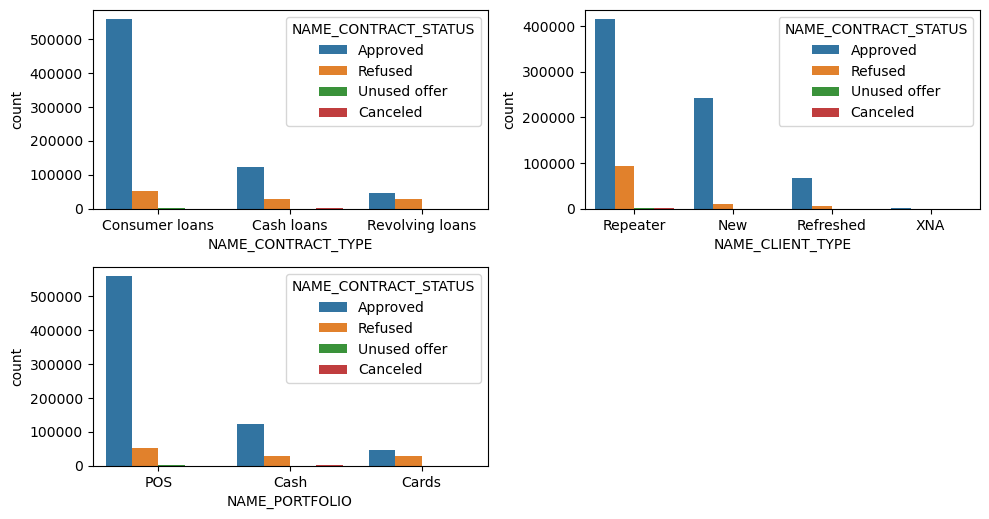

In [113]:
# Plotting countplot for the following columns

cols=['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']

# number of rows
a = 4  
# number of columns
b = 2  
# initialize plot number
c = 1  

fig = plt.figure(figsize=(10,10))

for i in cols:

    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.countplot(x=i, data=prev_df, hue='NAME_CONTRACT_STATUS')
    c = c + 1

fig.tight_layout()
plt.show()

##### Key Insights
- Among approved loan applications, consumer loans constitute the largest category, indicating a significant demand for this type of credit.
- The data indicates a higher rejection rate for cash loan applications relative to consumer loan applications.
- POS loans have a similar rejection rate to cash loans.
- Cash loans have fewer cancellations than consumer loans.
- Repeat customers are more prevalent across all loan categories.

### Top Correlations

In [114]:
def calculate_correlation_matrix(prev_df):
    """Calculates the correlation matrix for a DataFrame, handling potential errors.

    Args:
        df: The DataFrame to analyze.

    Returns:
        The correlation matrix.
    """

    # Select only numerical columns
    numerical_cols = app_df.select_dtypes(include=np.number).columns

    # Create a new DataFrame with only numerical columns
    numerical_df = app_df[numerical_cols]

    # Calculate the correlation matrix
    correlation_matrix = numerical_df.corr().abs()

    return correlation_matrix


df_corr_prev=prev_df.drop(axis=1,columns=['SK_ID_CURR','SK_ID_PREV'] )

correlation=calculate_correlation_matrix(df_corr_prev)



In [115]:
corr_prev = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(bool)).unstack().reset_index()
corr_prev.columns=['Column1','Column2','Correlation']
corr_prev.dropna(subset=['Correlation'],inplace=True)
corr_prev = corr_prev.sort_values(by=['Correlation'], ascending=False)

corr_prev.head(10)

Column1                     Column2  Correlation
986      OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998490
226               AMT_GOODS_PRICE                  AMT_CREDIT     0.986687
569   REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.950842
483               CNT_FAM_MEMBERS                CNT_CHILDREN     0.879161
721   LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860627
1024     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.860517
835       LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.825575
341                YEARS_EMPLOYED                AGE_IN_YEARS     0.623903
525          REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE     0.532877
562   REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.531535

<Figure size 1000x800 with 0 Axes>

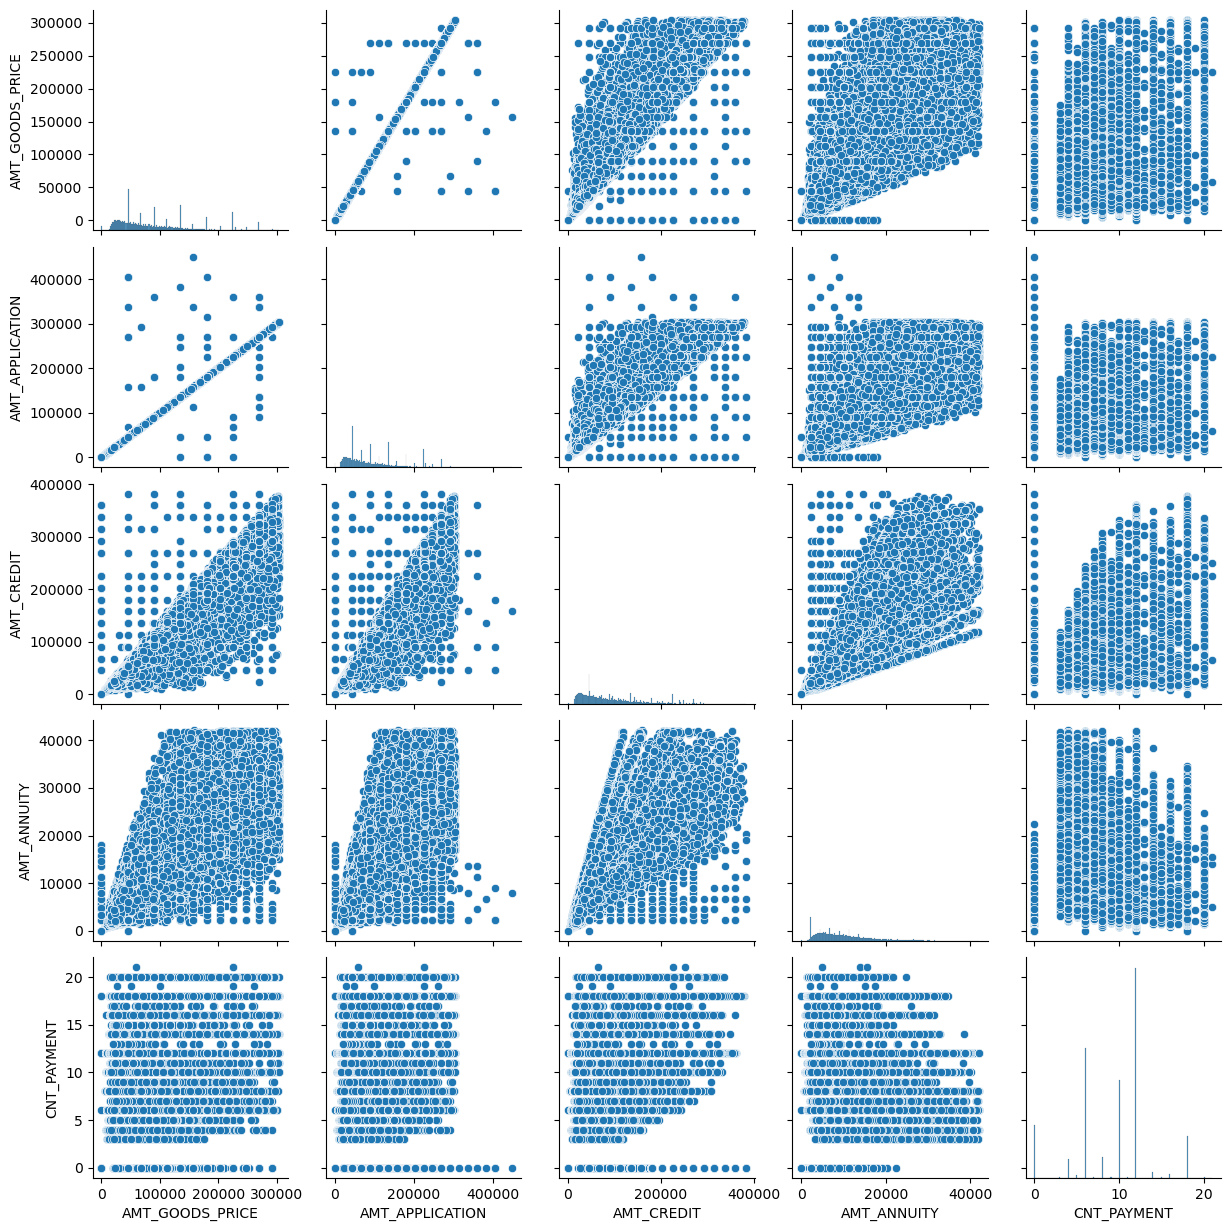

In [116]:
# Plotting pair plots for the following columns
plt.figure(figsize=[10,8])
sns.pairplot(prev_df[['AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']])
plt.show() 

##### Key Insights
- Loan amount, annuity, and goods price are highly correlated.
- A significant positive correlation exists between AMT_CREDIT and AMT_GOODS_PRICE, suggesting that larger loan amounts are generally granted for higher-priced goods.
- No strong correlation between loan amount and payment term.

### Multivariate Analysis

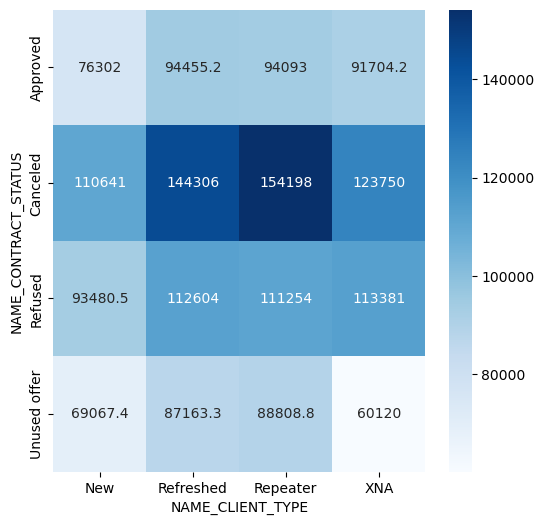

In [117]:
# Checking NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE aggregating over AMT_APPLICATION by using Heatmap

res=pd.pivot_table(data=prev_df, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(6,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

##### Key Insights
- The loan amounts associated with unused offers are relatively low, indicating that smaller loan applications are more likely to be declined or withdrawn.
- Cancelled applications have higher loan amounts.
- Repeat customers apply for larger loans.

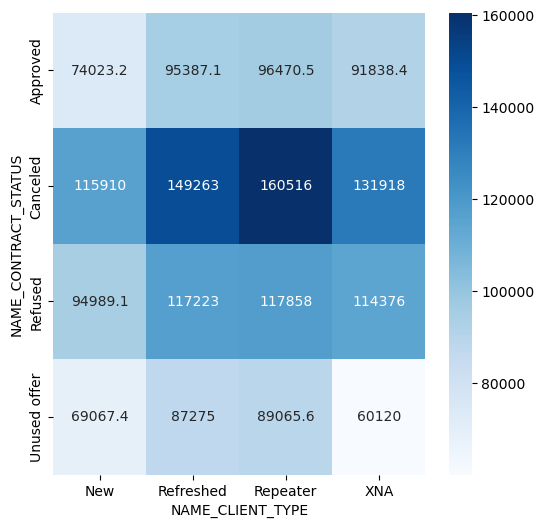

In [118]:
# Checking NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE type aggregating over AMT CREDIT

res=pd.pivot_table(data=prev_df, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_CREDIT')
plt.figure(figsize=(6,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

##### Key Insights
- The analysis reveals that unused offers are characterized by lower credit amounts. This suggests that the perceived value of these smaller loan offers may not align with the financial requirements of potential borrowers, resulting in their rejection.

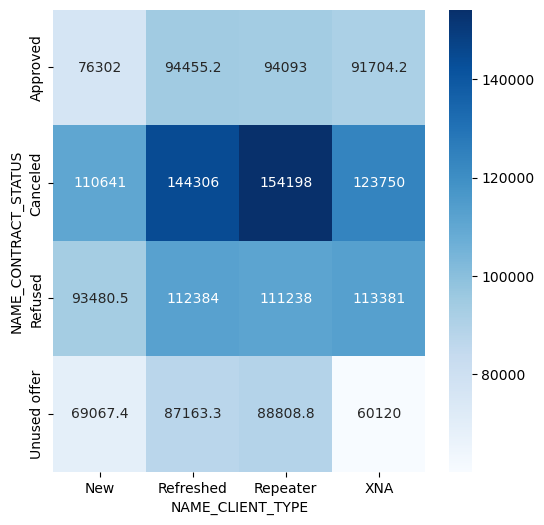

In [119]:
# Checking NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE aggregating over AMOUNT GOOD PRICE

res=pd.pivot_table(data=prev_df, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(6,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

##### Key Insights
- The analysis indicates that cancelled and refused loan applications tend to involve larger loan amounts. This may be attributed to a stricter underwriting process for higher-value loans, leading to increased rejection rates.

# Merging two dataframes

In [120]:
# Merging both the dataframes : app_df and prev_df
df=pd.merge( app_df,prev_df, how='left', on="SK_ID_CURR")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  \
0      100002       1           Cash loans           M             0   
1      100003       0           Cash loans           F             0   
2      100004       0      Revolving loans           M             0   
3      100006       0           Cash loans           F             0   
4      100006       0           Cash loans           F             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
0          202500.0      406597.5       0.045254           351000.0   
1          270000.0     1293502.5       0.045254          1129500.0   
2           67500.0      135000.0       0.045254           135000.0   
3          135000.0      312682.5       0.045254           297000.0   
4          135000.0      312682.5       0.045254           297000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4        Civil marriage  House / apartment                    0.008019   

   AGE_IN_YEARS  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0          26.0             2.0                10.0               6.0   
1          46.0             4.0                 4.0               1.0   
2          53.0             1.0                12.0               7.0   
3          53.0             9.0                27.0               7.0   
4          53.0             9.0                27.0               7.0   

   OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0          NaN        Laborers              1.0                     2   
1          NaN      Core staff              2.0                     1   
2         26.0        Laborers              1.0                     2   
3          NaN        Laborers              2.0                     2   
4          NaN        Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       17                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3   

In [121]:
#checking if any duplicate values in SK_ID_PREV
duplicate = prev_df[prev_df.duplicated(subset='SK_ID_CURR')]
duplicate.shape

(526606, 16)

SK_ID_CURR has duplicates in prev_df. Indicating that app_df and prev_df will have a one to many relationship.

In [122]:
# Checking shape after merging both the dataframes
df.shape

(755947, 64)

### Analysis

In [123]:
# Plotting NAME_CONTRACT_STATUS to check % of default, ie Target 0 and 1

contract=df['NAME_CONTRACT_STATUS'].unique()
contract

array([nan, 'Approved', 'Refused', 'Unused offer', 'Canceled'],
      dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Target 0 and 1 for :  nan
Series([], Name: proportion, dtype: float64)


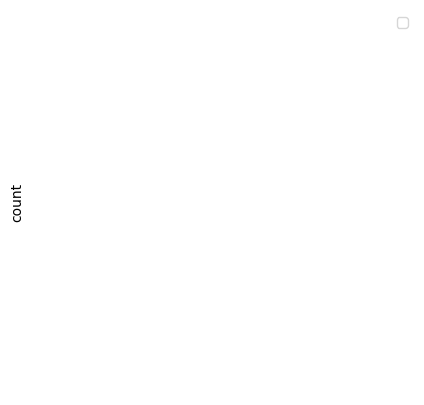

Target 0 and 1 for :  Approved
TARGET
0    0.925206
1    0.074794
Name: proportion, dtype: float64


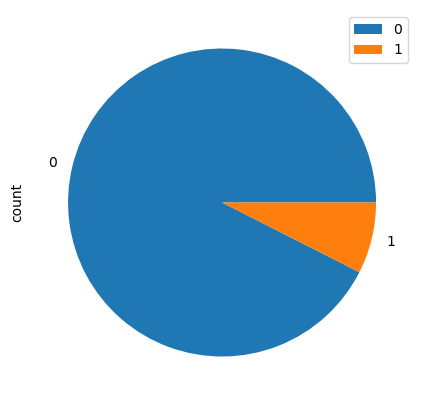

Target 0 and 1 for :  Refused
TARGET
0    0.889593
1    0.110407
Name: proportion, dtype: float64


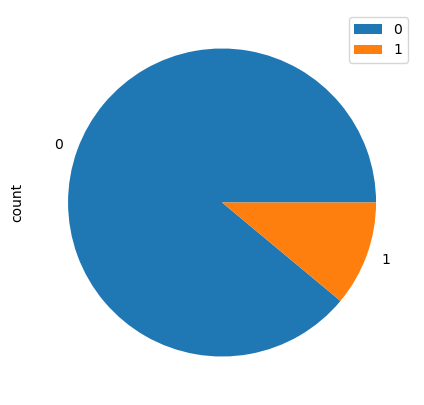

Target 0 and 1 for :  Unused offer
TARGET
0    0.894602
1    0.105398
Name: proportion, dtype: float64


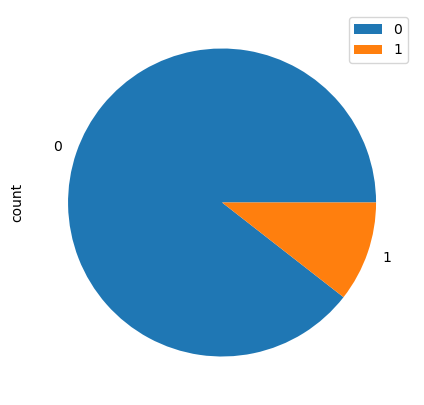

Target 0 and 1 for :  Canceled
TARGET
0    0.903251
1    0.096749
Name: proportion, dtype: float64


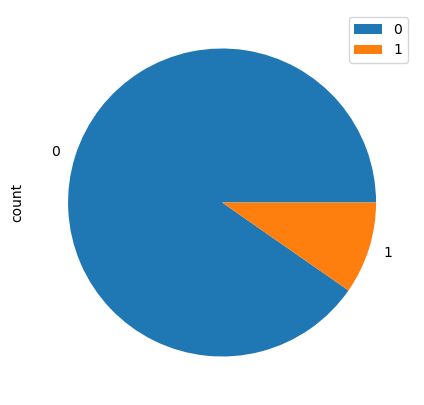

In [130]:
# Plotting pie chart
for i in contract:
    print("Target 0 and 1 for : ",i)
    plt.figure(figsize=[5,5])
    print(df[(df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts(normalize=True))
    df[(df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts().plot.pie(normalize=True)
    plt.legend()
    plt.show()

##### Key Insights
- Approximately 7.5% of all approved loans result in default, indicating a certain level of credit risk
- Previous loan rejections are associated with higher default risk.

In [125]:
# Checking number of Defaults in approved cases
approvedDefault=df[(df['NAME_CONTRACT_STATUS']=="Approved") & (df['TARGET']==1)]
approvedDefault.shape

(46517, 64)

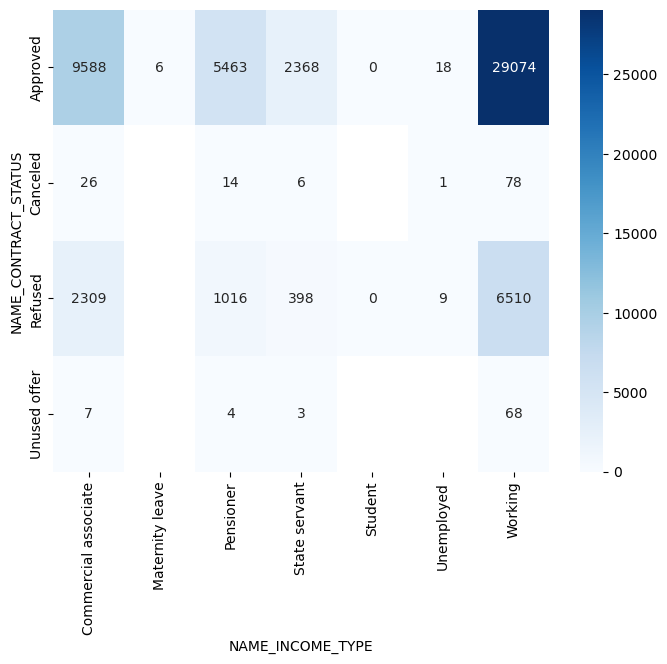

In [126]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on Target using Heatmap

res=pd.pivot_table(data=df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(8,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

##### Key Insights
- Higher values in the matrix indicate a higher risk of default
- Employed applicants have the highest default rate.
- The analysis reveals a correlation between previous loan rejections and subsequent defaults. This indicates that a thorough assessment of an applicant's credit history, including past loan applications and outcomes, is crucial for accurate risk assessment.
- A significant number of working-class individuals who had previously been denied loans have subsequently defaulted on their current loans. This suggests that the bank may need to re-evaluate its credit assessment criteria for this demographic.

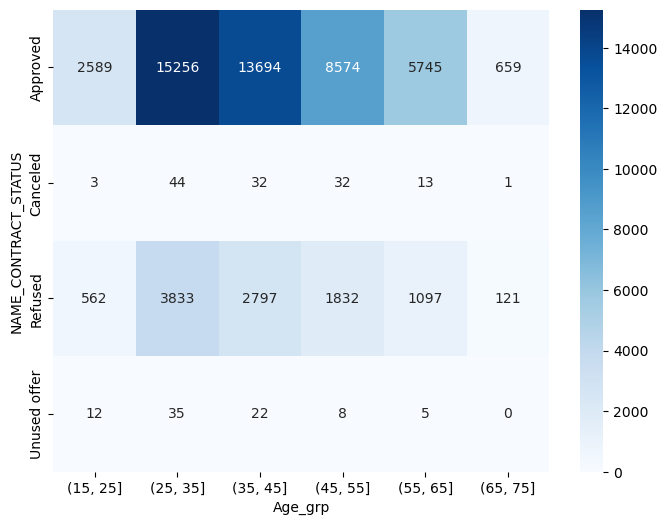

In [127]:
#Checking "NAME_CONTRACT_STATUS", "Age_grp",aggregating on Target using Heatmap

res=pd.pivot_table(data=df,index="NAME_CONTRACT_STATUS",columns="Age_grp",values='TARGET', aggfunc="sum")
plt.figure(figsize=(8,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

##### Key Insights
- Higher values in the matrix indicate a higher risk of default.
- Individuals aged 25-45, particularly those in the 35-45 age group, exhibit higher default rates among approved loans. This suggests that factors such as career instability, family commitments, or lifestyle choices may contribute to increased financial strain and a higher likelihood of default in this demographic.
- Individuals with a history of rejected or cancelled loan applications are more likely to default on subsequent loans. This suggests that past credit behavior is a strong indicator of future risk.

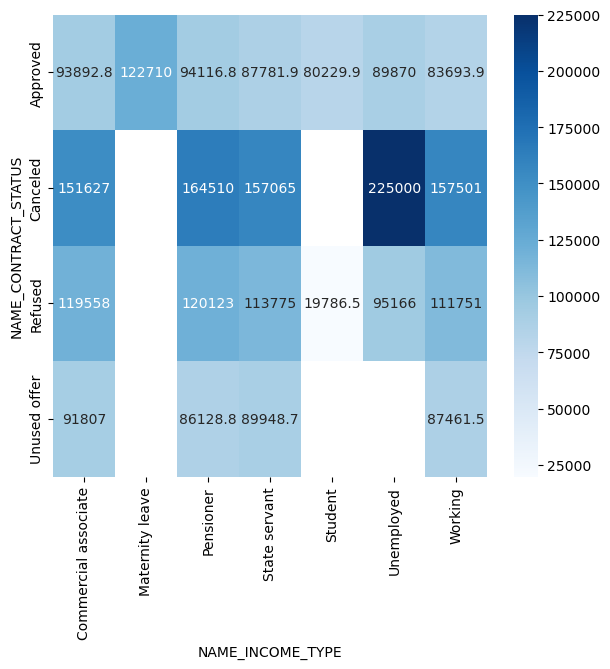

In [134]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_TYPE",aggregating on AMT_CREDIT using Heatmap

res=pd.pivot_table(data=df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='AMT_CREDIT_y')
plt.figure(figsize=(7,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

##### Key Insights
- The analysis reveals that unused offers are characterized by lower credit amounts. This suggests that the perceived value of these smaller loan offers may not align with the financial requirements of potential borrowers, resulting in their rejection.

In [129]:
cols=['Income_grp','Age_grp','CODE_GENDER','NAME_INCOME_TYPE','OCCUPATION_TYPE',"ORGANIZATION_TYPE",'OWN_CAR_flag','OWN_REALTY_flag' ]

for i in cols:
    print(approvedDefault[i].value_counts(normalize=True))
    print('\n')

Income_grp
Medium       0.300320
High         0.250984
Low          0.223381
Very_High    0.122643
Very_Low     0.102672
Name: proportion, dtype: float64


Age_grp
(25, 35]    0.327966
(35, 45]    0.294387
(45, 55]    0.184320
(55, 65]    0.123503
(15, 25]    0.055657
(65, 75]    0.014167
Name: proportion, dtype: float64


CODE_GENDER
F    0.572952
M    0.427048
Name: proportion, dtype: float64


NAME_INCOME_TYPE
Working                 0.625019
Commercial associate    0.206118
Pensioner               0.117441
State servant           0.050906
Unemployed              0.000387
Maternity leave         0.000129
Name: proportion, dtype: float64


OCCUPATION_TYPE
Laborers                 0.322960
Sales staff              0.168622
Drivers                  0.114097
Core staff               0.089976
Managers                 0.065166
Security staff           0.037975
High skill tech staff    0.037201
Cooking staff            0.035480
Medicine staff           0.030862
Accountants              0.0

The variables identified in the analysis of the application data frame, which were associated with higher default rates, have been confirmed to be significant predictors of default in the approved loan dataset.

INCOME_GROUP' - Medium income

'AGE_GROUP - 25-35, followed by 35-45

'NAME_INCOME_TYPE' -  Working

'OCCUPATION_TYPE' -   Laborers 31%

'ORGANIZATION_TYPE' - Business type 3

'OWN_CAR_flag' - approx 31% dont have car

'OWN_REALTY_flag' - approx70% dont have own home

# Case Study Summary
**Defaulters' demography** : All the below variables were established in analysis of Application dataframe as leading to default. 
- Checked these against the Approved loans which have defaults, and it proves to be correct
     - Medium income
     - 25-35 years olds , followed by 35-45 years age group
     - Male
     - Unemployed
     - Labourers, Salesman, Drivers
     - Business type 3
     - Own House - No
- Other IMPORTANT Factors to be considered
     - Days last phone number changed - Lower figure points at concern
     - No of Bureau Hits in last week. Month etc – zero hits is good
     - Amount income not correspondingly equivalent to Good Bought – Income low and good value high is a concern
     - Previous applications with Refused, Cancelled, Unused loans also have default which is a matter of concern.   This indicates that the financial company had Refused/Cancelled previous application but has approved the current and is  facing default on these. 
    

**Credible Applications refused**
- Unused applications have lower loan amount. Is this the reason for no usage?
- Female applicants should be given extra weightage as defaults are lesser.
- 60% of defaulters are Working applicants. This does not mean working applicants must be refused. Proper scrutiny of other parameters needed
- Previous applications with Refused, Cancelled,Unused loans also have cases where payments are coming on time in current application. This indicates that possibly wrong decisions were done in those cases.
 